# DATA-DRIVEN DEPARTMENT OPTIMIZATION

## Table of Contents

- Human Resources Department: Employee Turnover Prediction
    - Business Problem Overview
    - Data Loading and Preprocessing
    - Dataset Exploration and Visualization
    - Splitting and Cleaning the Data
    - Logistic Regression: Model Training and Evaluation
    - Random Forest: Model Training and Evaluation
    - Deep Learning: Model Training and Evaluation
- Marketing Department: Customer Segmentation for Targeted Campaigns
    - Business Problem Overview
    - Data Loading and Preprocessing
    - Dataset Exploration and Visualization
    - Determining Optimal Clusters with K-Means
    - Principal Component Analysis (PCA)
    - Dimensionality Reduction with Autoencoders
- Sales Department: Daily Sales Forecasting
    - Business Problem Overview
    - Data Loading and Preprocessing
    - Dataset Exploration and Visualization
    - Time Series Forecasting: Model Training with Facebook Prophet
- Operations Department: Chest Disease Detection and Classification
    - Business Problem Overview
    - Data Loading and Preprocessing
    - Dataset Exploration and Visualization
    - Deep Learning: Model Training and Evaluation
- Public Relations Department: Customer Satisfaction Prediction
    - Business Problem Overview
    - Data Loading and Preprocessing
    - Dataset Exploration and Visualization
    - Data Cleaning
    - Naive Bayes: Model Training and Evaluation
    - Logistic Regression: Model Training and Evaluation

In [1]:
# Standard Libraries
import datetime
import math
import os
import re
import shutil
import string
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

# Data Manipulation and Analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

# Image Processing
import cv2

# Machine Learning Libraries
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

# Time Series Analysis
from prophet import Prophet

# Natural Language Processing
import nltk
from nltk.corpus import stopwords

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import (EarlyStopping, LearningRateScheduler, ModelCheckpoint,
                                        ReduceLROnPlateau)
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.layers import (Add, Activation, AveragePooling2D, BatchNormalization, Conv2D,
                                     Dense, Dropout, Flatten, Input, MaxPooling2D, ZeroPadding2D)
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-12-17 22:17:38.153526: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-17 22:17:38.157397: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-17 22:17:38.168804: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-17 22:17:38.187565: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-17 22:17:38.193083: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-17 22:17:38.207249: I tensorflow/core/platform/cpu_feature_gu

# Human Resources Department: Employee Turnover Prediction

## Business Problem Overview

The HR team has collected employee data and aims to use predictive modelling to predict which employees are at risk of leaving.

## Data Loading and Preprocessing

In [2]:
employee_df = pd.read_csv('../data/raw/human-resources-department.csv')
employee_df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [3]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
employee_df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

## Dataset Exploration and Visualization

In [5]:
# Since 'Attrition,' 'OverTime,' and 'Over18' are binary columns,
# let's convert them into integers before conducting any visualizations.

employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda x: 1 if x == 'Yes' else 0)

employee_df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

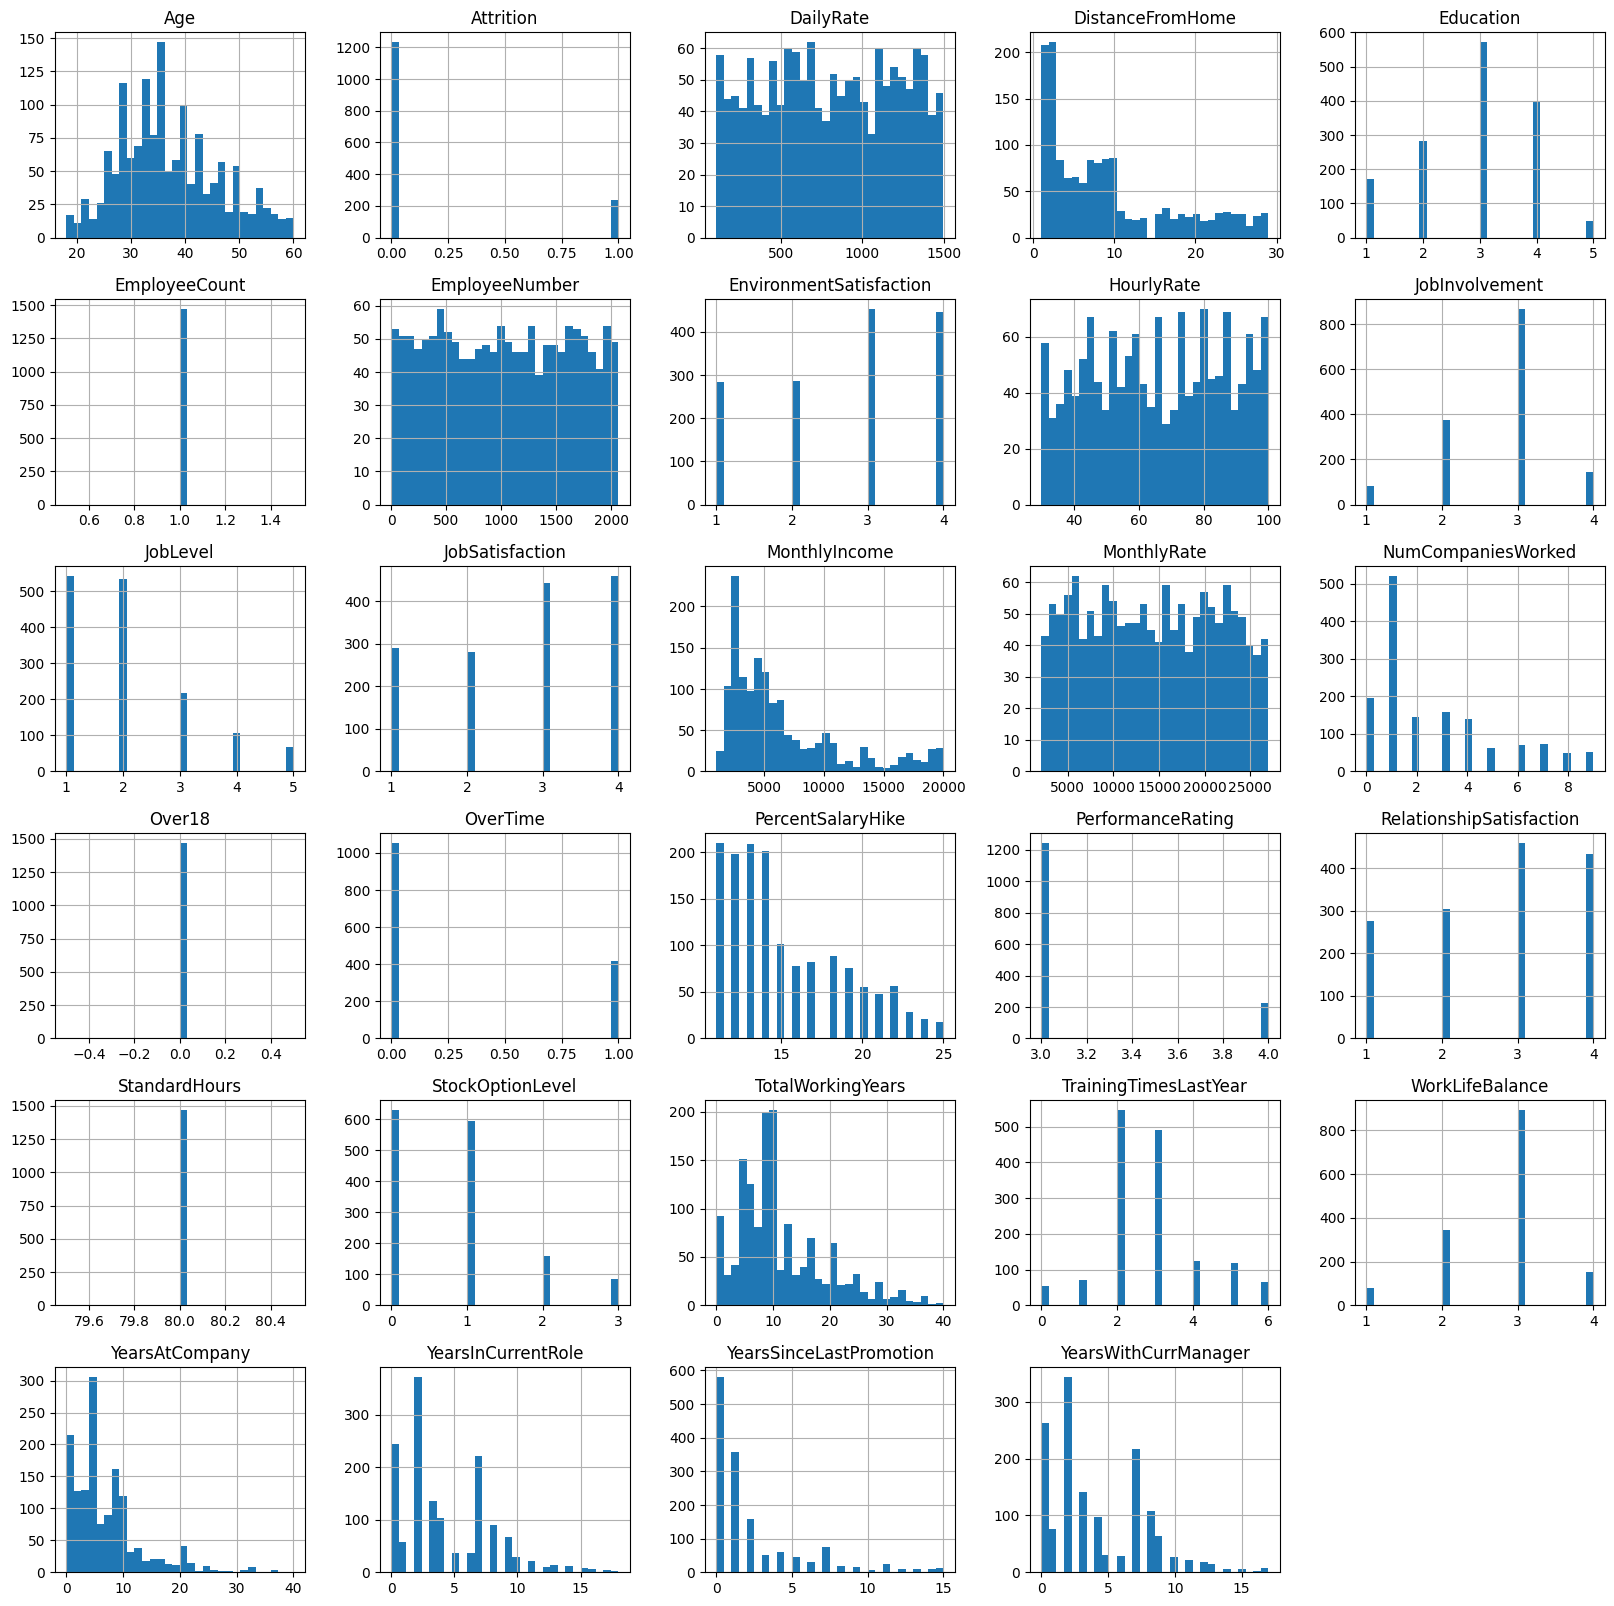

In [6]:
employee_df.hist(bins=30, figsize=(20,20));

# Some features like 'MonthlyIncome' and 'TotalWorkingYears' have a tail-heavy distribution.

In [7]:
employee_df['EmployeeNumber'].duplicated().sum()

# There are no duplicated values in the 'EmployeeNumber' column.

0

In [8]:
# Let's remove 'EmployeeCount,' 'StandardHours,' and 'Over18' since they do not vary among employees.
# Additionally, we should drop 'EmployeeNumber' because it doesn't offer meaningful information or patterns
# to predict a target variable. Including such identifiers in a model can cause overfitting,
# where the model memorizes specific employees rather than learning generalizable patterns.

employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'],
                 axis=1, inplace=True)
employee_df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

In [9]:
# How many employees have left the company?

employees_left = employee_df[employee_df['Attrition'] == 1]
employees_stayed = employee_df[employee_df['Attrition'] == 0]

total_employees = len(employee_df)
print(f'Total number of employees: {total_employees}')

num_employees_left = len(employees_left)
pct_employees_left = num_employees_left / total_employees * 100
print(f'Number of employees who left the company: {num_employees_left} ({pct_employees_left:.2f}%)')

num_employees_stayed = len(employees_stayed)
pct_employees_stayed = num_employees_stayed / total_employees * 100
print(f'Number of employees who stayed with the company: {num_employees_stayed} ({pct_employees_stayed:.2f}%)')

# The dataset is imbalanced.

Total number of employees: 1470
Number of employees who left the company: 237 (16.12%)
Number of employees who stayed with the company: 1233 (83.88%)


In [10]:
employees_left.describe()

Age  Attrition    DailyRate  DistanceFromHome   Education  \
count  237.000000      237.0   237.000000        237.000000  237.000000   
mean    33.607595        1.0   750.362869         10.632911    2.839662   
std      9.689350        0.0   401.899519          8.452525    1.008244   
min     18.000000        1.0   103.000000          1.000000    1.000000   
25%     28.000000        1.0   408.000000          3.000000    2.000000   
50%     32.000000        1.0   699.000000          9.000000    3.000000   
75%     39.000000        1.0  1092.000000         17.000000    4.000000   
max     58.000000        1.0  1496.000000         29.000000    5.000000   

       EnvironmentSatisfaction  HourlyRate  JobInvolvement    JobLevel  \
count               237.000000  237.000000      237.000000  237.000000   
mean                  2.464135   65.573840        2.518987    1.637131   
std                   1.169791   20.099958        0.773405    0.940594   
min                   1.000000   31.000000        1.000000    1.000000   
25%                   1.000000   50.000000        2.000000    1.000000   
50%                   3.000000   66.000000        3.000000    1.000000   
75%                   4.000000   84.000000        3.000000    2.000000   
max                   4.000000  100.000000        4.000000    5.000000   

       JobSatisfaction  ...  PerformanceRating  RelationshipSatisfaction  \
count       237.000000  ...         237.000000                237.000000   
mean          2.468354  ...           3.156118                  2.599156   
std           1.118058  ...           0.363735                  1.125437   
min           1.000000  ...           3.000000                  1.000000   
25%           1.000000  ...           3.000000                  2.000000   
50%           3.000000  ...           3.000000                  3.000000   
75%           3.000000  ...           3.000000                  4.000000   
max           4.000000  ...           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count        237.000000         237.000000             237.000000   
mean           0.527426           8.244726               2.624473   
std            0.856361           7.169204               1.254784   
min            0.000000           0.000000               0.000000   
25%            0.000000           3.000000               2.000000   
50%            0.000000           7.000000               2.000000   
75%            1.000000          10.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count       237.000000      237.000000          237.000000   
mean          2.658228        5.130802            2.902954   
std           0.816453        5.949984            3.174827   
min           1.000000        0.000000            0.000000   
25%           2.000000        1.000000            0.000000   
50%           3.000000        3.000000            2.000000   
75%           3.000000        7.000000            4.000000   
max           4.000000       40.000000           15.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count               237.000000            237.000000  
mean                  1.945148              2.852321  
std                   3.153077              3.143349  
min                   0.000000              0.000000  
25%                   0.000000              0.000000  
50%                   1.000000              2.000000  
75%                   2.000000              5.000000  
max                  15.000000             14.000000  

[8 rows x 25 columns]

In [11]:
employees_stayed.describe()

# Let's compare the average and standard deviation of the employees who stayed
# and those who left:
# 'Age': The average age of the employees who stayed is higher than that of those who left.
# 'DailyRate': The daily rate of the employees who stayed is higher.
# 'DistanceFromHome': Employees who stayed live closer to work.
# 'EnvironmentSatisfaction' and 'JobSatisfaction': Employees who stayed generally
# have higher environment and job satisfaction.
# 'StockOptionLevel': Employees who stayed tend to have a higher stock option level.

Age  Attrition    DailyRate  DistanceFromHome    Education  \
count  1233.000000     1233.0  1233.000000       1233.000000  1233.000000   
mean     37.561233        0.0   812.504461          8.915653     2.927007   
std       8.888360        0.0   403.208379          8.012633     1.027002   
min      18.000000        0.0   102.000000          1.000000     1.000000   
25%      31.000000        0.0   477.000000          2.000000     2.000000   
50%      36.000000        0.0   817.000000          7.000000     3.000000   
75%      43.000000        0.0  1176.000000         13.000000     4.000000   
max      60.000000        0.0  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1233.000000  1233.000000     1233.000000  1233.000000   
mean                  2.771290    65.952149        2.770479     2.145985   
std                   1.071132    20.380754        0.692050     1.117933   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.000000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  ...  PerformanceRating  RelationshipSatisfaction  \
count      1233.000000  ...        1233.000000               1233.000000   
mean          2.778589  ...           3.153285                  2.733982   
std           1.093277  ...           0.360408                  1.071603   
min           1.000000  ...           3.000000                  1.000000   
25%           2.000000  ...           3.000000                  2.000000   
50%           3.000000  ...           3.000000                  3.000000   
75%           4.000000  ...           3.000000                  4.000000   
max           4.000000  ...           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1233.000000        1233.000000            1233.000000   
mean           0.845093          11.862936               2.832928   
std            0.841985           7.760719               1.293585   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          16.000000               3.000000   
max            3.000000          38.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1233.000000     1233.000000         1233.000000   
mean          2.781022        7.369019            4.484185   
std           0.681907        6.096298            3.649402   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        6.000000            3.000000   
75%           3.000000       10.000000            7.000000   
max           4.000000       37.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1233.000000           1233.000000  
mean                  2.234388              4.367397  
std                   3.234762              3.594116  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 25 columns]

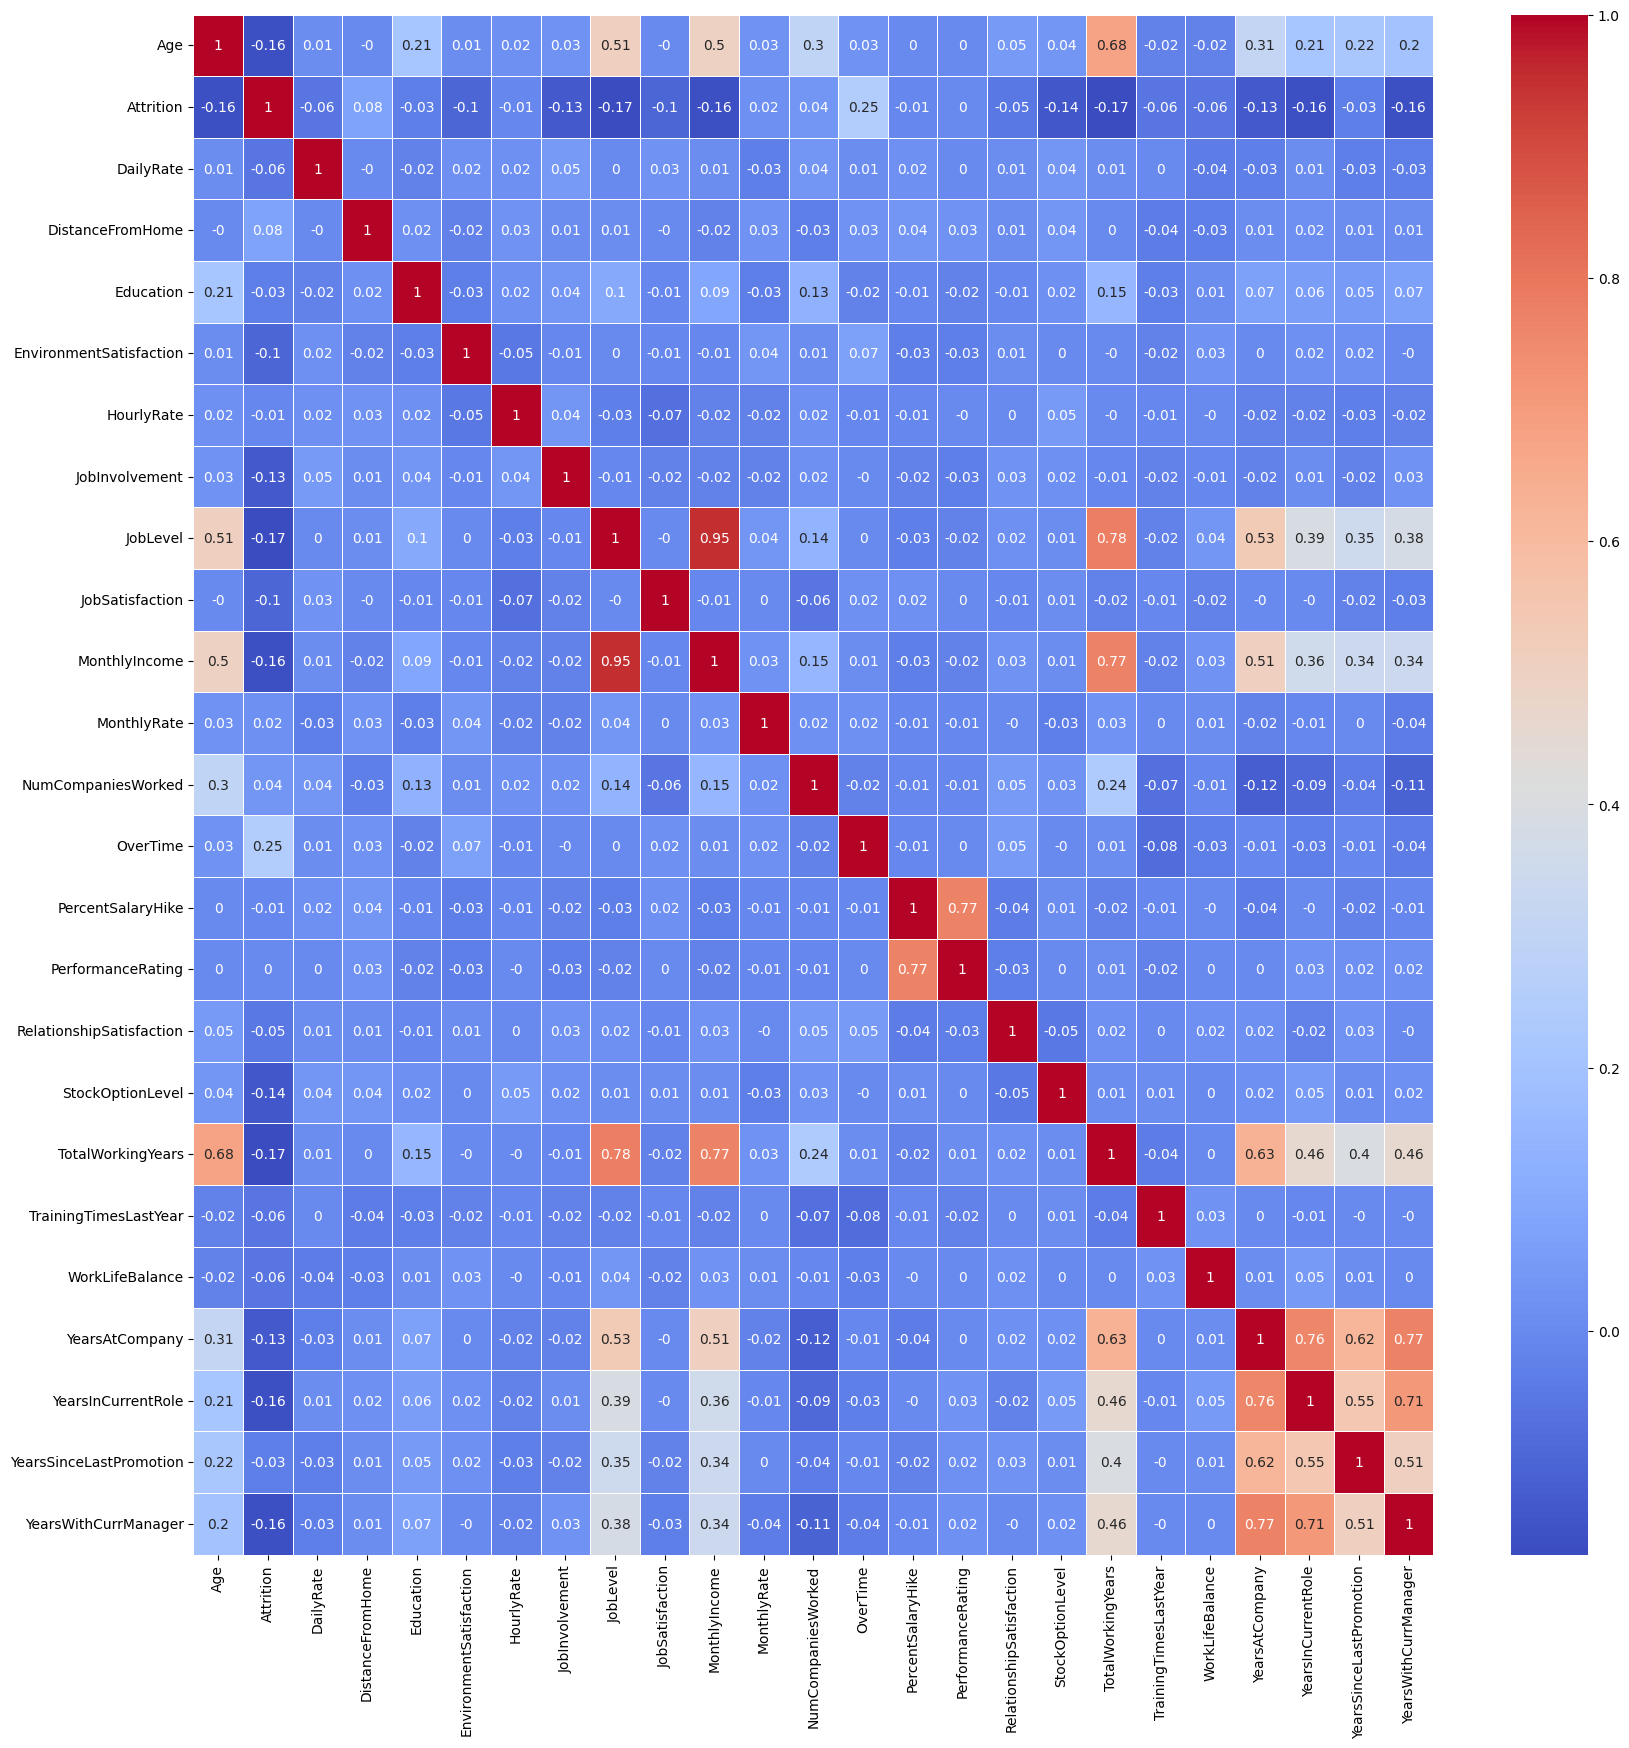

In [12]:
numeric_employee_df = employee_df.select_dtypes(include=['number'])
correlations = numeric_employee_df.corr()
correlations_rounded = correlations.round(2)
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations_rounded, annot=True, cmap='coolwarm', linewidths=0.5);

# 'Age' is strongly correlated with 'TotalWorkingYears' (0.68), 'JobLevel' (0.51),
# and 'MonthlyIncome' (0.50).
# 'Attrition' is negatively correlated with 'JobLevel' (-0.17), 'YearsAtCompany' (-0.13),
# and 'JobSatisfaction' (-0.10).
# 'JobSatisfaction' and 'EnvironmentSatisfaction' correlate negatively with
# 'Attrition' (-0.10).
# 'YearsAtCompany' has strong positive correlations with 'YearsInCurrentRole' (0.76)
# and 'YearsWithCurrManager' (0.77).
# 'DistanceFromHome' has a slight positive correlation with 'Attrition' (0.08).
# 'OverTime' is positively correlated with 'Attrition' (0.25).

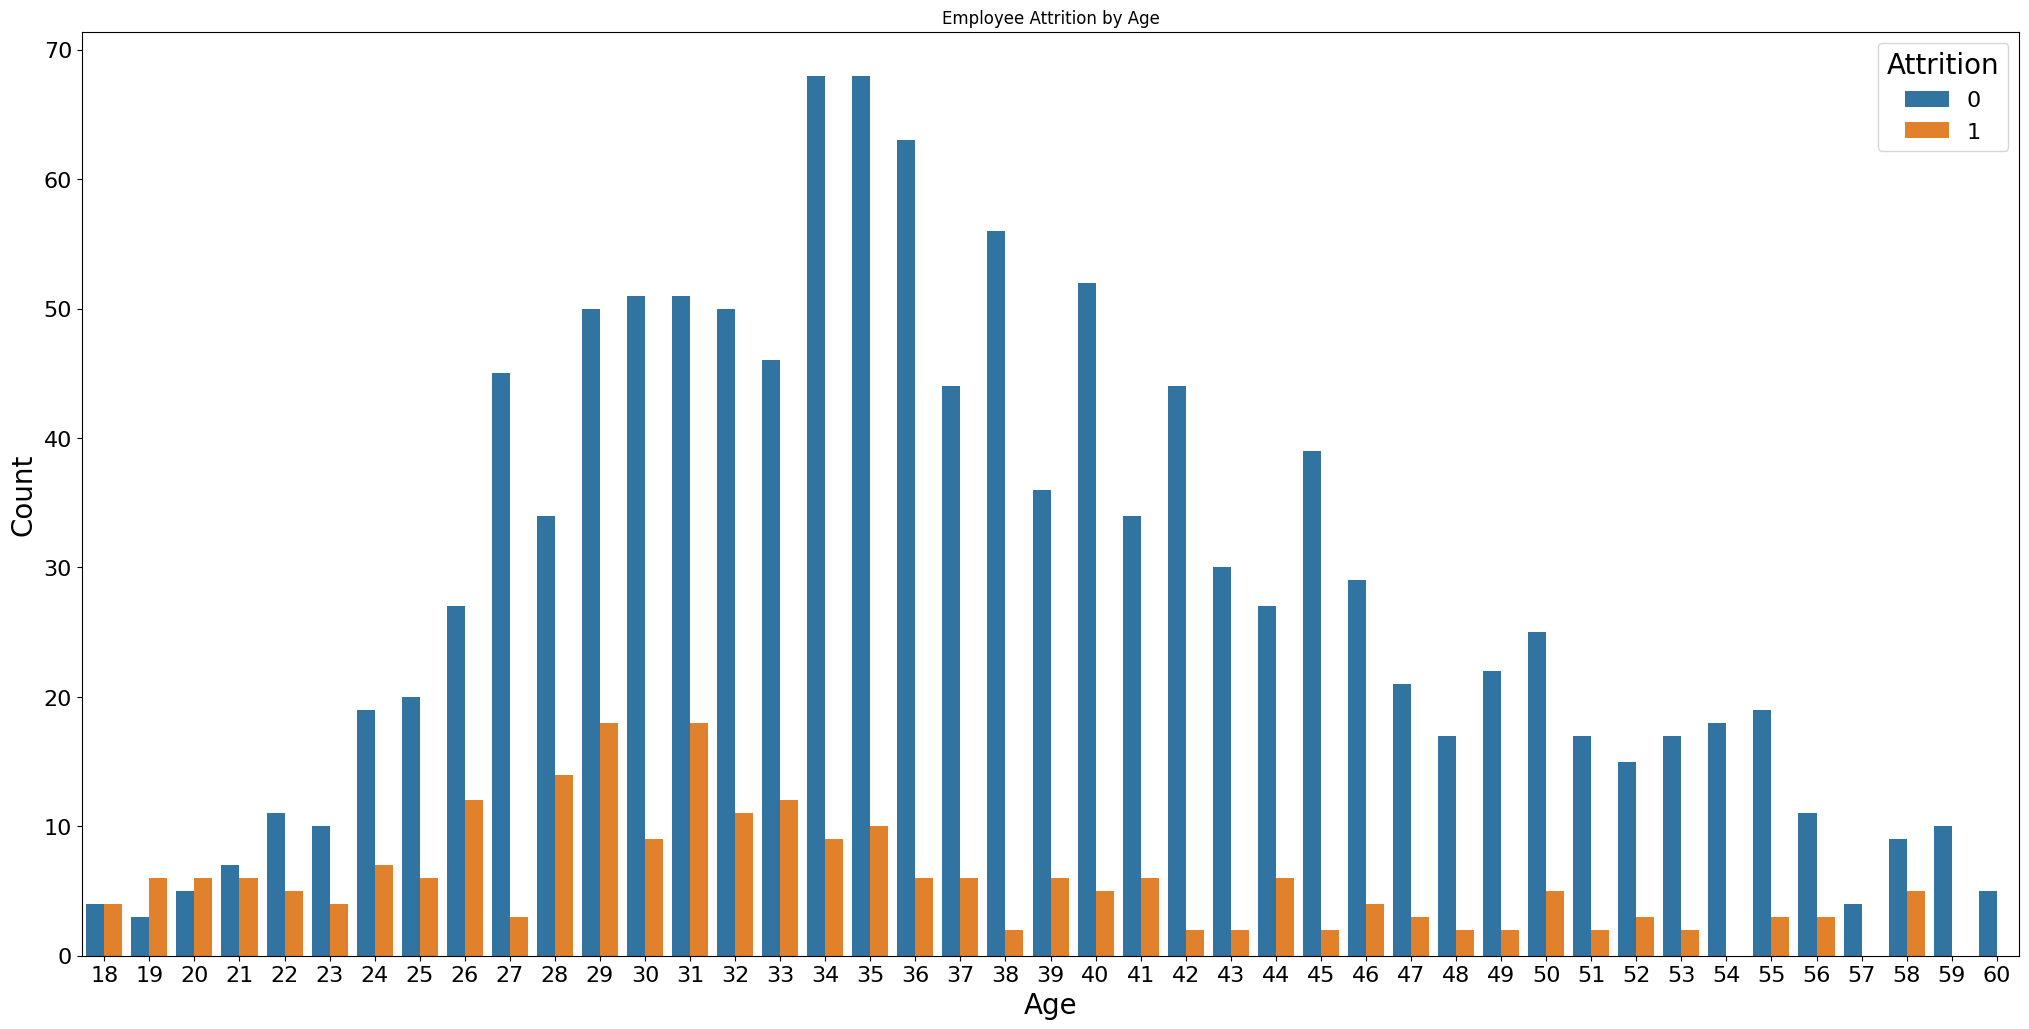

In [13]:
plt.figure(figsize=(25,12))
sns.countplot(x='Age', hue='Attrition', data=employee_df)
plt.title('Employee Attrition by Age')
plt.xlabel('Age', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Attrition', fontsize=16, title_fontsize=20);

# The orange bars (representing attrition) are generally smaller across all age groups compared to the blue bars
# (representing no attrition). This suggests that most employees stayed with the company across most age ranges.
# Attrition appears higher between the ages of 28 and 35, with ages 29 and 31 showing relatively more noticeable
# attrition compared to others.
# The peak age of employees in the company is between 28 and 36, as this range has the tallest blue bars
# (indicating the highest number of employees in these age groups). After age 40, the number of employees decreases gradually.
# Although there is some attrition across various ages, the highest numbers seem to be concentrated in the late 20s
# and early 30s. Employees younger than 25 and older than 45 experience less attrition compared to the middle-aged group
# (around 28 to 35).

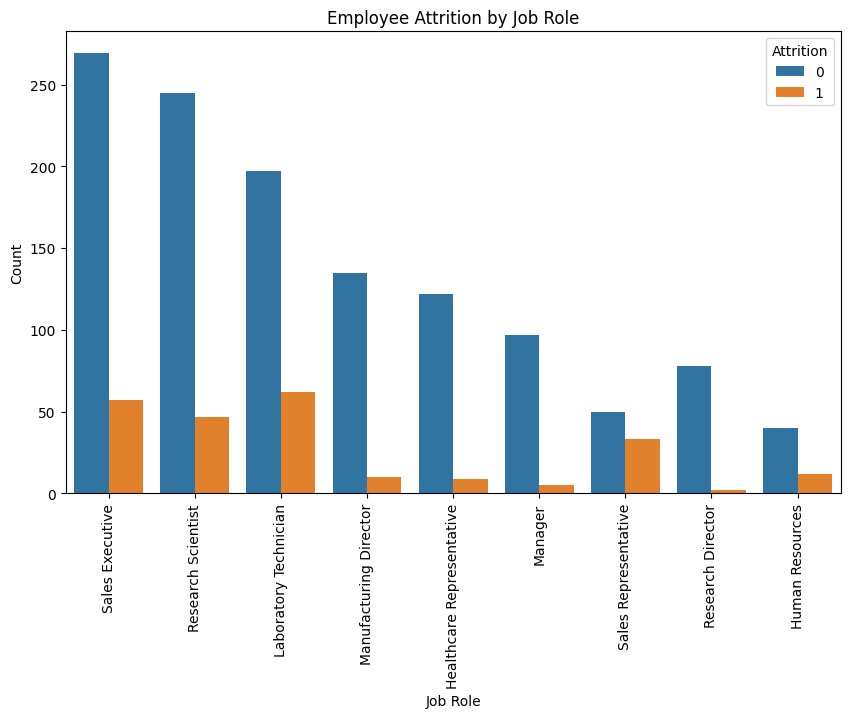

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='JobRole', hue='Attrition', data=employee_df)
plt.title('Employee Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=90);

# Sales representatives are likelier to leave than employees in other positions.

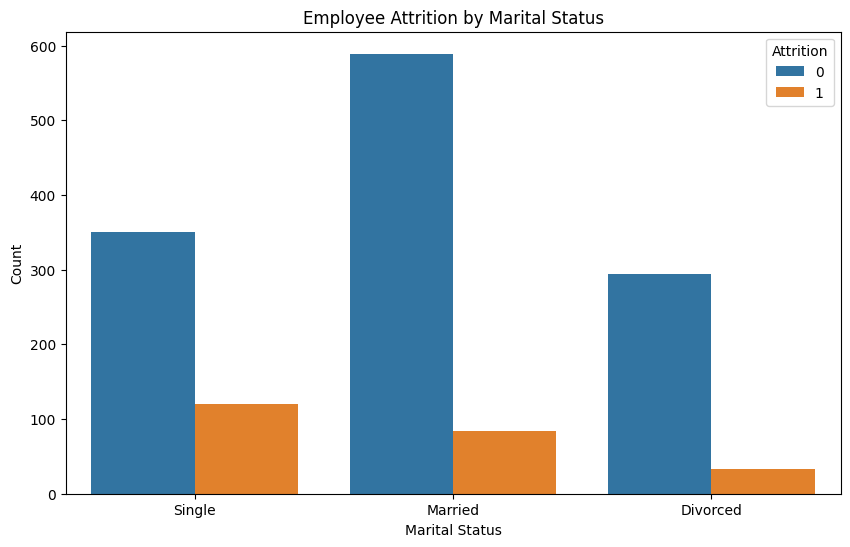

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MaritalStatus', hue='Attrition', data=employee_df)
plt.title('Employee Attrition by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count');

# Single employees are more likely to leave the company than those who are married or divorced.

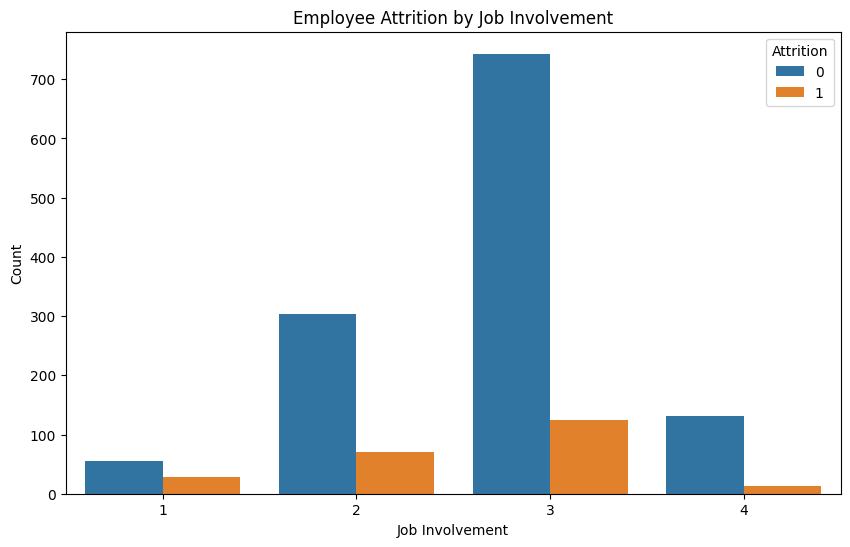

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='JobInvolvement', hue='Attrition', data=employee_df)
plt.title('Employee Attrition by Job Involvement')
plt.xlabel('Job Involvement')
plt.ylabel('Count');

# Employees who are less engaged are more likely to leave the company.

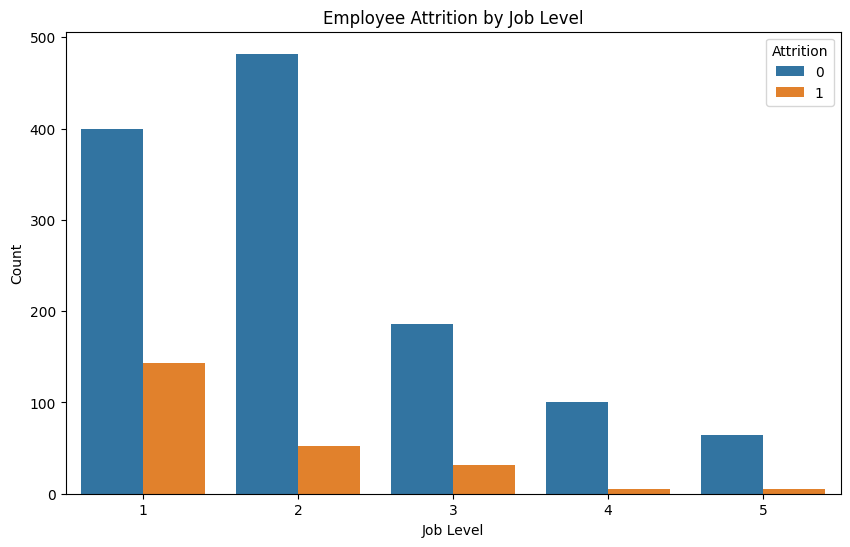

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='JobLevel', hue='Attrition', data=employee_df)
plt.title('Employee Attrition by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Count');

# Employees with lower job levels are more likely to leave the company.

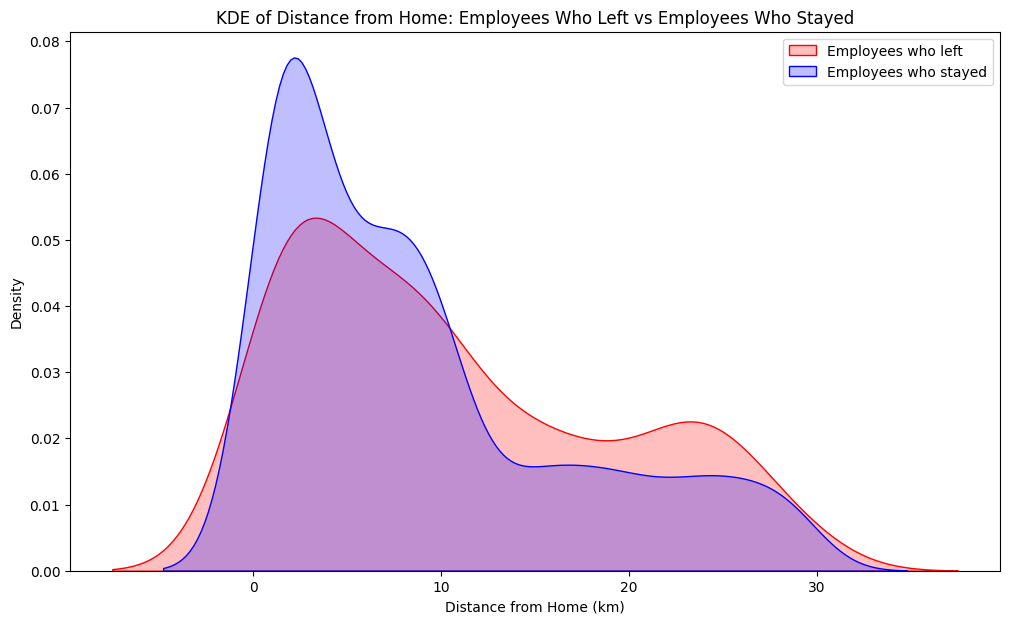

In [18]:
# KDE provides a smooth and continuous estimate of the probability density function (PDF) of a variable,
# unlike histograms which can be blocky and discrete. This smooth curve gives a clearer picture of
# the underlying data distribution, especially for continuous variables.

plt.figure(figsize=(12,7))
sns.kdeplot(employees_left['DistanceFromHome'], label='Employees who left', fill=True, color='r')
sns.kdeplot(employees_stayed['DistanceFromHome'], label='Employees who stayed', fill=True, color='b')
plt.legend()
plt.title('KDE of Distance from Home: Employees Who Left vs Employees Who Stayed')
plt.xlabel('Distance from Home (km)')
plt.ylabel('Density');

# The slight differences in the curves can indicate that employees living farther from their workplace
# may be more likely to leave.

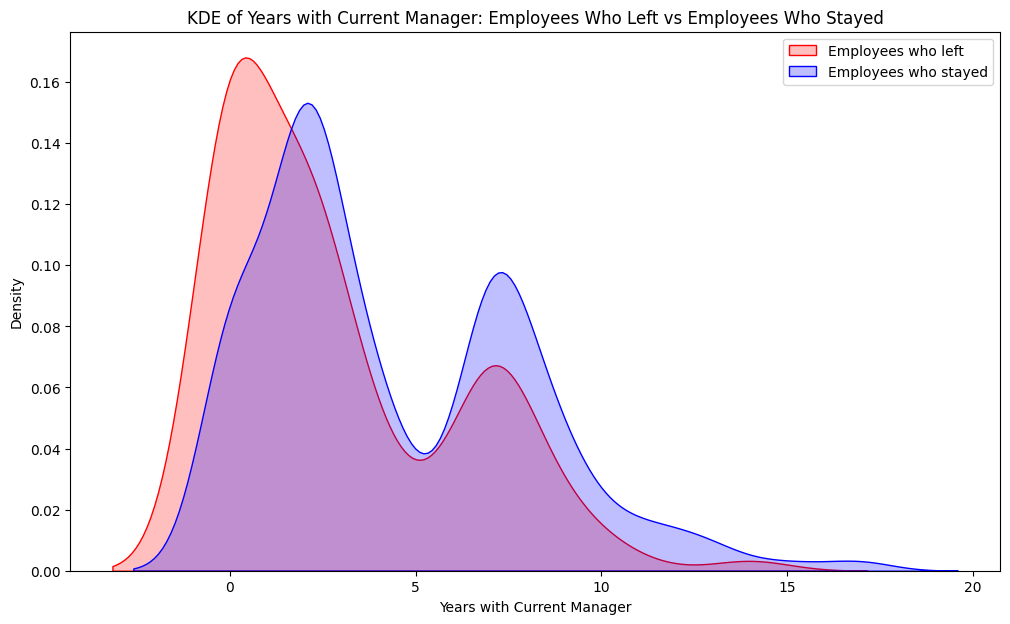

In [19]:
plt.figure(figsize=(12,7))
sns.kdeplot(employees_left['YearsWithCurrManager'], label='Employees who left', fill=True, color='r')
sns.kdeplot(employees_stayed['YearsWithCurrManager'], label='Employees who stayed', fill=True, color='b')
plt.legend()
plt.title('KDE of Years with Current Manager: Employees Who Left vs Employees Who Stayed')
plt.xlabel('Years with Current Manager')
plt.ylabel('Density');

# Employees who left tended to have fewer years with their current manager than those who stayed.

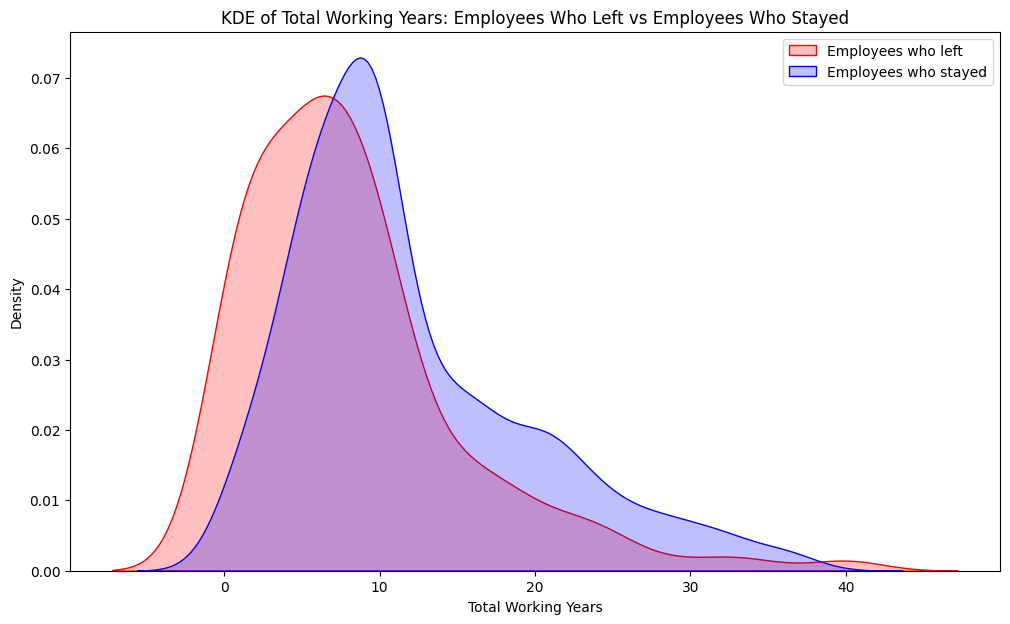

In [20]:
plt.figure(figsize=(12,7))
sns.kdeplot(employees_left['TotalWorkingYears'], label='Employees who left', fill=True, color='r')
sns.kdeplot(employees_stayed['TotalWorkingYears'], label='Employees who stayed', fill=True, color='b')
plt.legend()
plt.title('KDE of Total Working Years: Employees Who Left vs Employees Who Stayed')
plt.xlabel('Total Working Years')
plt.ylabel('Density');

# Employees who left generally had fewer total working years than those who stayed,
# with the distribution for those who stayed being more spread out towards higher total working years.

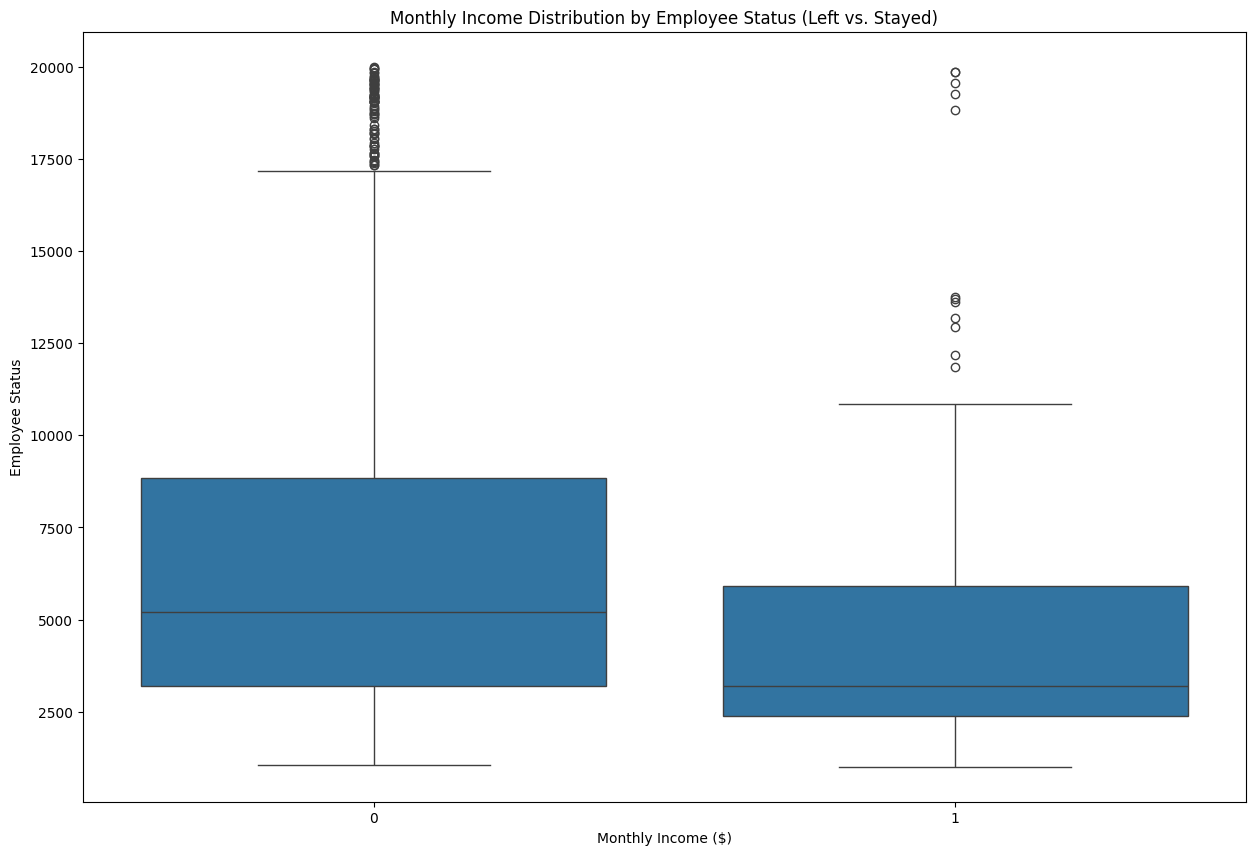

In [21]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=employee_df)
plt.title('Monthly Income Distribution by Employee Status (Left vs. Stayed)')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Employee Status');

# Employees who stayed (0) tend to have a wider distribution of monthly income,
# with higher median and upper ranges, while employees who left (1) generally have lower monthly incomes,
# as indicated by a lower median and a tighter range of values.

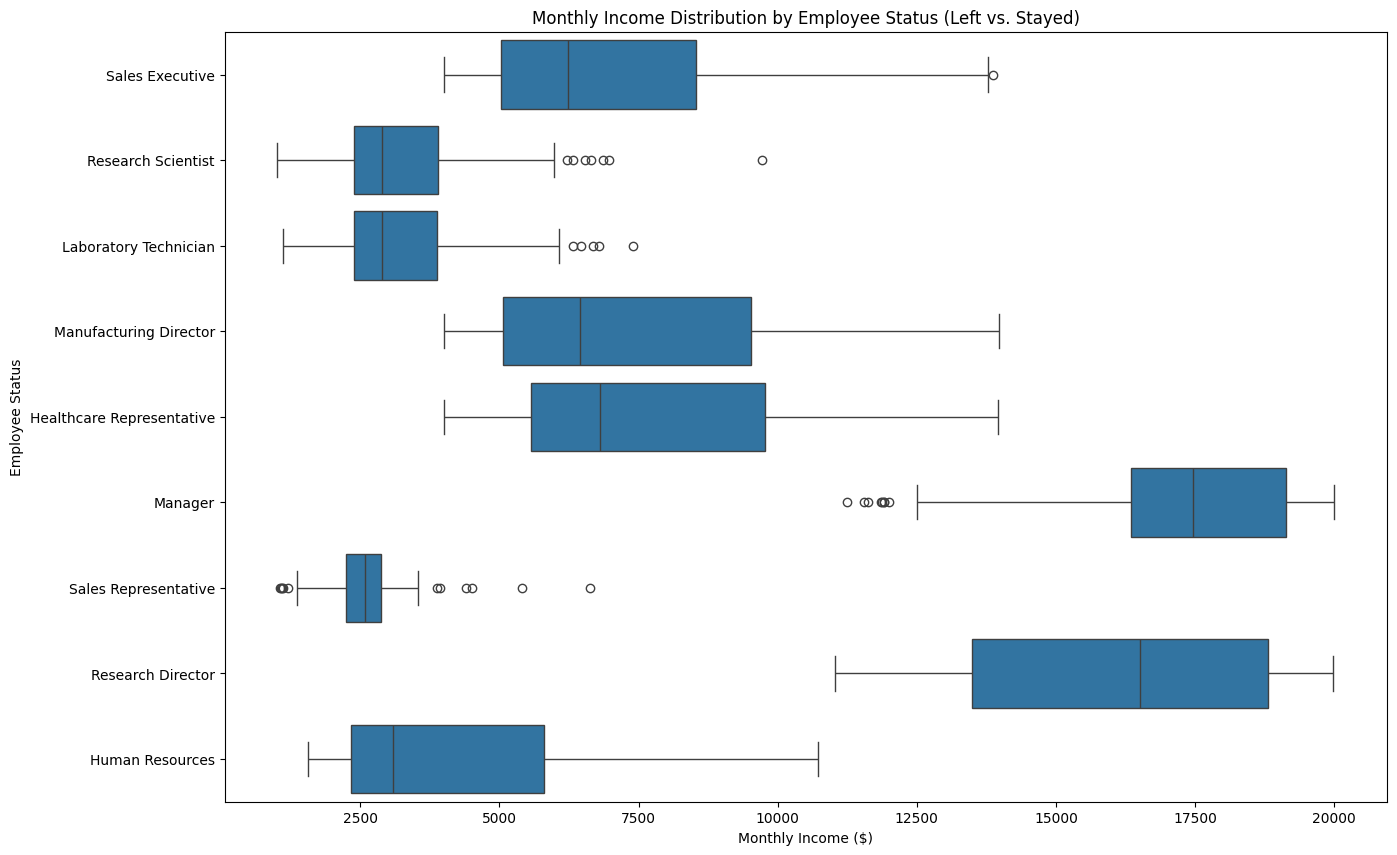

In [22]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=employee_df)
plt.title('Monthly Income Distribution by Employee Status (Left vs. Stayed)')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Employee Status');

# The monthly income distribution across different job roles highlights that roles such as Sales Executives
# and Research Directors have higher and broader income distributions,
# while positions like Sales Representatives and Laboratory Technicians tend to have lower and more compressed salary ranges.
# Additionally, several outliers exist across most roles, especially for Research Scientists,
# indicating some employees in these positions earn significantly more or less than the majority.

## Splitting and Cleaning the Data

In [23]:
employee_df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

In [24]:
X_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender',
                     'JobRole', 'MaritalStatus']]
X_cat.head()

BusinessTravel              Department EducationField  Gender  \
0      Travel_Rarely                   Sales  Life Sciences  Female   
1  Travel_Frequently  Research & Development  Life Sciences    Male   
2      Travel_Rarely  Research & Development          Other    Male   
3  Travel_Frequently  Research & Development  Life Sciences  Female   
4      Travel_Rarely  Research & Development        Medical    Male   

                 JobRole MaritalStatus  
0        Sales Executive        Single  
1     Research Scientist       Married  
2  Laboratory Technician        Single  
3     Research Scientist       Married  
4  Laboratory Technician       Married

In [25]:
encoder = OneHotEncoder()
X_cat_encoded = encoder.fit_transform(X_cat).toarray()
X_cat_encoded

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [26]:
X_cat_encoded.shape

(1470, 26)

In [27]:
X_cat_encoded_df = pd.DataFrame(X_cat_encoded, columns=encoder.get_feature_names_out(X_cat.columns))
X_cat_encoded_df.head()

BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
0                        0.0                               0.0   
1                        0.0                               1.0   
2                        0.0                               0.0   
3                        0.0                               1.0   
4                        0.0                               0.0   

   BusinessTravel_Travel_Rarely  Department_Human Resources  \
0                           1.0                         0.0   
1                           0.0                         0.0   
2                           1.0                         0.0   
3                           0.0                         0.0   
4                           1.0                         0.0   

   Department_Research & Development  Department_Sales  \
0                                0.0               1.0   
1                                1.0               0.0   
2                                1.0               0.0   
3                                1.0               0.0   
4                                1.0               0.0   

   EducationField_Human Resources  EducationField_Life Sciences  \
0                             0.0                           1.0   
1                             0.0                           1.0   
2                             0.0                           0.0   
3                             0.0                           1.0   
4                             0.0                           0.0   

   EducationField_Marketing  EducationField_Medical  ...  \
0                       0.0                     0.0  ...   
1                       0.0                     0.0  ...   
2                       0.0                     0.0  ...   
3                       0.0                     0.0  ...   
4                       0.0                     1.0  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                            0.0              0.0   
1                            0.0              0.0   
2                            1.0              0.0   
3                            0.0              0.0   
4                            1.0              0.0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             0.0                        0.0   
4                             0.0                        0.0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                         0.0                      1.0   
1                         1.0                      0.0   
2                         0.0                      0.0   
3                         1.0                      0.0   
4                         0.0                      0.0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                           0.0                     0.0   
1                           0.0                     0.0   
2                           0.0                     0.0   
3                           0.0                     0.0   
4                           0.0                     0.0   

   MaritalStatus_Married  MaritalStatus_Single  
0                    0.0                   1.0  
1                    1.0                   0.0  
2                    0.0                   1.0  
3                    1.0                   0.0  
4                    1.0                   0.0  

[5 rows x 26 columns]

In [28]:
X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome', 'Education',
                           'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
                           'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
                           'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
                           'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                           'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                           'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                           'YearsWithCurrManager']]
X_numerical.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0          94               3         2                4           5993  ...   
1          61               2         2                2           5130  ...   
2          92               2         1                3           2090  ...   
3          56               3         1                3           2909  ...   
4          40               3         1                2           3468  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 24 columns]

In [29]:
scaler = MinMaxScaler()
X_numerical_scaled_df = pd.DataFrame(scaler.fit_transform(X_numerical), columns=X_numerical.columns)
X_numerical_scaled_df.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0  0.547619   0.715820          0.000000       0.25                 0.333333   
1  0.738095   0.126700          0.250000       0.00                 0.666667   
2  0.452381   0.909807          0.035714       0.25                 1.000000   
3  0.357143   0.923407          0.071429       0.75                 1.000000   
4  0.214286   0.350036          0.035714       0.00                 0.000000   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0    0.914286        0.666667      0.25         1.000000       0.262454  ...   
1    0.442857        0.333333      0.25         0.333333       0.217009  ...   
2    0.885714        0.333333      0.00         0.666667       0.056925  ...   
3    0.371429        0.666667      0.00         0.666667       0.100053  ...   
4    0.142857        0.666667      0.00         0.333333       0.129489  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                0.0                  0.000000          0.000000   
1                1.0                  1.000000          0.333333   
2                0.0                  0.333333          0.000000   
3                0.0                  0.666667          0.000000   
4                0.0                  1.000000          0.333333   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0              0.200                    0.0         0.000000            0.15   
1              0.250                    0.5         0.666667            0.25   
2              0.175                    0.5         0.666667            0.00   
3              0.200                    0.5         0.666667            0.20   
4              0.150                    0.5         0.666667            0.05   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0            0.222222                 0.000000              0.294118  
1            0.388889                 0.066667              0.411765  
2            0.000000                 0.000000              0.000000  
3            0.388889                 0.200000              0.000000  
4            0.111111                 0.133333              0.117647  

[5 rows x 24 columns]

In [30]:
X = pd.concat([X_cat_encoded_df, X_numerical_scaled_df], axis=1)
X.columns = X.columns.astype(str) # to ensure column names are strings for consistency
X.head()

BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
0                        0.0                               0.0   
1                        0.0                               1.0   
2                        0.0                               0.0   
3                        0.0                               1.0   
4                        0.0                               0.0   

   BusinessTravel_Travel_Rarely  Department_Human Resources  \
0                           1.0                         0.0   
1                           0.0                         0.0   
2                           1.0                         0.0   
3                           0.0                         0.0   
4                           1.0                         0.0   

   Department_Research & Development  Department_Sales  \
0                                0.0               1.0   
1                                1.0               0.0   
2                                1.0               0.0   
3                                1.0               0.0   
4                                1.0               0.0   

   EducationField_Human Resources  EducationField_Life Sciences  \
0                             0.0                           1.0   
1                             0.0                           1.0   
2                             0.0                           0.0   
3                             0.0                           1.0   
4                             0.0                           0.0   

   EducationField_Marketing  EducationField_Medical  ...  PerformanceRating  \
0                       0.0                     0.0  ...                0.0   
1                       0.0                     0.0  ...                1.0   
2                       0.0                     0.0  ...                0.0   
3                       0.0                     0.0  ...                0.0   
4                       0.0                     1.0  ...                0.0   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                  0.000000          0.000000              0.200   
1                  1.000000          0.333333              0.250   
2                  0.333333          0.000000              0.175   
3                  0.666667          0.000000              0.200   
4                  1.000000          0.333333              0.150   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                    0.0         0.000000            0.15            0.222222   
1                    0.5         0.666667            0.25            0.388889   
2                    0.5         0.666667            0.00            0.000000   
3                    0.5         0.666667            0.20            0.388889   
4                    0.5         0.666667            0.05            0.111111   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                 0.000000              0.294118  
1                 0.066667              0.411765  
2                 0.000000              0.000000  
3                 0.200000              0.000000  
4                 0.133333              0.117647  

[5 rows x 50 columns]

In [31]:
y = employee_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [32]:
# True positives (TP): The classifier predicted TRUE, and the correct class was TRUE.
# True negatives (TN): The classifier predicted FALSE, and the correct class was FALSE.
# False positives (FP) (Type I error): The classifier predicted TRUE, but the correct class was FALSE.
# False negatives (FN) (Type II error): The classifier predicted FALSE, but the correct class was TRUE.

# Accuracy = (TP+TN)/(TP+TN+FP+FN)
# Precision = TP/Total TRUE Predictions = TP/(TP+FP) (When the classifier predicted TRUE class,
# how often was it right?)
# Recall = TP/Actual TRUE = TP/(TP+FN) (When the class was TRUE,
# how often did the classifier get it right?)

## Logistic Regression: Model Training and Evaluation

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)

(1102, 50)
(368, 50)


In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

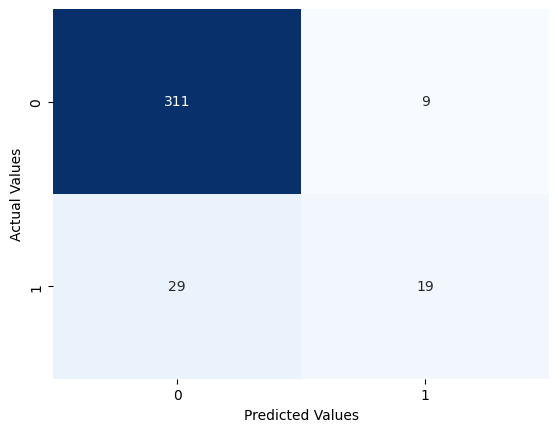

In [35]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False);
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

# The model performs well at identifying employees who stayed (high true negatives)
# but struggles more with identifying employees who left
# (lower true positives and higher false negatives).

In [36]:
print(classification_report(y_test, y_pred))

# The model performs well in identifying employees who stayed
# but struggles with identifying employees who left,
# as seen by the lower recall and F1-score for class 1.

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       320
           1       0.68      0.40      0.50        48

    accuracy                           0.90       368
   macro avg       0.80      0.68      0.72       368
weighted avg       0.88      0.90      0.88       368



## Random Forest: Model Training and Evaluation

In [37]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

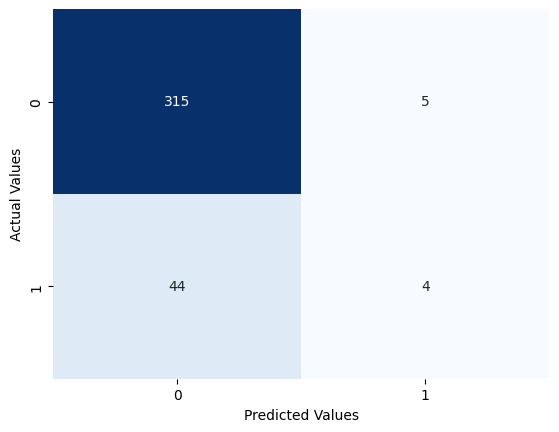

In [38]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

# The model performs well at identifying employees who stayed (high true negatives)
# but struggles more with identifying employees who left
# (lower true positives and higher false negatives).

In [39]:
print(classification_report(y_test, y_pred))

# The model performs well in identifying employees who stayed
# but struggles with identifying employees who left,
# as seen by the lower recall and F1-score for class 1.

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       320
           1       0.44      0.08      0.14        48

    accuracy                           0.87       368
   macro avg       0.66      0.53      0.53       368
weighted avg       0.82      0.87      0.83       368



## Deep Learning: Model Training and Evaluation

In [40]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize a Sequential model
model = tf.keras.models.Sequential()
# Input and first hidden layer: 100 neurons, ReLU activation, and L2 regularization
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(50,),
                                kernel_regularizer=tf.keras.regularizers.l2(0.01)))
# Second hidden layer: 50 neurons with ReLU activation
model.add(tf.keras.layers.Dense(units=50, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
# Dropout layer to reduce overfitting
model.add(tf.keras.layers.Dropout(0.5))
# Output layer: 1 neuron with Sigmoid activation for binary classification
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,201 (39.85 KB)

 Trainable params: 10,201 (39.85 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model with validation monitoring
epochs_hist = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=50, batch_size=32, verbose=1)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7180 - loss: 1.7813 - val_accuracy: 0.8545 - val_loss: 1.3366
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8328 - loss: 1.3026 - val_accuracy: 0.8545 - val_loss: 1.0360
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8259 - loss: 1.0150 - val_accuracy: 0.8545 - val_loss: 0.8279
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8224 - loss: 0.8283 - val_accuracy: 0.8545 - val_loss: 0.6920
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8350 - loss: 0.6811 - val_accuracy: 0.8545 - val_loss: 0.6012
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8362 - loss: 0.5951 - val_accuracy: 0.8727 - val_loss: 0.5419
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8462 - loss: 0.5423 - val_accuracy: 0.8773 - val_loss: 0.4984
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8643 - loss: 0.4900 - val_accuracy: 0.8773 - val_loss:

In [42]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8694 - loss: 0.3783 
Test Accuracy: 0.88


In [43]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5) # Convert probabilities to binary predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [44]:
y_pred[:10]

array([[0.12974334],
       [0.04369812],
       [0.08261088],
       [0.33397916],
       [0.09309951],
       [0.01285328],
       [0.16920267],
       [0.0249593 ],
       [0.3574605 ],
       [0.10454745]], dtype=float32)

In [45]:
y_pred_binary[:10]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [46]:
epochs_hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

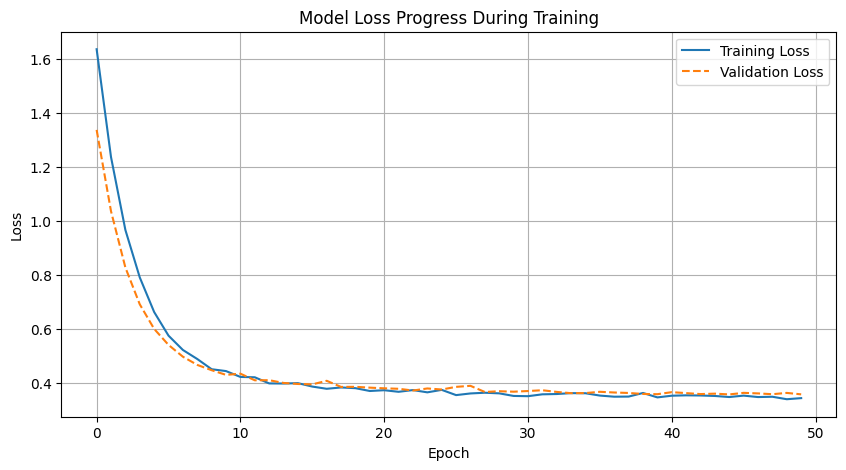

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(epochs_hist.history['loss'], label='Training Loss')
plt.plot(epochs_hist.history['val_loss'], label='Validation Loss', linestyle='--')
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid();

# This plot shows training and validation loss over epochs.
# Both decrease steadily and stabilize, indicating good learning without overfitting.
# The close alignment of the two lines suggests the model generalizes well.

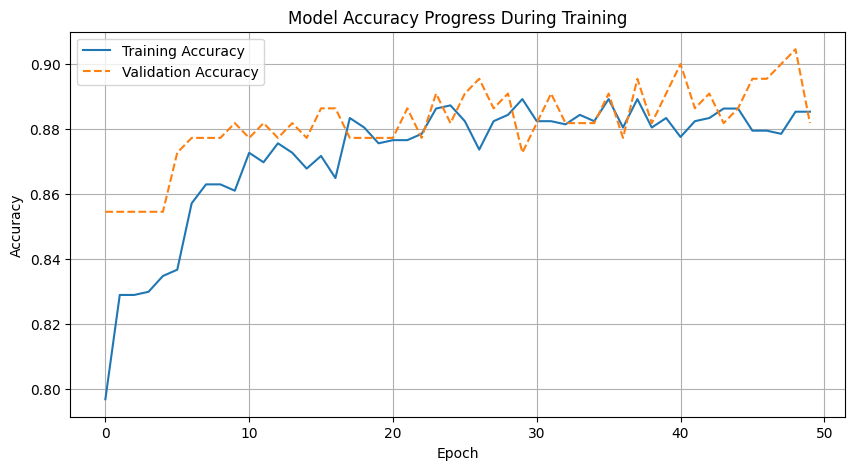

In [48]:
plt.figure(figsize=(10, 5))
plt.plot(epochs_hist.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_hist.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid();

# This plot shows training accuracy and validation accuracy across epochs.
# Both metrics steadily increase and stabilize, with consistent alignment indicating good generalization.
# The model performs well without signs of overfitting.

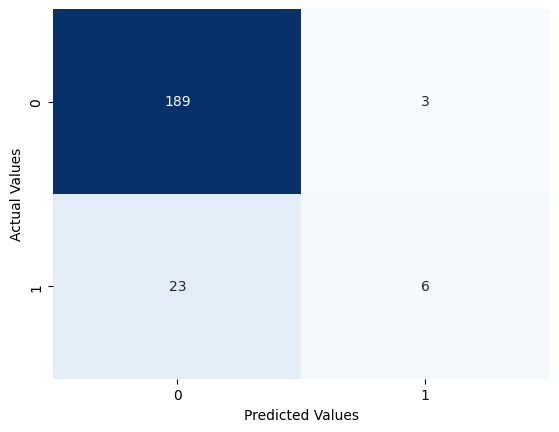

In [49]:
cm = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

# The model performs well at identifying employees who stayed (high true negatives)
# but struggles more with identifying employees who left
# (lower true positives and higher false negatives).

In [50]:
print(classification_report(y_test, y_pred_binary))

# The model performs well in identifying employees who stayed
# but struggles with identifying employees who left,
# as seen by the lower recall and F1-score for class 1.

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       192
           1       0.67      0.21      0.32        29

    accuracy                           0.88       221
   macro avg       0.78      0.60      0.63       221
weighted avg       0.86      0.88      0.85       221



# Marketing Department: Customer Segmentation for Targeted Campaigns

## Business Problem Overview

The bank's marketing team has collected extensive customer data over the past six months and aims to use segmentation analysis to divide customers into at least three distinct groups for a targeted ad campaign.

## Data Loading and Preprocessing

In [51]:
credit_card_df = pd.read_csv('../data/raw/marketing-department.csv')
credit_card_df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [52]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [53]:
credit_card_df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

## Dataset Exploration and Visualization

In [54]:
credit_card_df[credit_card_df['PURCHASES'] == 49039.570000]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
550  C10574  11547.52001                1.0   49039.57          40761.25   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
550                 8278.32    558.166886                  1.0   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
550                         1.0                          0.916667   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
550                0.083333                 1            101       22500.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
550  46930.59824       2974.069421              0.25      12

In [55]:
credit_card_df[credit_card_df['CASH_ADVANCE'] == 47137.211760]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2159  C12226  10905.05381                1.0     431.93             133.5   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2159                  298.43   47137.21176             0.583333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2159                        0.25                               0.5   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2159                     1.0               123             21       19600.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2159  39048.59762       5394.173671               0.0      12

In [56]:
credit_card_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [57]:
credit_card_df.loc[(credit_card_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = credit_card_df['MINIMUM_PAYMENTS'].mean()
credit_card_df.loc[(credit_card_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = credit_card_df['CREDIT_LIMIT'].mean()

In [58]:
credit_card_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [59]:
credit_card_df.duplicated().sum()

0

In [60]:
credit_card_df.drop('CUST_ID', axis = 1, inplace = True)
credit_card_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [61]:
len(credit_card_df.columns)

17

In [62]:
credit_card_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

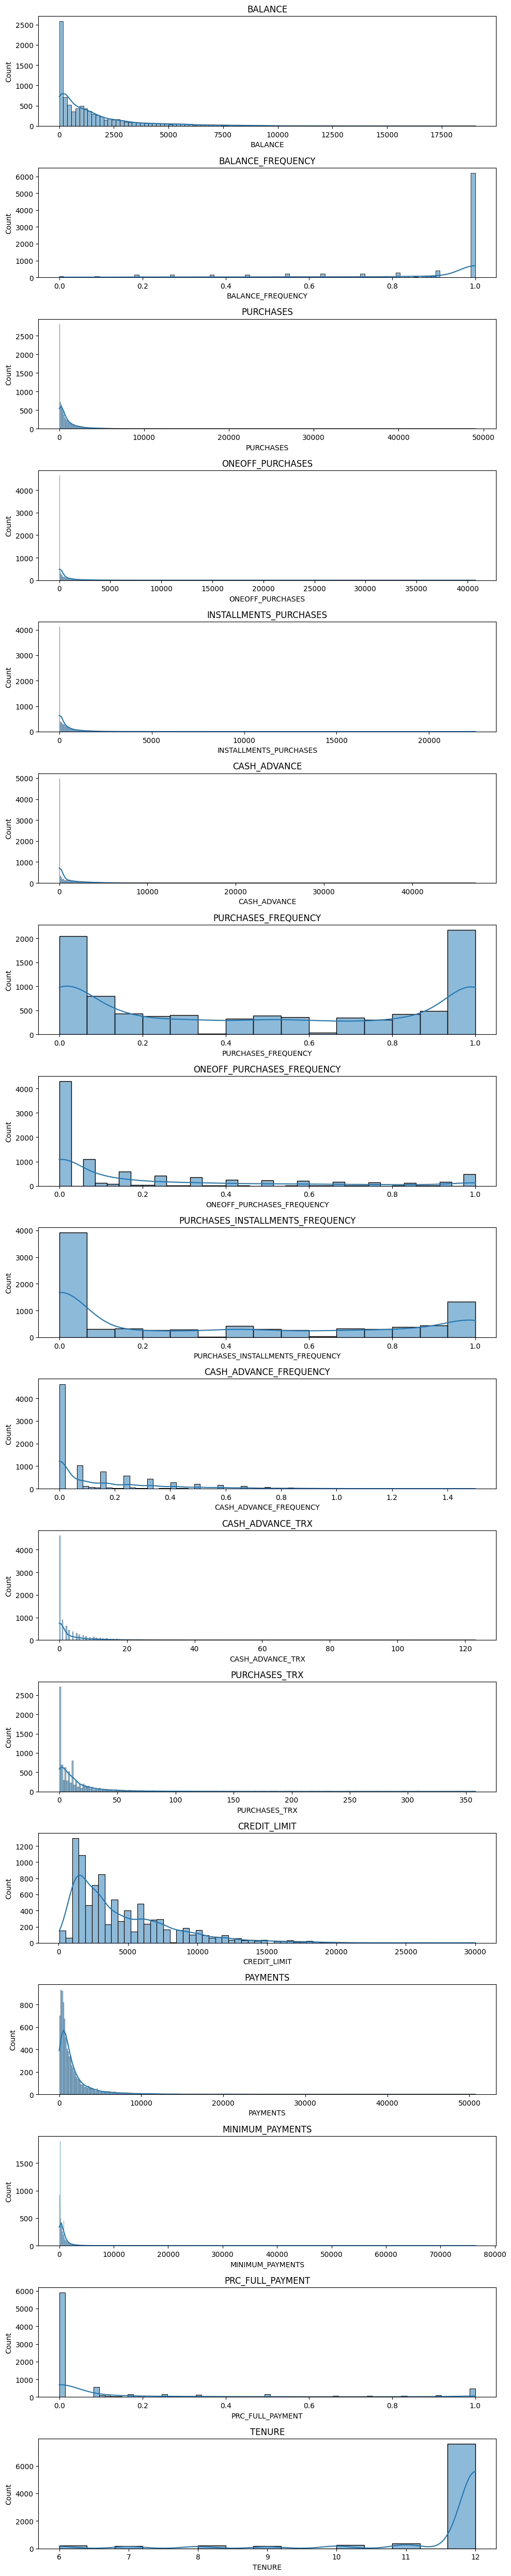

In [63]:
plt.figure(figsize=(10, 50))
for i in range(len(credit_card_df.columns)):
    # Create a subplot for each column
    plt.subplot(len(credit_card_df.columns), 1, i + 1)
    # Plot the histogram with KDE (Kernel Density Estimate)
    sns.histplot(credit_card_df[credit_card_df.columns[i]], kde=True)
    # Add a title for each subplot using the column name
    plt.title(credit_card_df.columns[i])
plt.tight_layout()

In [64]:
# The "BALANCE" histogram shows that the majority of customers have very low balances, with a sharp peak near zero.
# The distribution has a long right tail, indicating that a few customers have significantly higher balances.

# The histogram for "BALANCE_FREQUENCY" indicates that most customers have a frequency value of 1, suggesting consistent account balance usage.
# The distribution shows very low counts for other frequency values, with a gradual increase toward the peak at 1.

# The "PURCHASES" histogram shows that the majority of customers have very low purchase amounts, with a steep decline as the purchase values increase.
# The distribution has a long right tail, indicating a small number of customers with significantly higher purchase amounts.

# The "ONEOFF_PURCHASES" histogram shows that most customers have very low values, with the majority clustered near zero.
# The distribution has a long right tail, indicating that a small group of customers makes significantly higher one-off purchases.

# The "INSTALLMENTS_PURCHASES" histogram reveals that most installment purchase values are close to zero, with a steep decline as the values increase.
# The distribution also exhibits a long right tail, showing a small number of customers with much higher installment purchases.

# The "CASH_ADVANCE" histogram shows that most customers take out very small cash advances, with a sharp peak near zero.
# A few customers, as indicated by the long right tail, take out significantly larger cash advances.

# The "PURCHASES_FREQUENCY" histogram demonstrates that most customers either have a frequency close to 0 or 1, representing infrequent or very regular purchases.
# The distribution dips in the middle, suggesting fewer customers have moderate purchase frequencies.

# The "ONEOFF_PURCHASES_FREQUENCY" histogram shows that most customers have a frequency close to 0, indicating infrequent one-off purchases.
# A small number of customers have a frequency near 1, suggesting consistent one-off purchasing behavior.

# The "PURCHASES_INSTALLMENTS_FREQUENCY" histogram highlights that most customers have a frequency close to 0, reflecting infrequent installment-based purchases.
# There is a smaller peak near 1, indicating a subset of customers with consistent installment purchasing behavior.

# The "CASH_ADVANCE_FREQUENCY" histogram shows that most customers have a frequency near 0, indicating infrequent use of cash advances.
# A small number of customers exhibit higher frequencies, though the counts drop significantly as the frequency increases.

# The "CASH_ADVANCE_TRX" histogram reveals that most customers have completed very few cash advance transactions, with a steep decline as the number of transactions increases.
# A small portion of customers performs a higher number of transactions, as indicated by the long right tail.

# The "PURCHASES_TRX" histogram shows that most customers have completed very few purchase transactions, with a sharp peak near zero.
# The distribution has a long right tail, indicating a small number of customers with a significantly higher number of transactions.

# The "CREDIT_LIMIT" histogram shows that most customers have a credit limit between 0 and 5,000, with the highest count in this range.
# The distribution decreases steadily as the credit limit increases, with very few customers having limits above 15,000.

# The "PAYMENTS" histogram indicates that the majority of customers make low payment amounts, with a sharp peak near zero.
# A long right tail suggests that a small number of customers make significantly higher payments.

# The "MINIMUM_PAYMENTS" histogram shows that most customers pay very low minimum amounts, with a steep peak near zero.
# There is a long right tail, indicating a small number of customers who pay significantly higher minimum amounts.

# The "PRC_FULL_PAYMENT" histogram reveals that the majority of customers rarely pay their balance in full, with a sharp peak near 0.
# A small group of customers, represented by a smaller peak near 1, consistently pays their balance in full.

# The "TENURE" histogram shows that the majority of customers have a tenure of 12 years, represented by a sharp peak at 12.
# Other tenure values, ranging from 6 to 11 years, are significantly less common, with minimal counts.

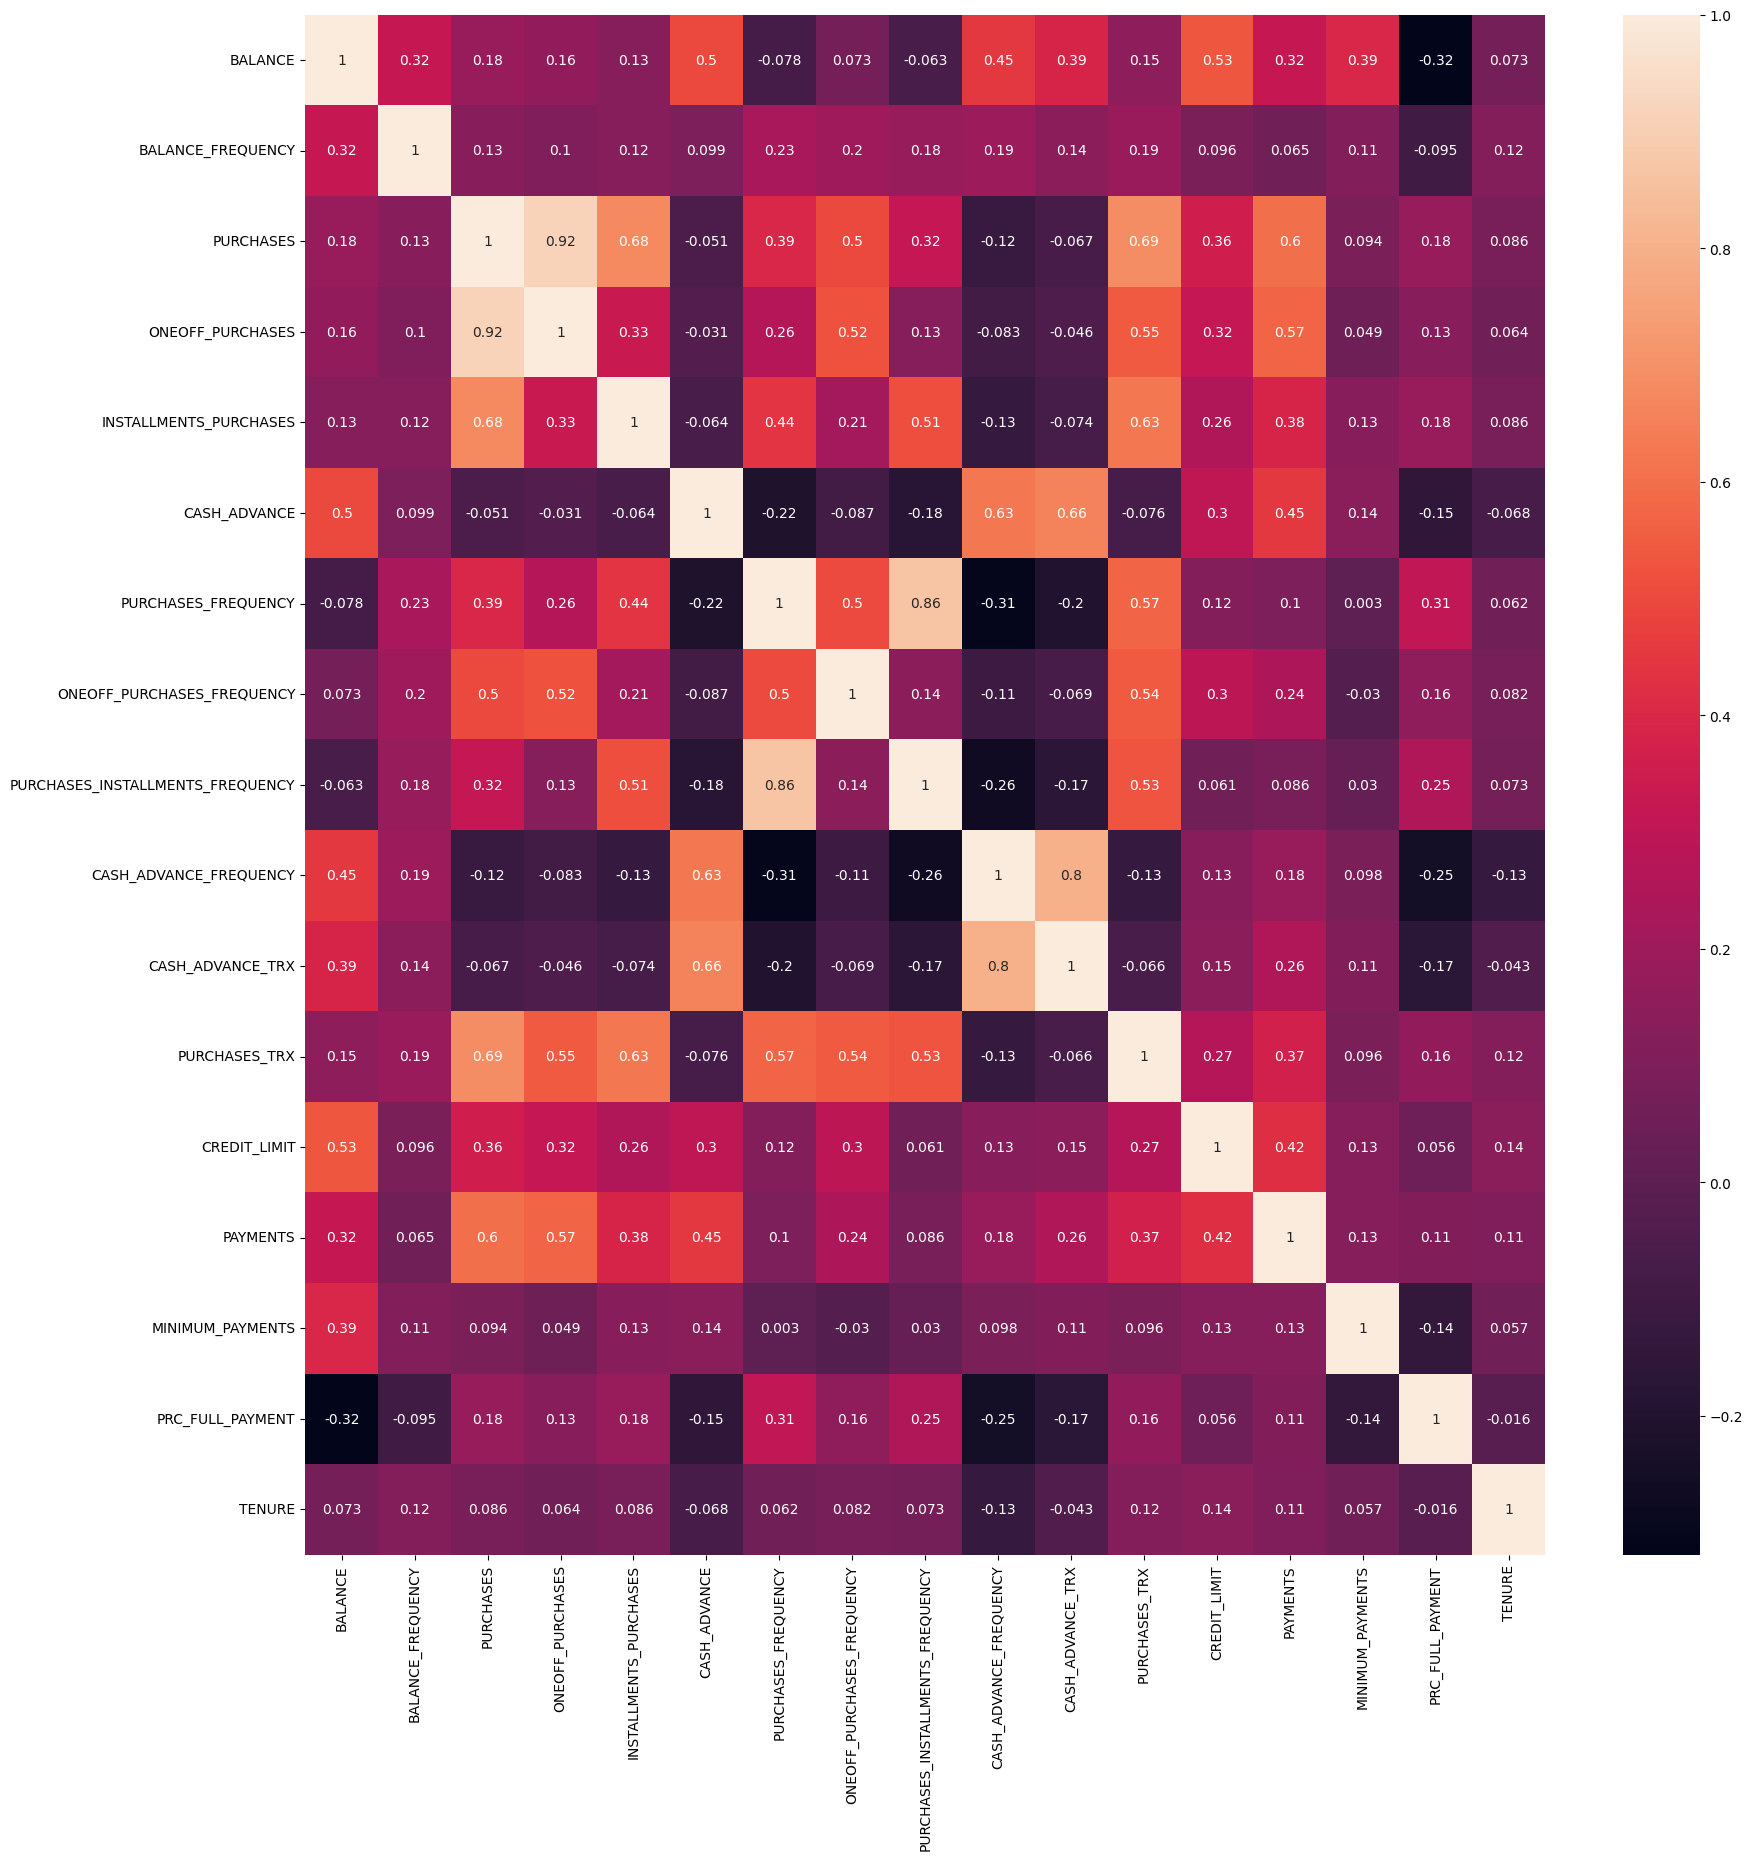

In [65]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(credit_card_df.corr(), annot=True);

# The correlation matrix reveals several key relationships between the variables.
# Variables like BALANCE and CREDIT_LIMIT have a strong positive correlation (0.531),
# indicating that higher credit limits are associated with higher balances.
# Similarly, PURCHASES and ONEOFF_PURCHASES are highly correlated (0.917),
# suggesting that one-off purchases contribute significantly to the overall purchase amounts.
# On the other hand, variables like PRC_FULL_PAYMENT and BALANCE show a negative correlation (-0.319),
# indicating that customers with high balances are less likely to pay their balances in full.

## Determining Optimal Clusters with K-Means

In [66]:
# The K-means algorithm clusters observations with similar attribute values
# by calculating the Euclidean distance between points.

# K-Means clustering:
# 1. Select the Number of Clusters (k): Decide how many clusters the data should be grouped into.
# 2. Initialize Centroids: Randomly place k initial centroids in the data space.
# 3. Assign Points to Clusters: Assign each data point to the nearest centroid based on a distance metric (e.g., Euclidean distance).
# 4. Update Centroids: Recalculate the centroid of each cluster by taking the mean of all points assigned to that cluster.
# 5. Iterate Until Convergence: Repeat steps 3 and 4 until centroids stabilize (no significant change) or a maximum number of iterations is reached.

# The Elbow Method helps determine the optimal number of clusters (k) for K-Means.
# 1. Run K-Means for a range of k values.
# 2. Calculate the Sum of Squared Errors (SSE) for each k.
# 3. Plot SSE vs. k and identify the "elbow point," where SSE sharply decreases and then levels off. The "elbow" represents the ideal number of clusters.

In [67]:
scaler = StandardScaler()
credit_card_df_scaled = scaler.fit_transform(credit_card_df)
credit_card_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

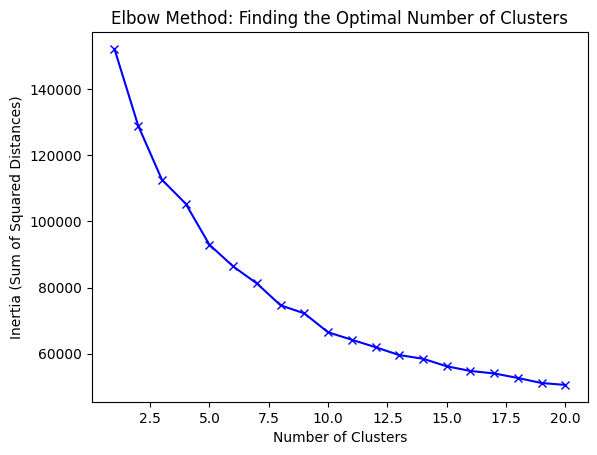

In [68]:
inertia_scores_1 = []
cluster_range = range(1, 21)
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(credit_card_df_scaled)
    inertia_scores_1.append(kmeans.inertia_)

plt.plot(cluster_range, inertia_scores_1, 'bx-')
plt.title('Elbow Method: Finding the Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)');

# The "elbow" appears to be around 4 or 5 clusters. Choosing 4 or 5 clusters would balance
# minimizing inertia while avoiding overfitting with too many clusters.

In [69]:
kmeans = KMeans(4)
kmeans.fit(credit_card_df_scaled)
labels = kmeans.labels_

# The statement labels = kmeans.labels_ is used to retrieve the cluster labels assigned by
# the K-Means algorithm to each data point after the clustering process is completed. => 0, 1, 2, 3

In [70]:
kmeans.cluster_centers_.shape

# Rows (4): This represents the number of clusters (k) you specified when running the K-Means algorithm.
# In this case, there are 4 clusters, so the output contains 4 rows,
# with each row corresponding to the centroid (center) of a cluster.
# Columns (17): This represents the number of features (or dimensions) in your dataset.
# In this case, the dataset has 17 features, so each centroid is a point in 17-dimensional space.

(4, 17)

In [71]:
# Convert the cluster centers (scaled values) into a DataFrame with column names matching the original dataset
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[credit_card_df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0 -0.682529         -1.882396 -0.312141        -0.227184   
1  1.039282          0.457513  2.749992         2.367604   
2 -0.306496          0.368700  0.081655        -0.005781   
3  0.481341          0.401760 -0.354998        -0.244042   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.320607    -0.318372           -0.557237   
1               2.152588     0.182619            1.133381   
2               0.203678    -0.366415            0.880602   
3              -0.391047     0.506404           -0.847489   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.416710                        -0.468270   
1                   1.712589                         1.070319   
2                   0.310410                         0.747844   
3                  -0.394366                        -0.738111   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.481975        -0.368865     -0.428250    -0.257844   
1              -0.078008         0.068623      2.718792     1.430749   
2              -0.466631        -0.360893      0.244554    -0.114923   
3               0.726343         0.540690     -0.469796     0.025684   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.236925        -0.256866         0.198725 -0.228351  
1  1.907657         0.560239         0.368714  0.316024  
2 -0.153499        -0.090350         0.284467  0.086873  
3 -0.014335         0.129382        -0.447335 -0.034866

In [72]:
# Transform the cluster centers back to the original scale (undo the scaling applied earlier)
cluster_centers = scaler.inverse_transform(cluster_centers)
# Convert the inverse-transformed cluster centers into a DataFrame with the same column names as the original dataset
cluster_centers = pd.DataFrame(data=cluster_centers, columns=[credit_card_df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY    PURCHASES ONEOFF_PURCHASES  \
0   143.848590          0.431348   336.311752       215.358221   
1  3727.652733          0.985651  6878.605637      4522.174821   
2   926.529145          0.964612  1177.662759       582.841296   
3  2566.345788          0.972444   244.747072       187.376881   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             121.146886   311.229824            0.266705   
1            2357.626036  1361.832481            0.945231   
2             595.250942   210.481926            0.843779   
3              57.448415  2040.823665            0.150212   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.078145                         0.178335   
1                   0.713356                         0.789810   
2                   0.295059                         0.661650   
3                   0.084811                         0.071093   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.038696         0.731596      4.065147  3556.308726   
1               0.119534         3.717131     82.288845  9700.099602   
2               0.041767         0.785996     20.788526  4076.312563   
3               0.280493         6.938636      3.032469  4587.897293   

      PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0  1047.269264       265.590124         0.211838  11.211726  
1  7255.624250      2169.819821         0.261557  11.940239  
2  1288.779437       653.649542         0.236916  11.633577  
3  1691.646144      1165.725467         0.022877  11.470658

In [73]:
# Cluster 0:
# Customers in this cluster have moderate average balances, frequently check their balance,
# and show significant spending on purchases split between one-off and installment payments,
# with minimal cash advances and a high tenure.

# Cluster 1:
# This cluster consists of customers with low balances, less frequent balance checks,
# low overall purchases and one-off purchases, and a higher reliance on cash advances
# with a slightly lower tenure than Cluster 0.

# Cluster 2:
# Customers in this cluster have very high balances, check their balances regularly,
# exhibit moderate spending on purchases, rely heavily on cash advances,
# and have substantial credit limits and payments with medium tenure.

# Cluster 3:
# These customers show very high purchases (especially one-off and installment-based), high balances,
# frequent balance checking, minimal reliance on cash advances, very high credit limits and payments,
# and the highest tenure among all clusters.

In [74]:
print(labels.shape) # This will show the number of data points that were clustered.
print(labels.max()) # This will give the highest cluster number assigned by K-Means.
print(labels.min()) # This confirms that cluster labels start from 0.

(8950,)
3
0


In [75]:
credit_card_df_cluster = pd.concat([credit_card_df, pd.DataFrame({'CLUSTER': labels})], axis=1)
credit_card_df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  CLUSTER  
0   201.802084        139.509787          0.000000      12        0  
1  4103.032597       1072.340217          0.222222      12        3  
2   622.066742        627.284787          0.000000      12        2  
3     0.000000        864.206542          0.000000      12        0  
4   678.334763        244.791237          0.000000      12        3

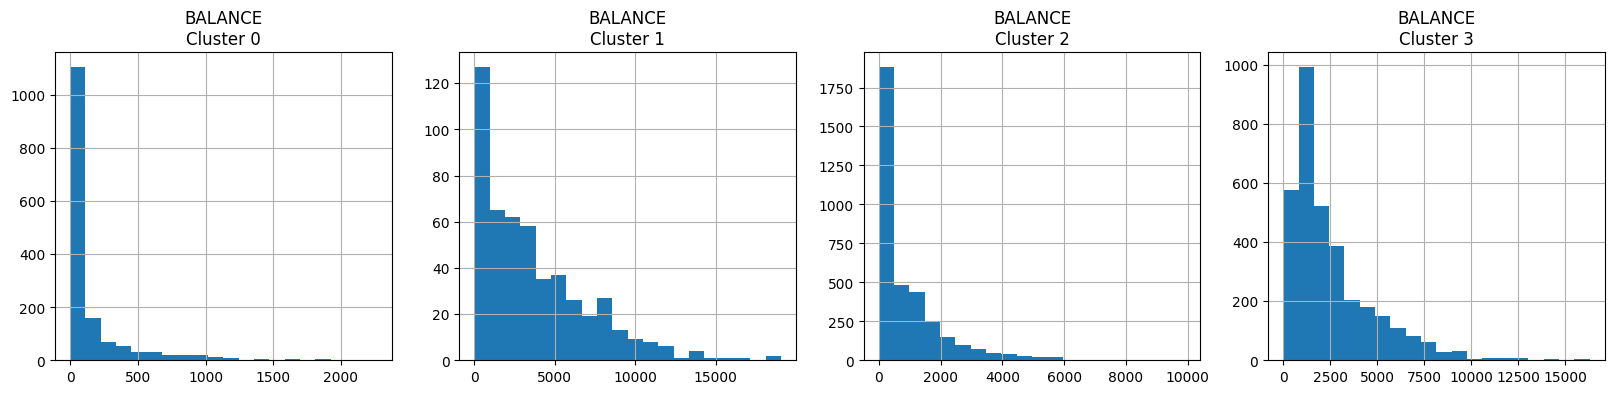

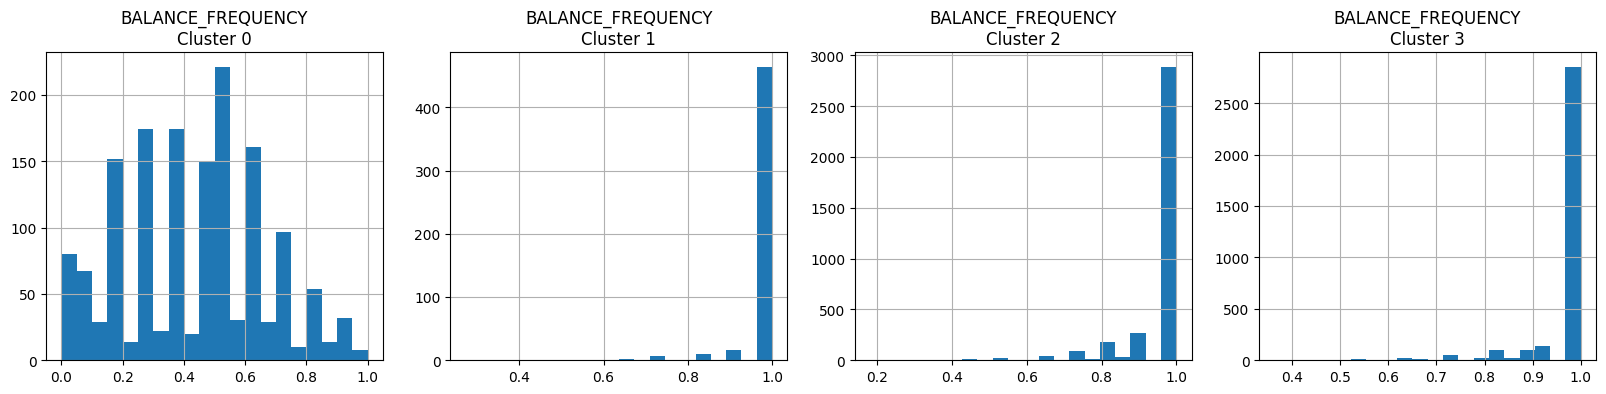

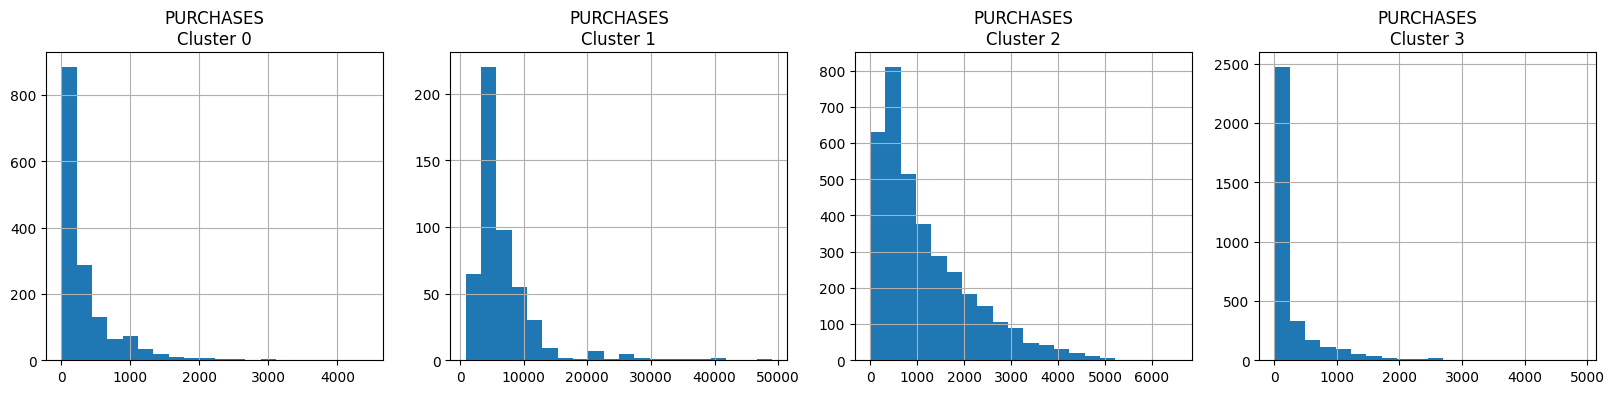

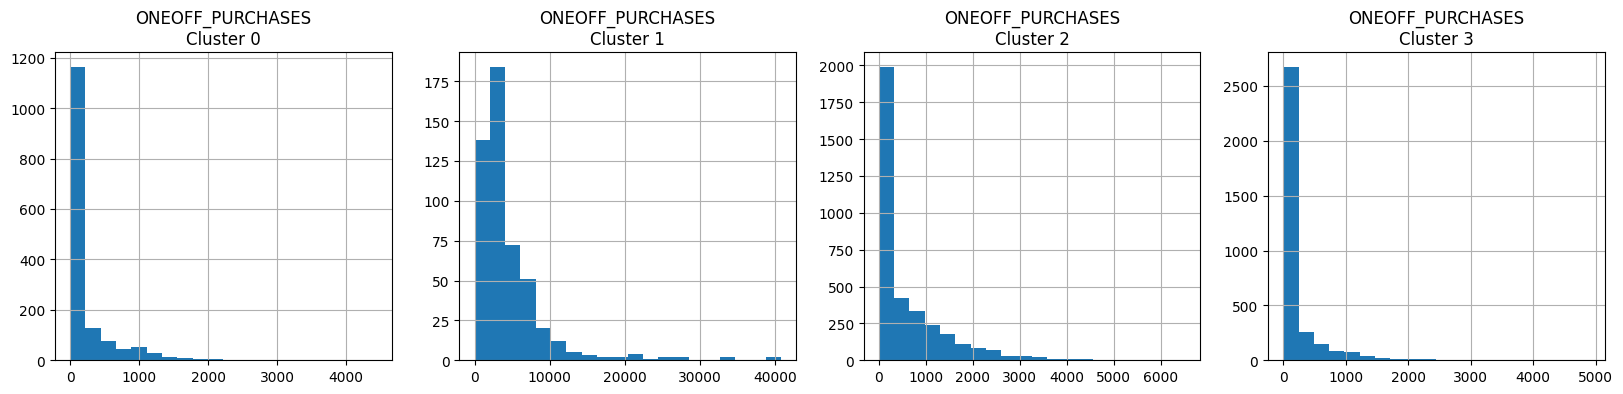

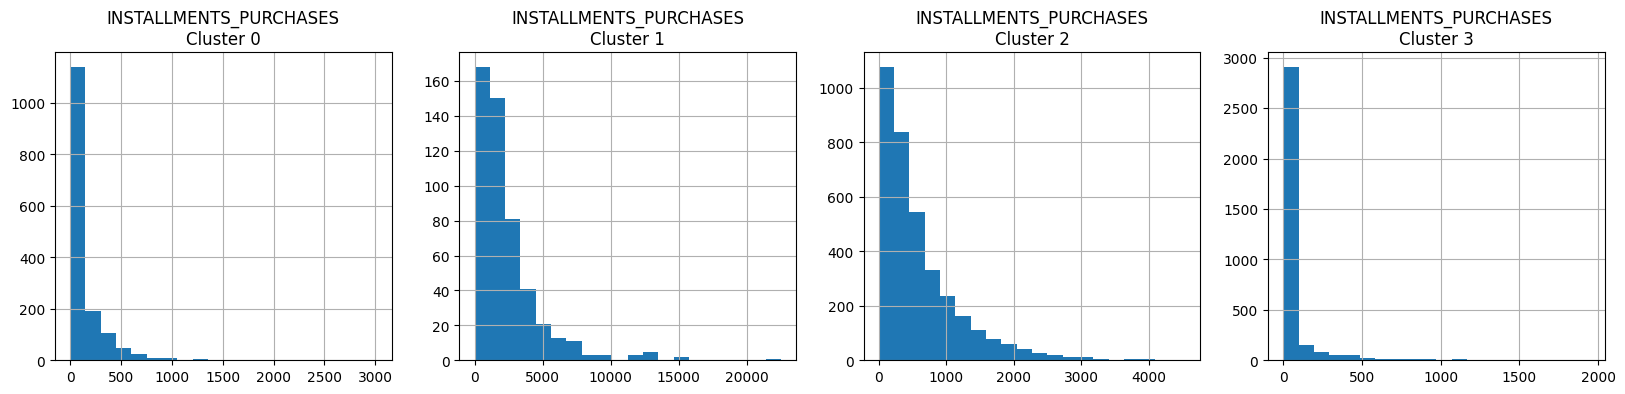

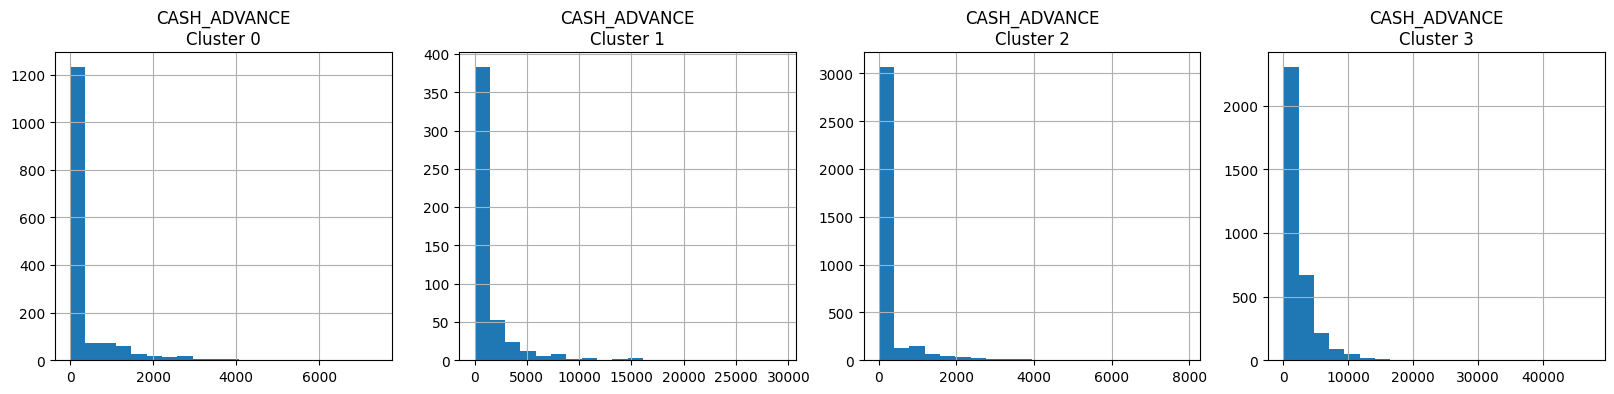

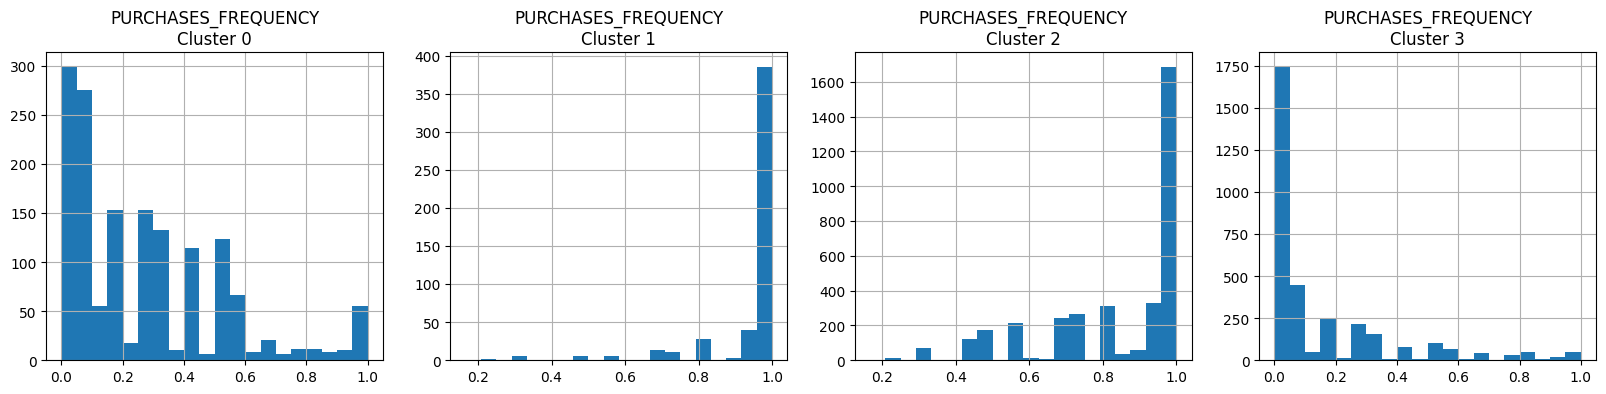

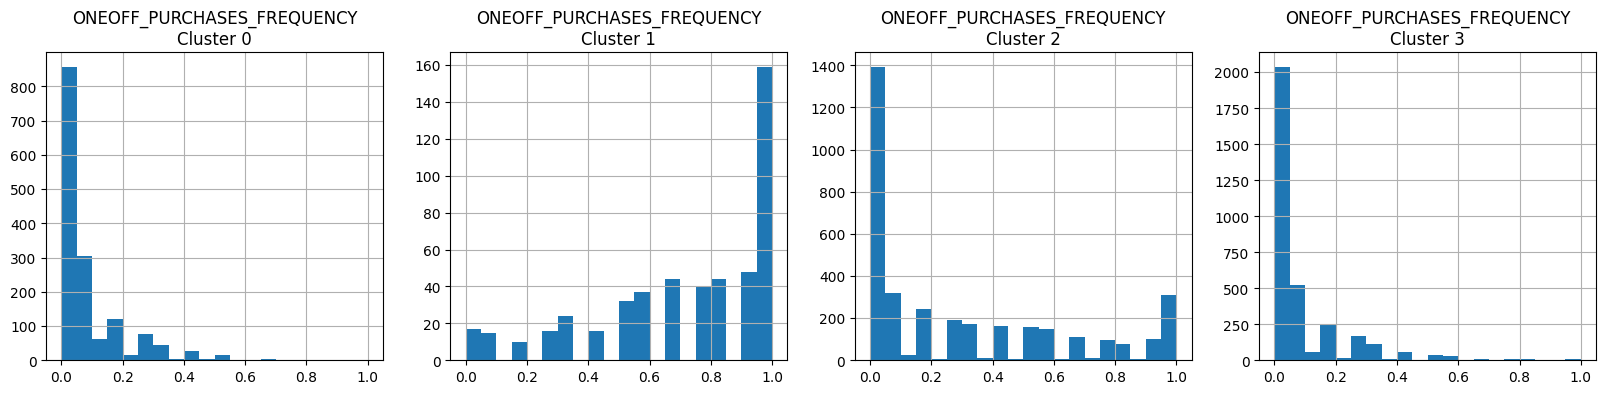

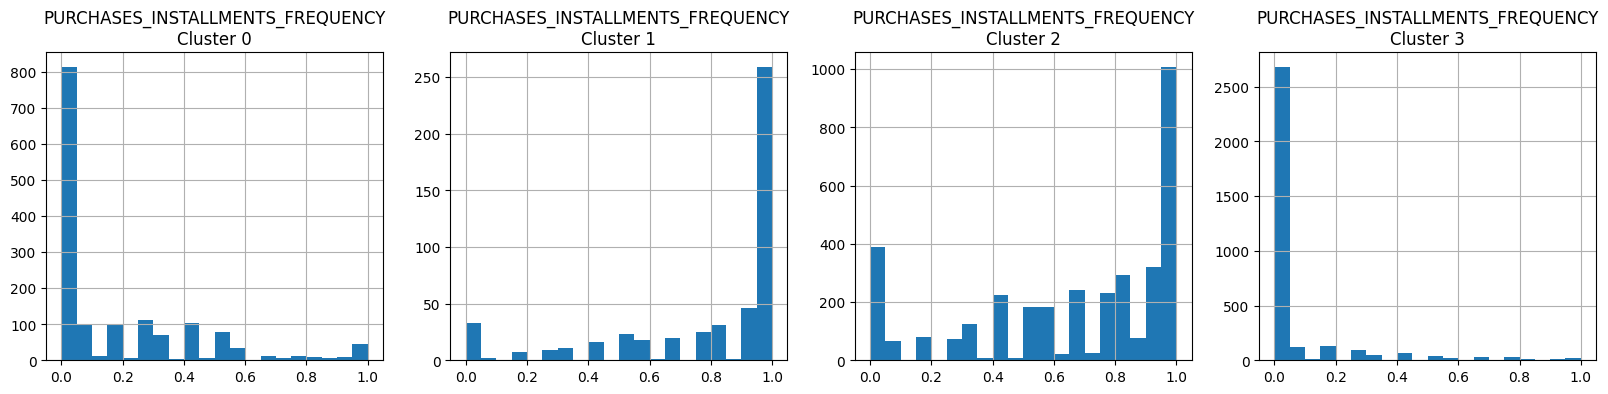

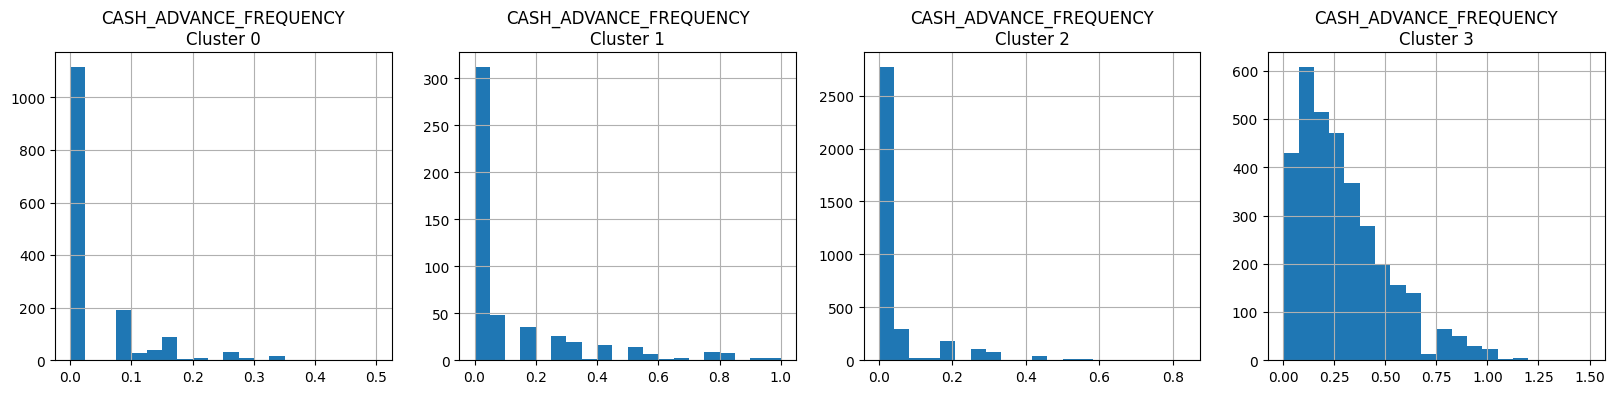

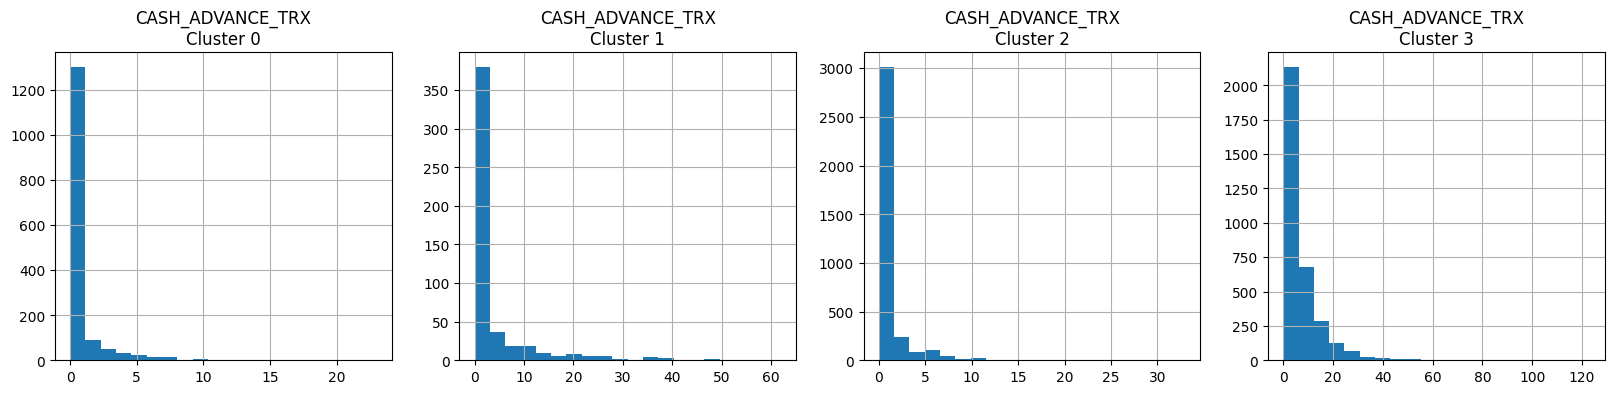

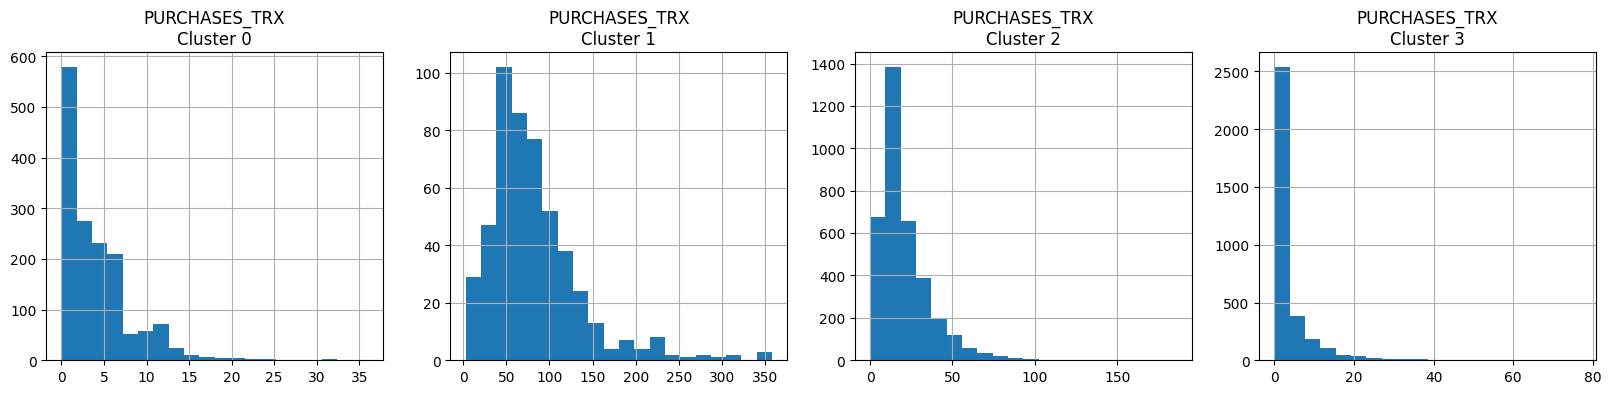

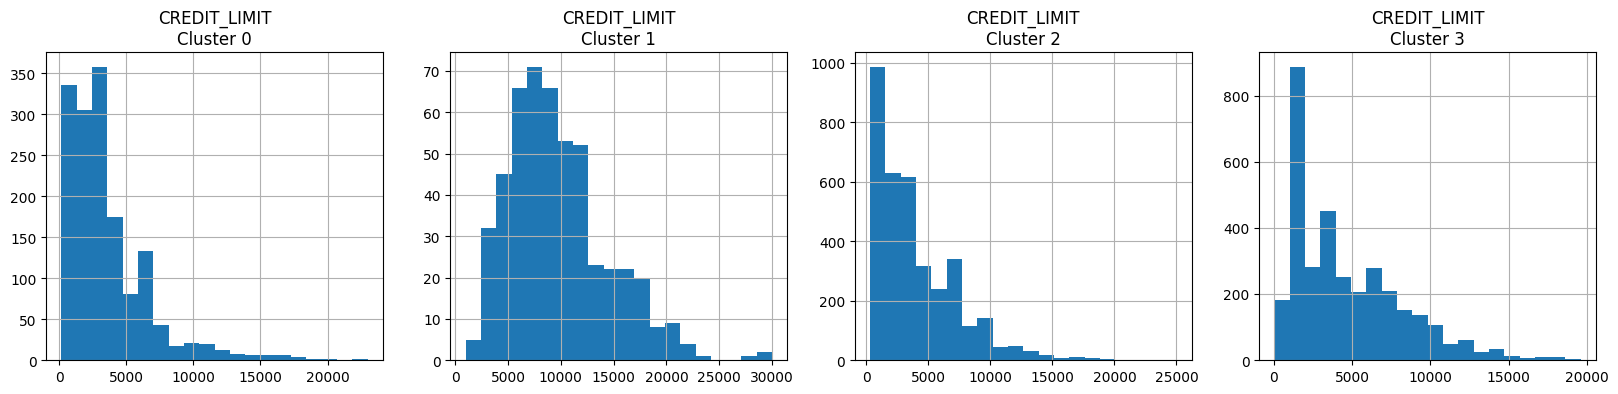

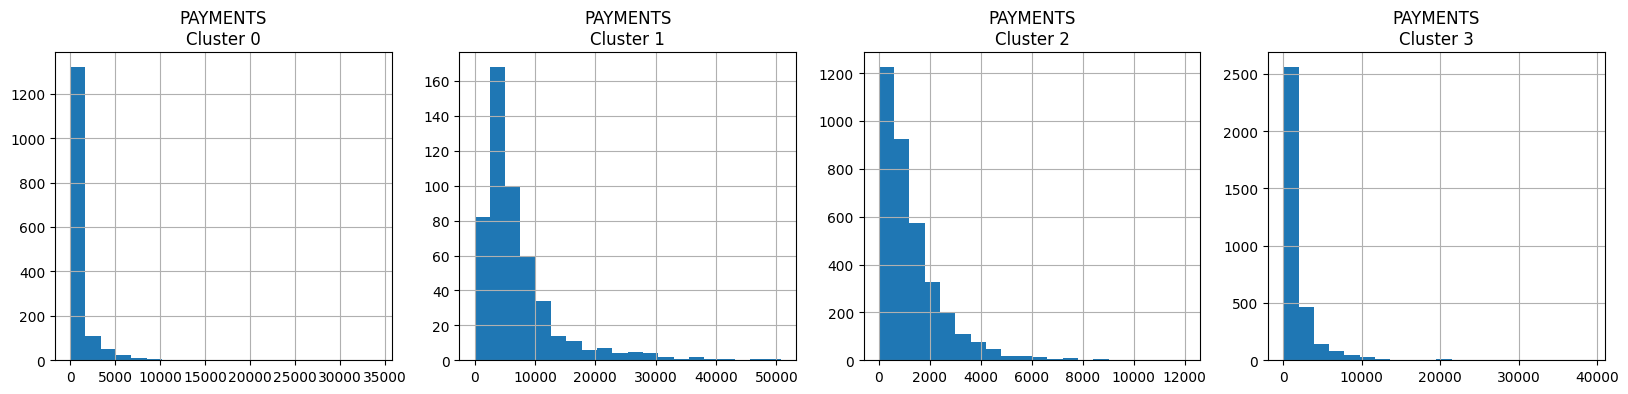

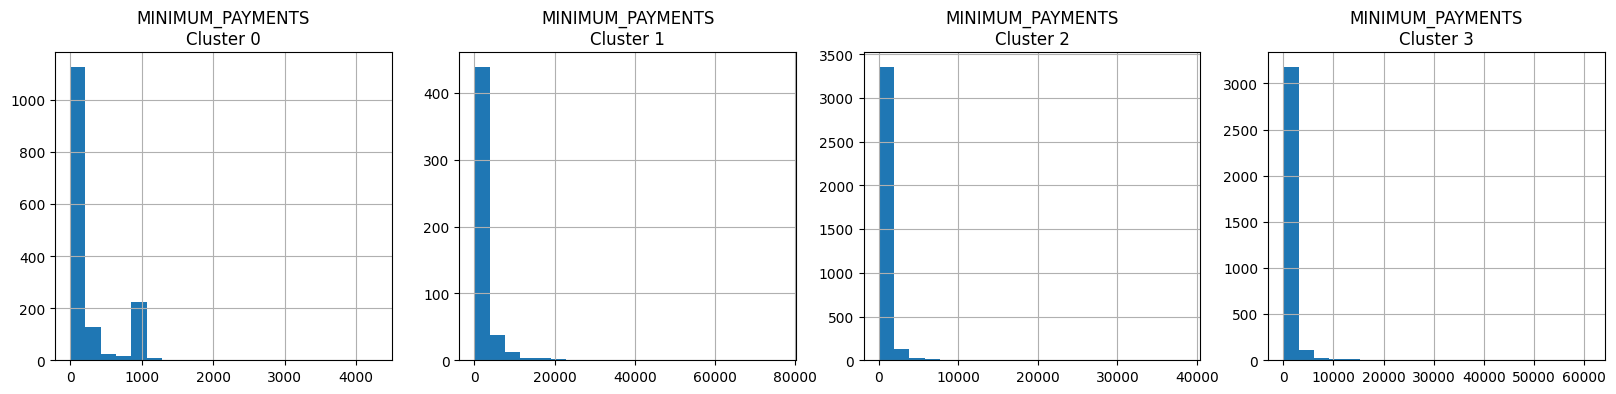

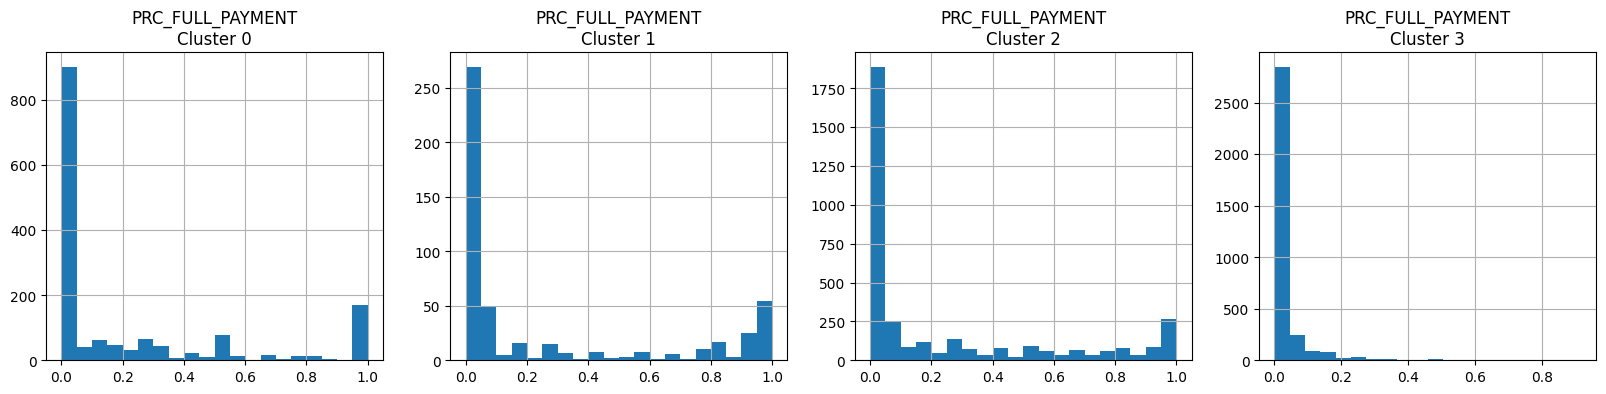

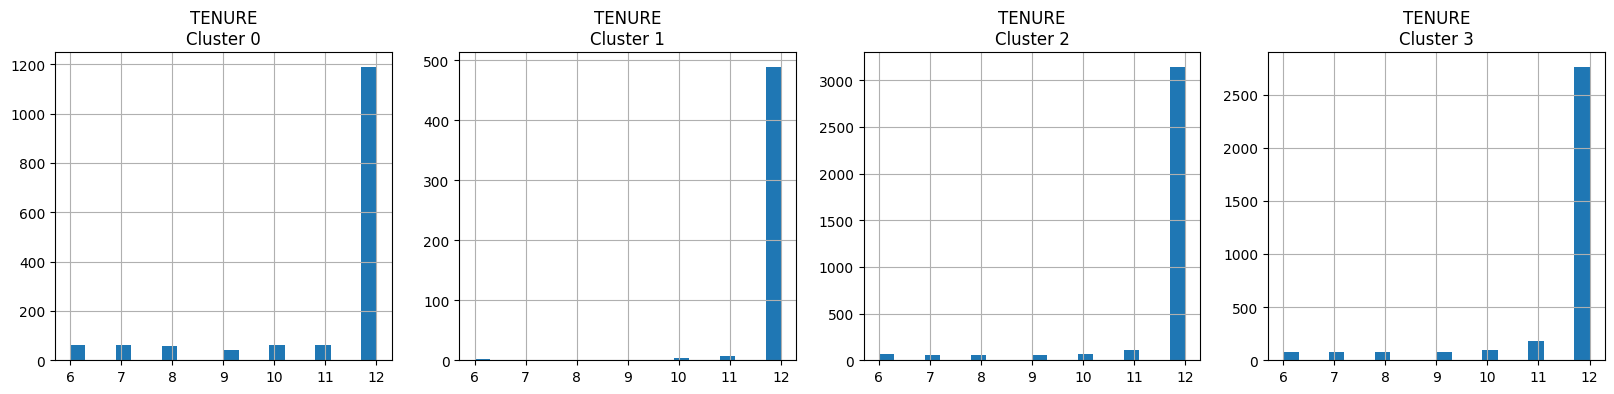

In [76]:
for i in credit_card_df.columns:
  plt.figure(figsize=(20, 4))
  for j in range(4):
    plt.subplot(1, 4, j+1)
    cluster = credit_card_df_cluster[credit_card_df_cluster['CLUSTER'] == j]
    cluster[i].hist(bins=20)
    plt.title('{}\nCluster {}'.format(i, j))

## Principal Component Analysis (PCA)

In [77]:
# PCA performs dimensionality reduction while attempting to retain as much original information as possible.
# PCA works by finding a new set of features, called principal components (e.g., PC1 and PC2),
# which are linear combinations of the original features. These components are uncorrelated
# and ranked by the amount of variance they capture from the original data. If all features are independent
# and there is no correlation between them, PCA has difficulty in reducing dimensions effectively.

pca = PCA(n_components=2)
principal_comp = pca.fit_transform(credit_card_df_scaled)
principal_comp

array([[-1.68222026, -1.07645061],
       [-1.1382949 ,  2.50647666],
       [ 0.96968401, -0.3835203 ],
       ...,
       [-0.92620364, -1.8107856 ],
       [-2.33655167, -0.65796601],
       [-0.55642216, -0.40046712]])

In [78]:
principal_comp_df = pd.DataFrame(data=principal_comp, columns=['PC1', 'PC2'])
principal_comp_df.head()

PC1       PC2
0 -1.682220 -1.076451
1 -1.138295  2.506477
2  0.969684 -0.383520
3 -0.873628  0.043166
4 -1.599434 -0.688581

In [79]:
principal_comp_df = pd.concat([principal_comp_df, pd.DataFrame({'CLUSTER': labels})], axis=1)
principal_comp_df.head()

PC1       PC2  CLUSTER
0 -1.682220 -1.076451        0
1 -1.138295  2.506477        3
2  0.969684 -0.383520        2
3 -0.873628  0.043166        0
4 -1.599434 -0.688581        3

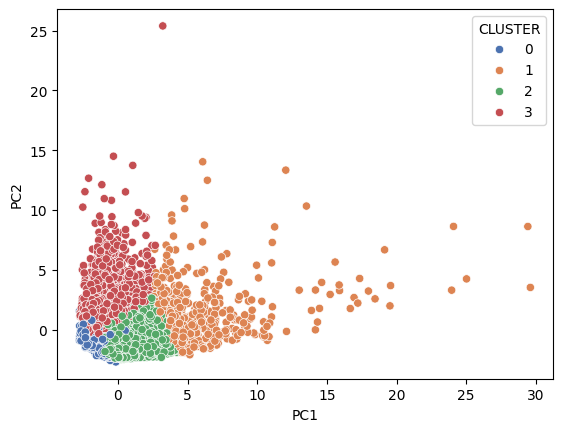

In [80]:
sns.scatterplot(x='PC1', y='PC2', hue='CLUSTER', data=principal_comp_df, palette='deep');

# This scatter plot visualizes the clusters in a two-dimensional space derived from
# Principal Component Analysis (PCA). Each point represents an observation,
# and the colors indicate the cluster assignments (Cluster 0, 1, 2, and 3).
# The x-axis (PC1) and y-axis (PC2) represent the first two principal components,
# which capture the maximum variance in the data,
# providing a simplified view of how the clusters are separated in the reduced-dimensional space.

## Dimensionality Reduction with Autoencoders

In [81]:
# Autoencoders are a type of neural network used for unsupervised learning,
# primarily for dimensionality reduction and data reconstruction.
# They consist of two parts: an encoder, which compresses input data into a smaller latent representation,
# and a decoder, which reconstructs the original data from this compressed representation.
# By minimizing the reconstruction error, autoencoders learn a compressed,
# efficient representation of the data while retaining its key features.

# Set the encoding dimension (number of features to reduce to in the bottleneck layer)
encoding_dim = 7
# Define the input layer with 17 features (dimensionality of input data)
input_df = Input(shape=(17,))
# A Dense layer, also known as a fully connected layer,
# connects every neuron in the current layer to every neuron in the next layer.
# First hidden layer: Reduce input to the encoding dimension with ReLU activation
x = Dense(encoding_dim, activation='relu')(input_df)
# Second hidden layer: 500 neurons, ReLU activation, and Glorot Uniform initializer
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
# Third hidden layer: Another 500 neurons with ReLU activation and Glorot Uniform initializer
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
# Fourth hidden layer: 2000 neurons with ReLU activation and Glorot Uniform initializer
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)
# Bottleneck layer (encoded representation): Reduce to 10 dimensions
encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)
# Fifth hidden layer: 2000 neurons to expand again after the bottleneck
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
# Sixth hidden layer: Reduce back to 500 neurons, ReLU activation
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
# Output layer: Reconstruct the original input with 17 neurons
decoded = Dense(17, kernel_initializer='glorot_uniform')(x)
# Define the autoencoder model (maps input to reconstructed output)
autoencoder = Model(input_df, decoded)
# Define the encoder model (used for dimensionality reduction; maps input to encoded representation)
encoder = Model(input_df, encoded)
# Compile the autoencoder model with Adam optimizer and mean squared error as the loss function
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# The autoencoder.fit function trains the autoencoder to reconstruct the input data (creditcard_df_scaled)
# by minimizing the reconstruction error. It uses batches of 128 samples, iterates over the entire dataset
# 25 times (epochs=25), and reports progress (verbose=1). During training,
# the model learns to compress the input into a latent representation and reconstruct it,
# optimizing weights to minimize the difference between the input and output using the mean_squared_error loss.

autoencoder.fit(credit_card_df_scaled, credit_card_df_scaled, batch_size=128, epochs=25, verbose=1)

Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.7773
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3617
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2663
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.2057
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1629
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1622
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1309
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1251
Epoch 9/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1073
Epoch 10/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0995
Epoch 11/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1025
Epoch 12/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0822
Epoch 13/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0832
Epoch 14/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0813
Epoch 15/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0717
Epoc

In [82]:
# Use the trained encoder to generate the compressed data representation
pred = encoder.predict(credit_card_df_scaled)
pred.shape # This will show the reduced dimensions after encoding

280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


(8950, 10)

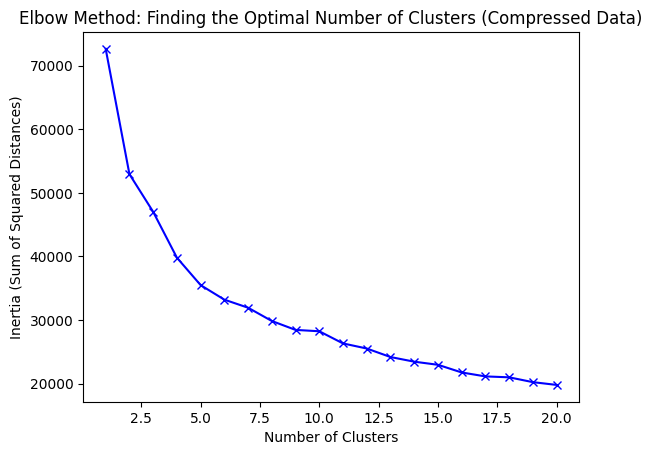

In [83]:
inertia_scores_2 = []
cluster_range = range(1, 21)
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(pred)
    inertia_scores_2.append(kmeans.inertia_)

plt.plot(cluster_range, inertia_scores_2, 'bx-')
plt.title('Elbow Method: Finding the Optimal Number of Clusters (Compressed Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)');

# The "elbow" point, where inertia starts to decrease more gradually, suggests the optimal number of clusters,
# which appears to be around 4 in this case.

/tmp/ipykernel_2743/3975100563.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(inertia_scores_1, 'bx-', color = 'r')
/tmp/ipykernel_2743/3975100563.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(inertia_scores_2, 'bx-', color = 'g')


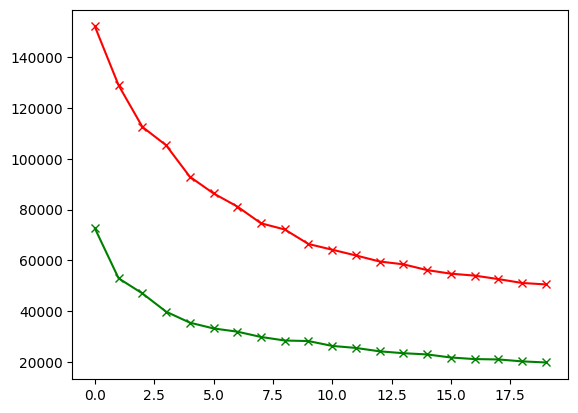

In [84]:
plt.plot(inertia_scores_1, 'bx-', color = 'r')
plt.plot(inertia_scores_2, 'bx-', color = 'g')

In [85]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_

In [86]:
kmeans.cluster_centers_.shape

(4, 10)

In [87]:
credit_card_df_cluster = pd.concat([credit_card_df, pd.DataFrame({'CLUSTER': labels})], axis=1)
credit_card_df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  CLUSTER  
0   201.802084        139.509787          0.000000      12        3  
1  4103.032597       1072.340217          0.222222      12        3  
2   622.066742        627.284787          0.000000      12        1  
3     0.000000        864.206542          0.000000      12        3  
4   678.334763        244.791237          0.000000      12        3

In [88]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(pred)
principal_comp

array([[-1.8930932 ,  0.10540168],
       [-0.15420318,  1.8962587 ],
       [ 0.24238825, -0.5855009 ],
       ...,
       [-0.94988036, -1.2703332 ],
       [-1.4081815 , -0.2612254 ],
       [ 0.5962908 , -0.9816071 ]], dtype=float32)

In [89]:
principal_comp_df = pd.DataFrame(data=principal_comp, columns=['PC1', 'PC2'])
principal_comp_df.head()

PC1       PC2
0 -1.893093  0.105402
1 -0.154203  1.896259
2  0.242388 -0.585501
3 -0.824492  0.474548
4 -1.903880  0.028431

In [90]:
principal_comp_df = pd.concat([principal_comp_df, pd.DataFrame({'CLUSTER': labels})], axis=1)
principal_comp_df.head()

PC1       PC2  CLUSTER
0 -1.893093  0.105402        3
1 -0.154203  1.896259        3
2  0.242388 -0.585501        1
3 -0.824492  0.474548        3
4 -1.903880  0.028431        3

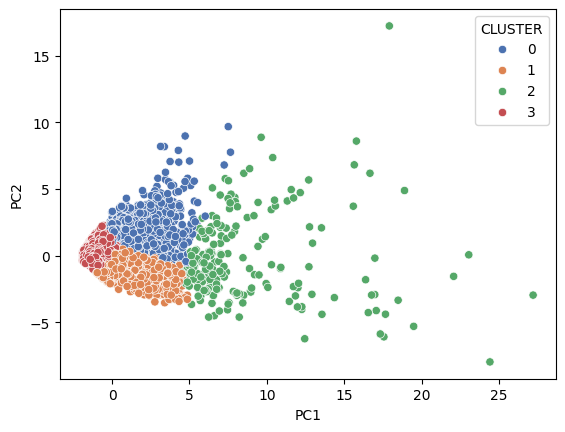

In [91]:
sns.scatterplot(x='PC1', y='PC2', hue='CLUSTER', data=principal_comp_df, palette='deep');

# This scatter plot visualizes clusters in the reduced dimensionality space using Principal Component 1 (PC1)
# and Principal Component 2 (PC2). The points are color-coded by cluster (0, 1, 2, 3),
# showing distinct groupings, with some overlap and separation. The green cluster appears more dispersed,
# while others are relatively compact.

# Sales Department: Daily Sales Forecasting

## Business Problem Overview

The sales team has collected data from 1115 stores and aims to use predictive modeling to forecast future daily sales.

## Data Loading and Preprocessing

In [92]:
sales_df = pd.read_csv('../data/raw/sales_department_part_1.csv')
sales_df.head()

/tmp/ipykernel_2743/1752320030.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_df = pd.read_csv('../data/raw/sales_department_part_1.csv')


Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [93]:
sales_df.tail(10)

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
1017199   1106          2  2013-01-01      0          0     0      0   
1017200   1107          2  2013-01-01      0          0     0      0   
1017201   1108          2  2013-01-01      0          0     0      0   
1017202   1109          2  2013-01-01      0          0     0      0   
1017203   1110          2  2013-01-01      0          0     0      0   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
1017199            a              1  
1017200            a              1  
1017201            a              1  
1017202            a              1  
1017203            a              1  
1017204            a              1  
1017205            a              1  
1017206            a              1  
1017207            a              1  
1017208            a              1

In [94]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [95]:
sales_df.describe()

Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  
count  1.017209e+06   1.017209e+06  
mean   3.815145e-01   1.786467e-01  
std    4.857586e-01   3.830564e-01  
min    0.000000e+00   0.000000e+00  
25%    0.000000e+00   0.000000e+00  
50%    0.000000e+00   0.000000e+00  
75%    1.000000e+00   0.000000e+00  
max    1.000000e+00   1.000000e+00

In [96]:
store_df = pd.read_csv('../data/raw/sales_department_part_2.csv')
store_df.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [97]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [98]:
store_df.describe()

Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           717.500000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6882.500000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count                761.000000  1115.000000       571.000000       571.000000  
mean                2008.668857     0.512108        23.595447      2011.763573  
std                    6.195983     0.500078        14.141984         1.674935  
min                 1900.000000     0.000000         1.000000      2009.000000  
25%                 2006.000000     0.000000        13.000000      2011.000000  
50%                 2010.000000     1.000000        22.000000      2012.000000  
75%                 2013.000000     1.000000        37.000000      2013.000000  
max                 2015.000000     1.000000        50.000000      2015.000000

## Dataset Exploration and Visualization

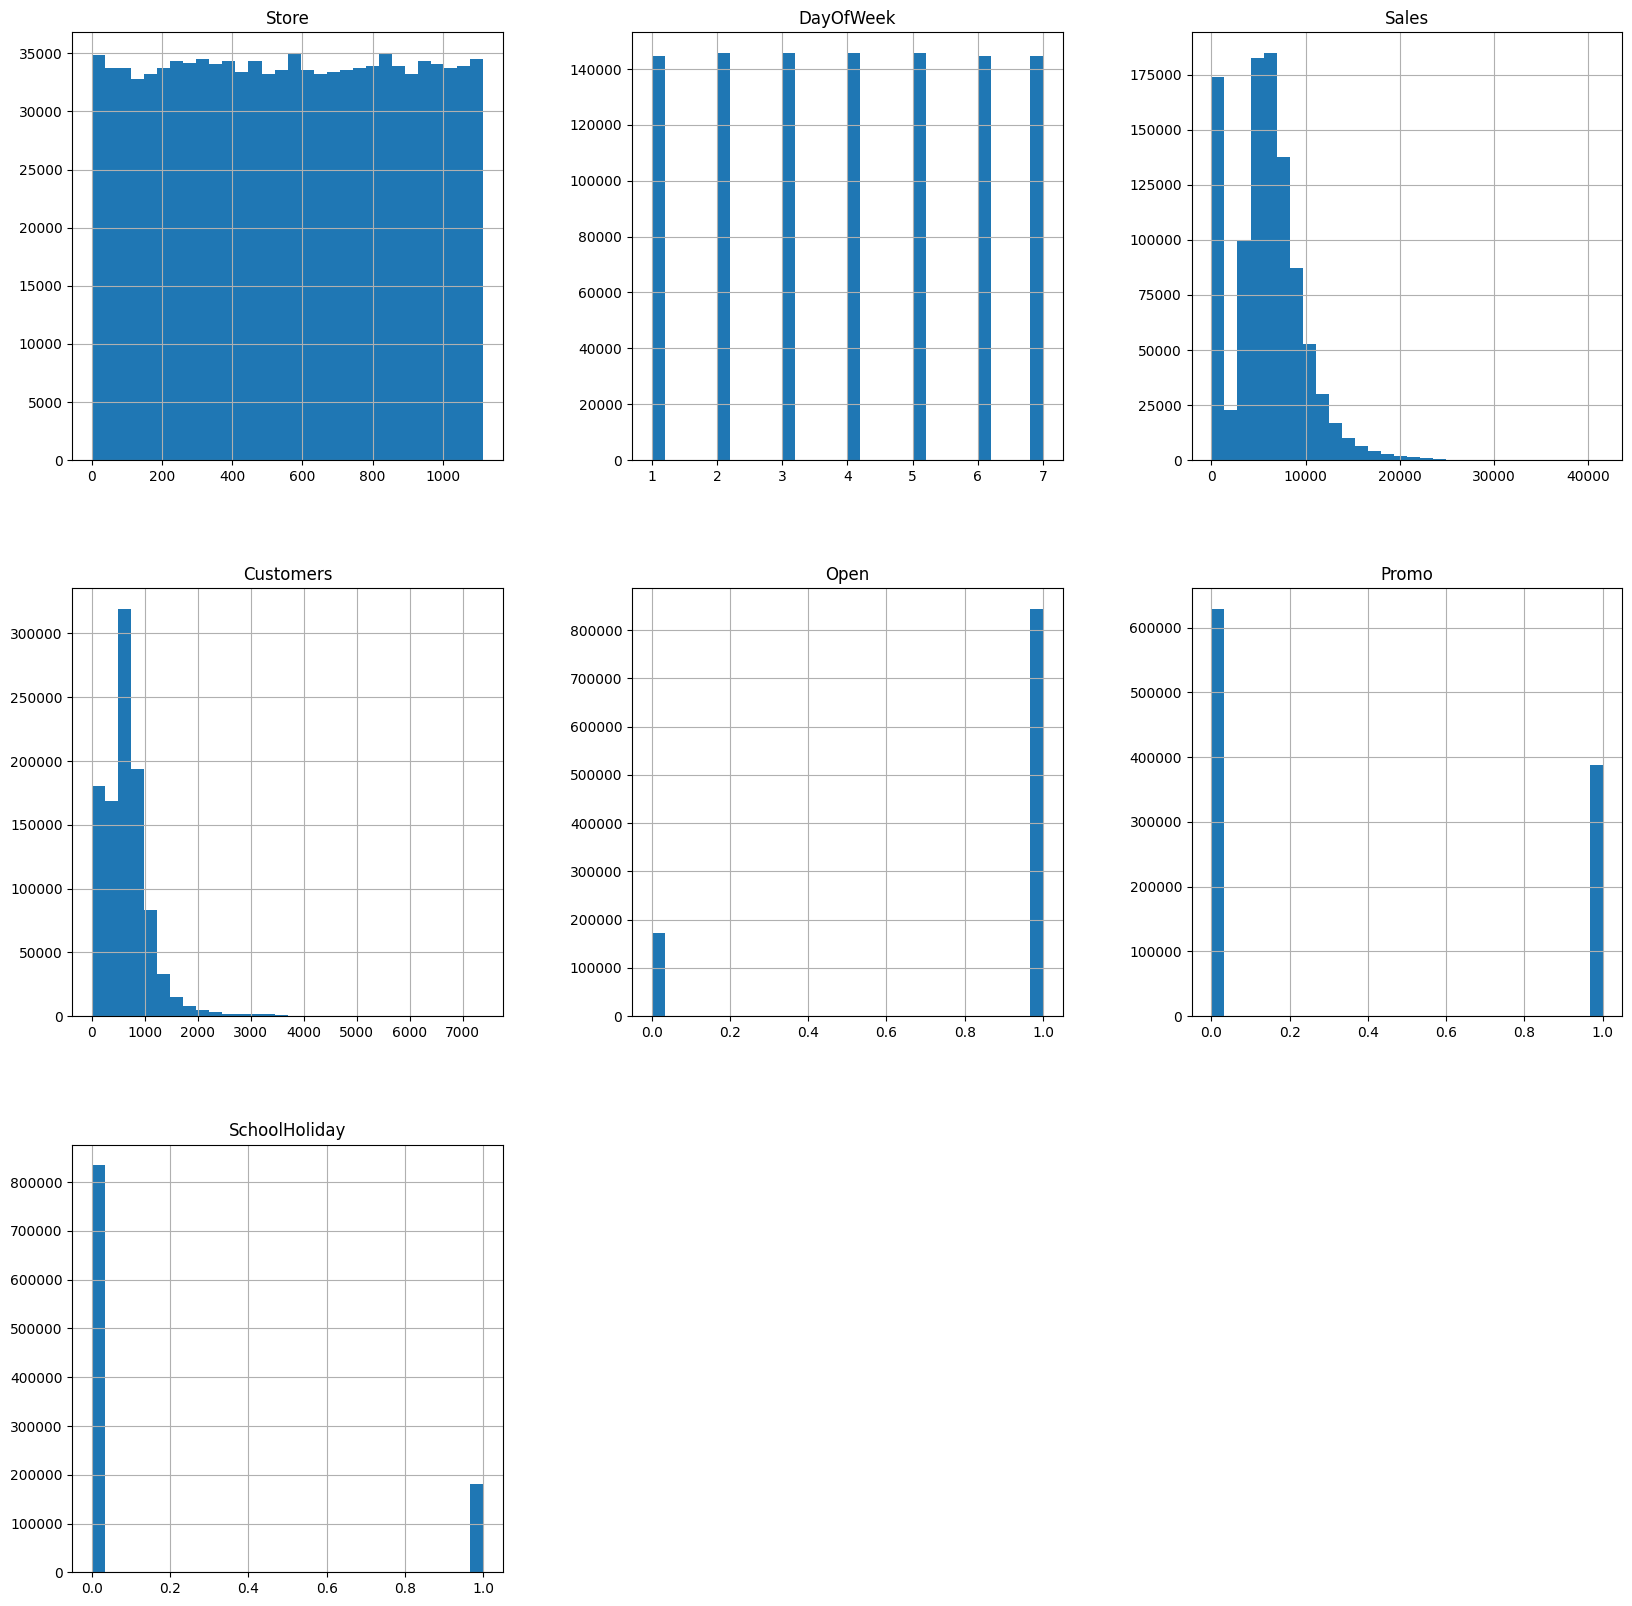

In [99]:
sales_df.hist(bins=30, figsize=(20,20));

In [100]:
sales_df['Customers'].max() # max number of customers per day

7388

In [101]:
closed_stores_df = sales_df[sales_df['Open'] == 0]
open_stores_df = sales_df[sales_df['Open'] == 1]
print('Total =', len(sales_df))
print('Number of closed stores =', len(closed_stores_df))
print('Number of open stores =', len(open_stores_df))

Total = 1017209
Number of closed stores = 172817
Number of open stores = 844392


In [102]:
# Retain only the stores that are currently open and remove all closed stores.

sales_df = sales_df[sales_df['Open'] == 1]
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844392 entries, 0 to 1017190
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844392 non-null  int64 
 1   DayOfWeek      844392 non-null  int64 
 2   Date           844392 non-null  object
 3   Sales          844392 non-null  int64 
 4   Customers      844392 non-null  int64 
 5   Open           844392 non-null  int64 
 6   Promo          844392 non-null  int64 
 7   StateHoliday   844392 non-null  object
 8   SchoolHoliday  844392 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 64.4+ MB


In [103]:
# Let's remove the "open" column since it is no longer significant.

sales_df.drop(['Open'], axis=1, inplace=True)
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844392 entries, 0 to 1017190
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844392 non-null  int64 
 1   DayOfWeek      844392 non-null  int64 
 2   Date           844392 non-null  object
 3   Sales          844392 non-null  int64 
 4   Customers      844392 non-null  int64 
 5   Promo          844392 non-null  int64 
 6   StateHoliday   844392 non-null  object
 7   SchoolHoliday  844392 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 58.0+ MB


In [104]:
sales_df.describe()

Store      DayOfWeek          Sales      Customers  \
count  844392.000000  844392.000000  844392.000000  844392.000000   
mean      558.422920       3.520361    6955.514291     762.728395   
std       321.731914       1.723689    3104.214680     401.227674   
min         1.000000       1.000000       0.000000       0.000000   
25%       280.000000       2.000000    4859.000000     519.000000   
50%       558.000000       3.000000    6369.000000     676.000000   
75%       837.000000       5.000000    8360.000000     893.000000   
max      1115.000000       7.000000   41551.000000    7388.000000   

               Promo  SchoolHoliday  
count  844392.000000  844392.000000  
mean        0.446352       0.193580  
std         0.497114       0.395103  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         1.000000       0.000000  
max         1.000000       1.000000

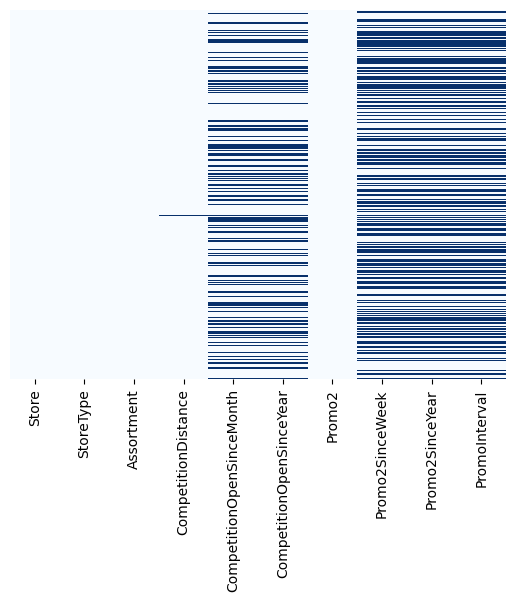

In [105]:
sns.heatmap(store_df.isnull(), yticklabels=False, cbar=False, cmap='Blues');

In [106]:
store_df[store_df['CompetitionDistance'].isnull()]

Store StoreType Assortment  CompetitionDistance  \
290    291         d          a                  NaN   
621    622         a          c                  NaN   
878    879         d          a                  NaN   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
290                        NaN                       NaN       0   
621                        NaN                       NaN       0   
878                        NaN                       NaN       1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
290              NaN              NaN              NaN  
621              NaN              NaN              NaN  
878              5.0           2013.0  Feb,May,Aug,Nov

In [107]:
store_df[store_df['CompetitionOpenSinceMonth'].isnull()]

Store StoreType Assortment  CompetitionDistance  \
11       12         a          c               1070.0   
12       13         d          a                310.0   
15       16         a          c               3270.0   
18       19         a          c               3240.0   
21       22         a          a               1040.0   
...     ...       ...        ...                  ...   
1095   1096         a          c               1130.0   
1099   1100         a          a                540.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
11                          NaN                       NaN       1   
12                          NaN                       NaN       1   
15                          NaN                       NaN       0   
18                          NaN                       NaN       1   
21                          NaN                       NaN       1   
...                         ...                       ...     ...   
1095                        NaN                       NaN       1   
1099                        NaN                       NaN       1   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
11               13.0           2010.0   Jan,Apr,Jul,Oct  
12               45.0           2009.0   Feb,May,Aug,Nov  
15                NaN              NaN               NaN  
18               22.0           2011.0  Mar,Jun,Sept,Dec  
21               22.0           2012.0   Jan,Apr,Jul,Oct  
...               ...              ...               ...  
1095             10.0           2014.0  Mar,Jun,Sept,Dec  
1099             14.0           2011.0   Jan,Apr,Jul,Oct  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec  

[354 rows x 10 columns]

In [108]:
store_df[store_df['CompetitionOpenSinceYear'].isnull()]

Store StoreType Assortment  CompetitionDistance  \
11       12         a          c               1070.0   
12       13         d          a                310.0   
15       16         a          c               3270.0   
18       19         a          c               3240.0   
21       22         a          a               1040.0   
...     ...       ...        ...                  ...   
1095   1096         a          c               1130.0   
1099   1100         a          a                540.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
11                          NaN                       NaN       1   
12                          NaN                       NaN       1   
15                          NaN                       NaN       0   
18                          NaN                       NaN       1   
21                          NaN                       NaN       1   
...                         ...                       ...     ...   
1095                        NaN                       NaN       1   
1099                        NaN                       NaN       1   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
11               13.0           2010.0   Jan,Apr,Jul,Oct  
12               45.0           2009.0   Feb,May,Aug,Nov  
15                NaN              NaN               NaN  
18               22.0           2011.0  Mar,Jun,Sept,Dec  
21               22.0           2012.0   Jan,Apr,Jul,Oct  
...               ...              ...               ...  
1095             10.0           2014.0  Mar,Jun,Sept,Dec  
1099             14.0           2011.0   Jan,Apr,Jul,Oct  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec  

[354 rows x 10 columns]

In [109]:
store_df[store_df['Promo2'] == 0]

# When 'promo2' is zero, the values for 'promo2SinceWeek',
# 'Promo2SinceYear', and 'PromoInterval' are also set to zero.

Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
5         6         a          a                310.0   
6         7         a          c              24000.0   
...     ...       ...        ...                  ...   
1107   1108         a          a                540.0   
1109   1110         c          c                900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
3                           9.0                    2009.0       0   
4                           4.0                    2015.0       0   
5                          12.0                    2013.0       0   
6                           4.0                    2013.0       0   
...                         ...                       ...     ...   
1107                        4.0                    2004.0       0   
1109                        9.0                    2010.0       0   
1111                        4.0                    2006.0       0   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   

      Promo2SinceWeek  Promo2SinceYear PromoInterval  
0                 NaN              NaN           NaN  
3                 NaN              NaN           NaN  
4                 NaN              NaN           NaN  
5                 NaN              NaN           NaN  
6                 NaN              NaN           NaN  
...               ...              ...           ...  
1107              NaN              NaN           NaN  
1109              NaN              NaN           NaN  
1111              NaN              NaN           NaN  
1112              NaN              NaN           NaN  
1113              NaN              NaN           NaN  

[544 rows x 10 columns]

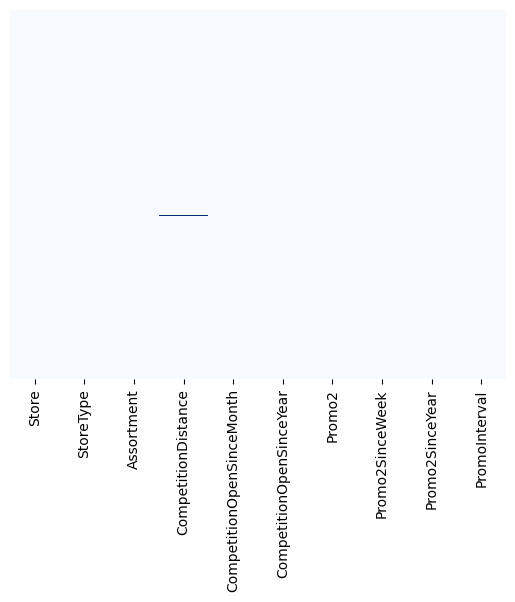

In [110]:
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
            'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']
for str_col in str_cols:
    store_df[str_col].fillna(0, inplace=True)
sns.heatmap(store_df.isnull(), yticklabels=False, cbar=False, cmap='Blues');

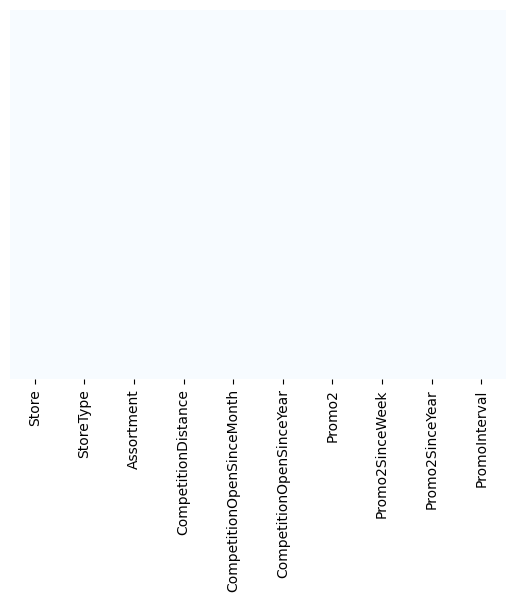

In [111]:
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(), inplace=True)
sns.heatmap(store_df.isnull(), yticklabels=False, cbar=False, cmap='Blues');

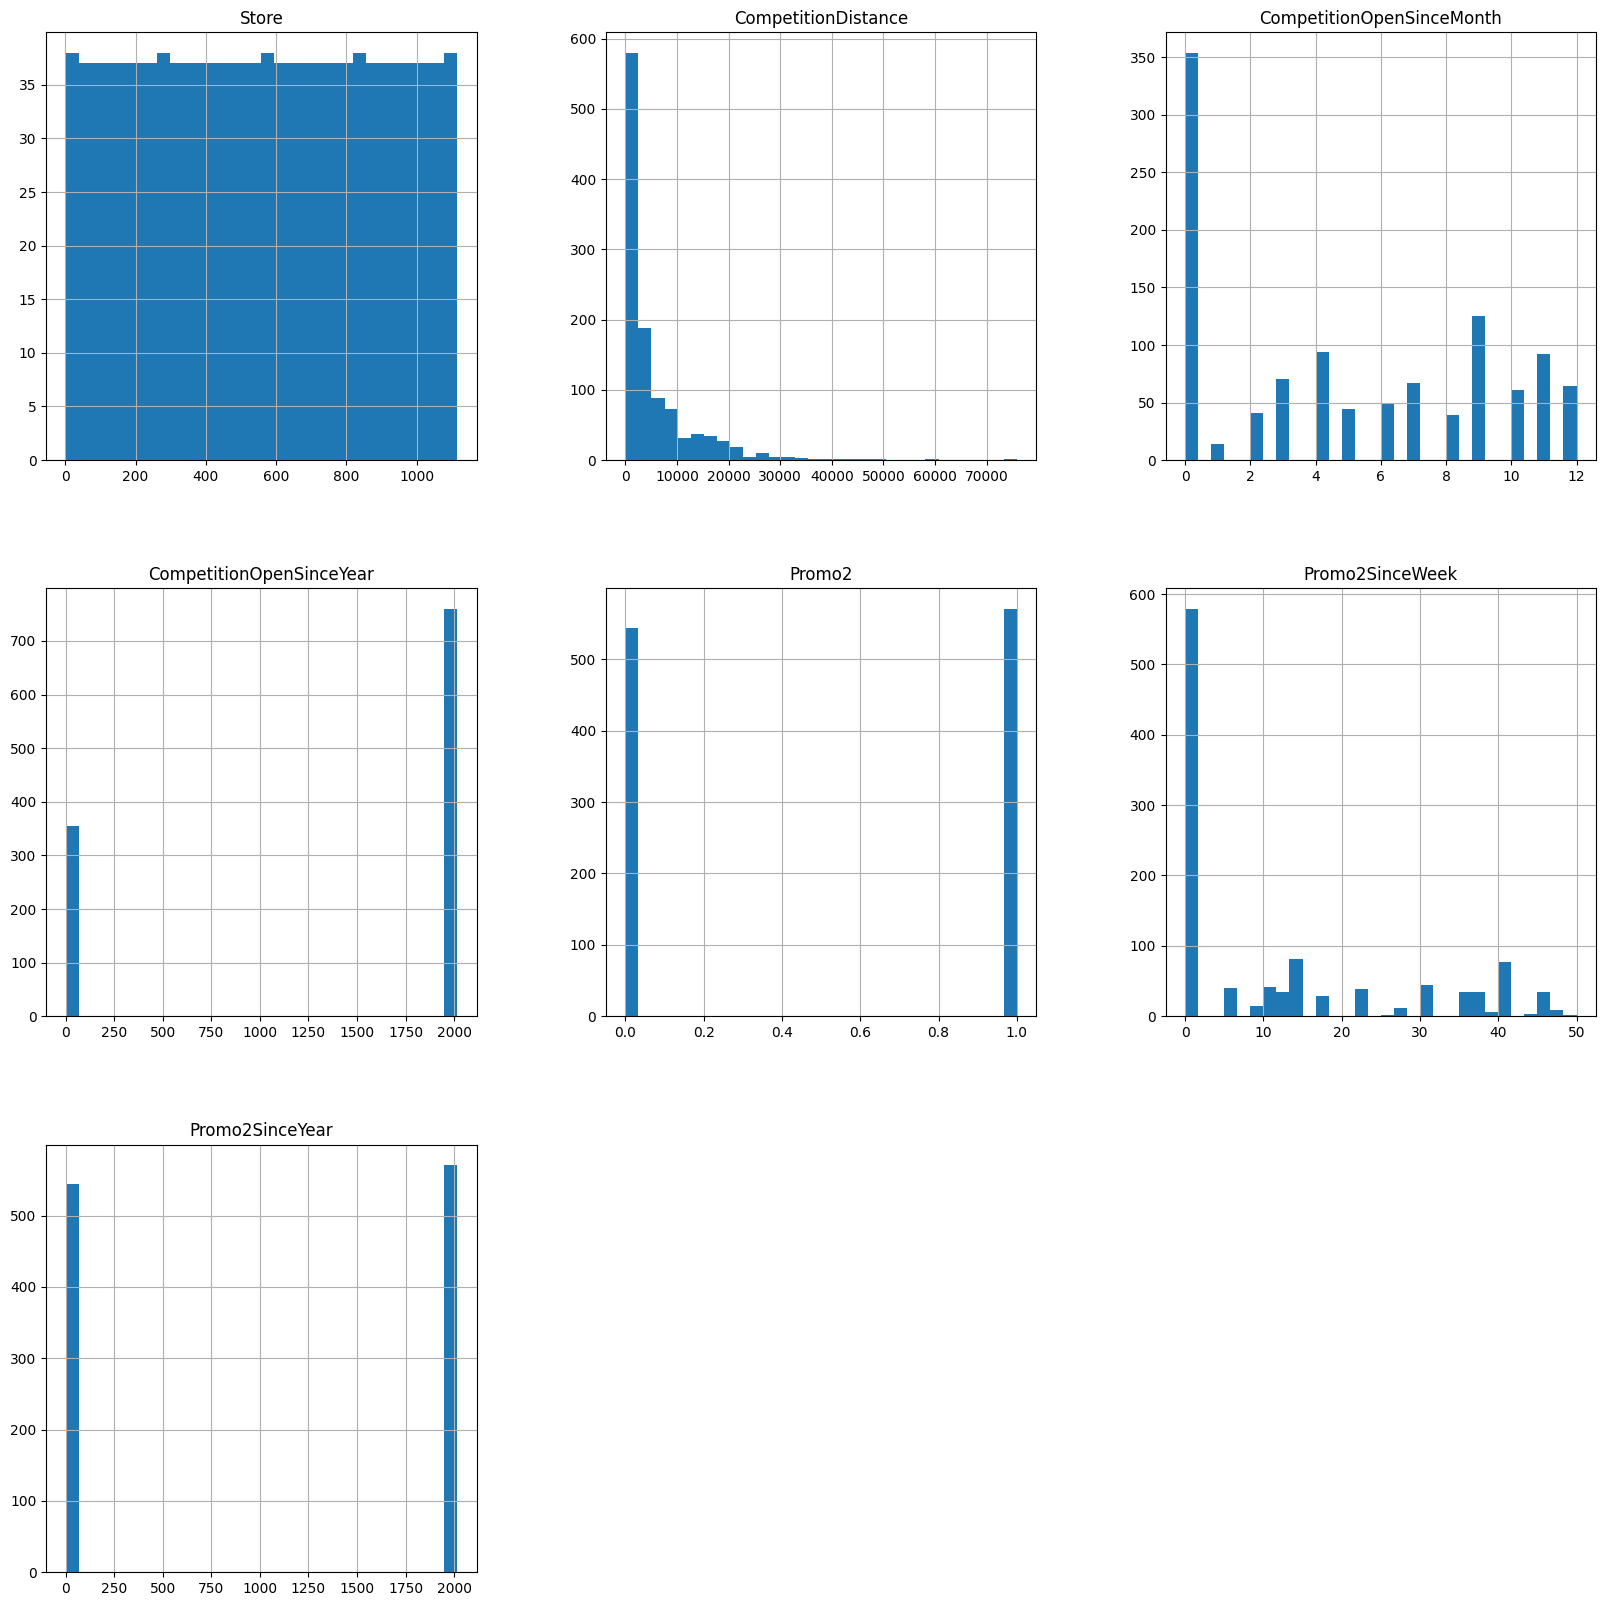

In [112]:
store_df.hist(bins=30, figsize=(20,20));

In [113]:
sales_department_df = pd.merge(sales_df, store_df, how='inner', on='Store')
sales_department_df.head()

Store  DayOfWeek        Date  Sales  Customers  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555      1            0   
1      1          4  2015-07-30   5020        546      1            0   
2      1          3  2015-07-29   4782        523      1            0   
3      1          2  2015-07-28   5011        560      1            0   
4      1          1  2015-07-27   6102        612      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         c          a               1270.0   
2              1         c          a               1270.0   
3              1         c          a               1270.0   
4              1         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2                        9.0                    2008.0       0   
3                        9.0                    2008.0       0   
4                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  
0              0.0              0.0             0  
1              0.0              0.0             0  
2              0.0              0.0             0  
3              0.0              0.0             0  
4              0.0              0.0             0

In [114]:
sales_department_df.to_csv('../data/processed/sales_department_processed.csv', index=False)

In [115]:
numeric_df = sales_department_df.select_dtypes(include=['number'])
correlations = numeric_df.corr()['Sales'].sort_values()
print(correlations)

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64


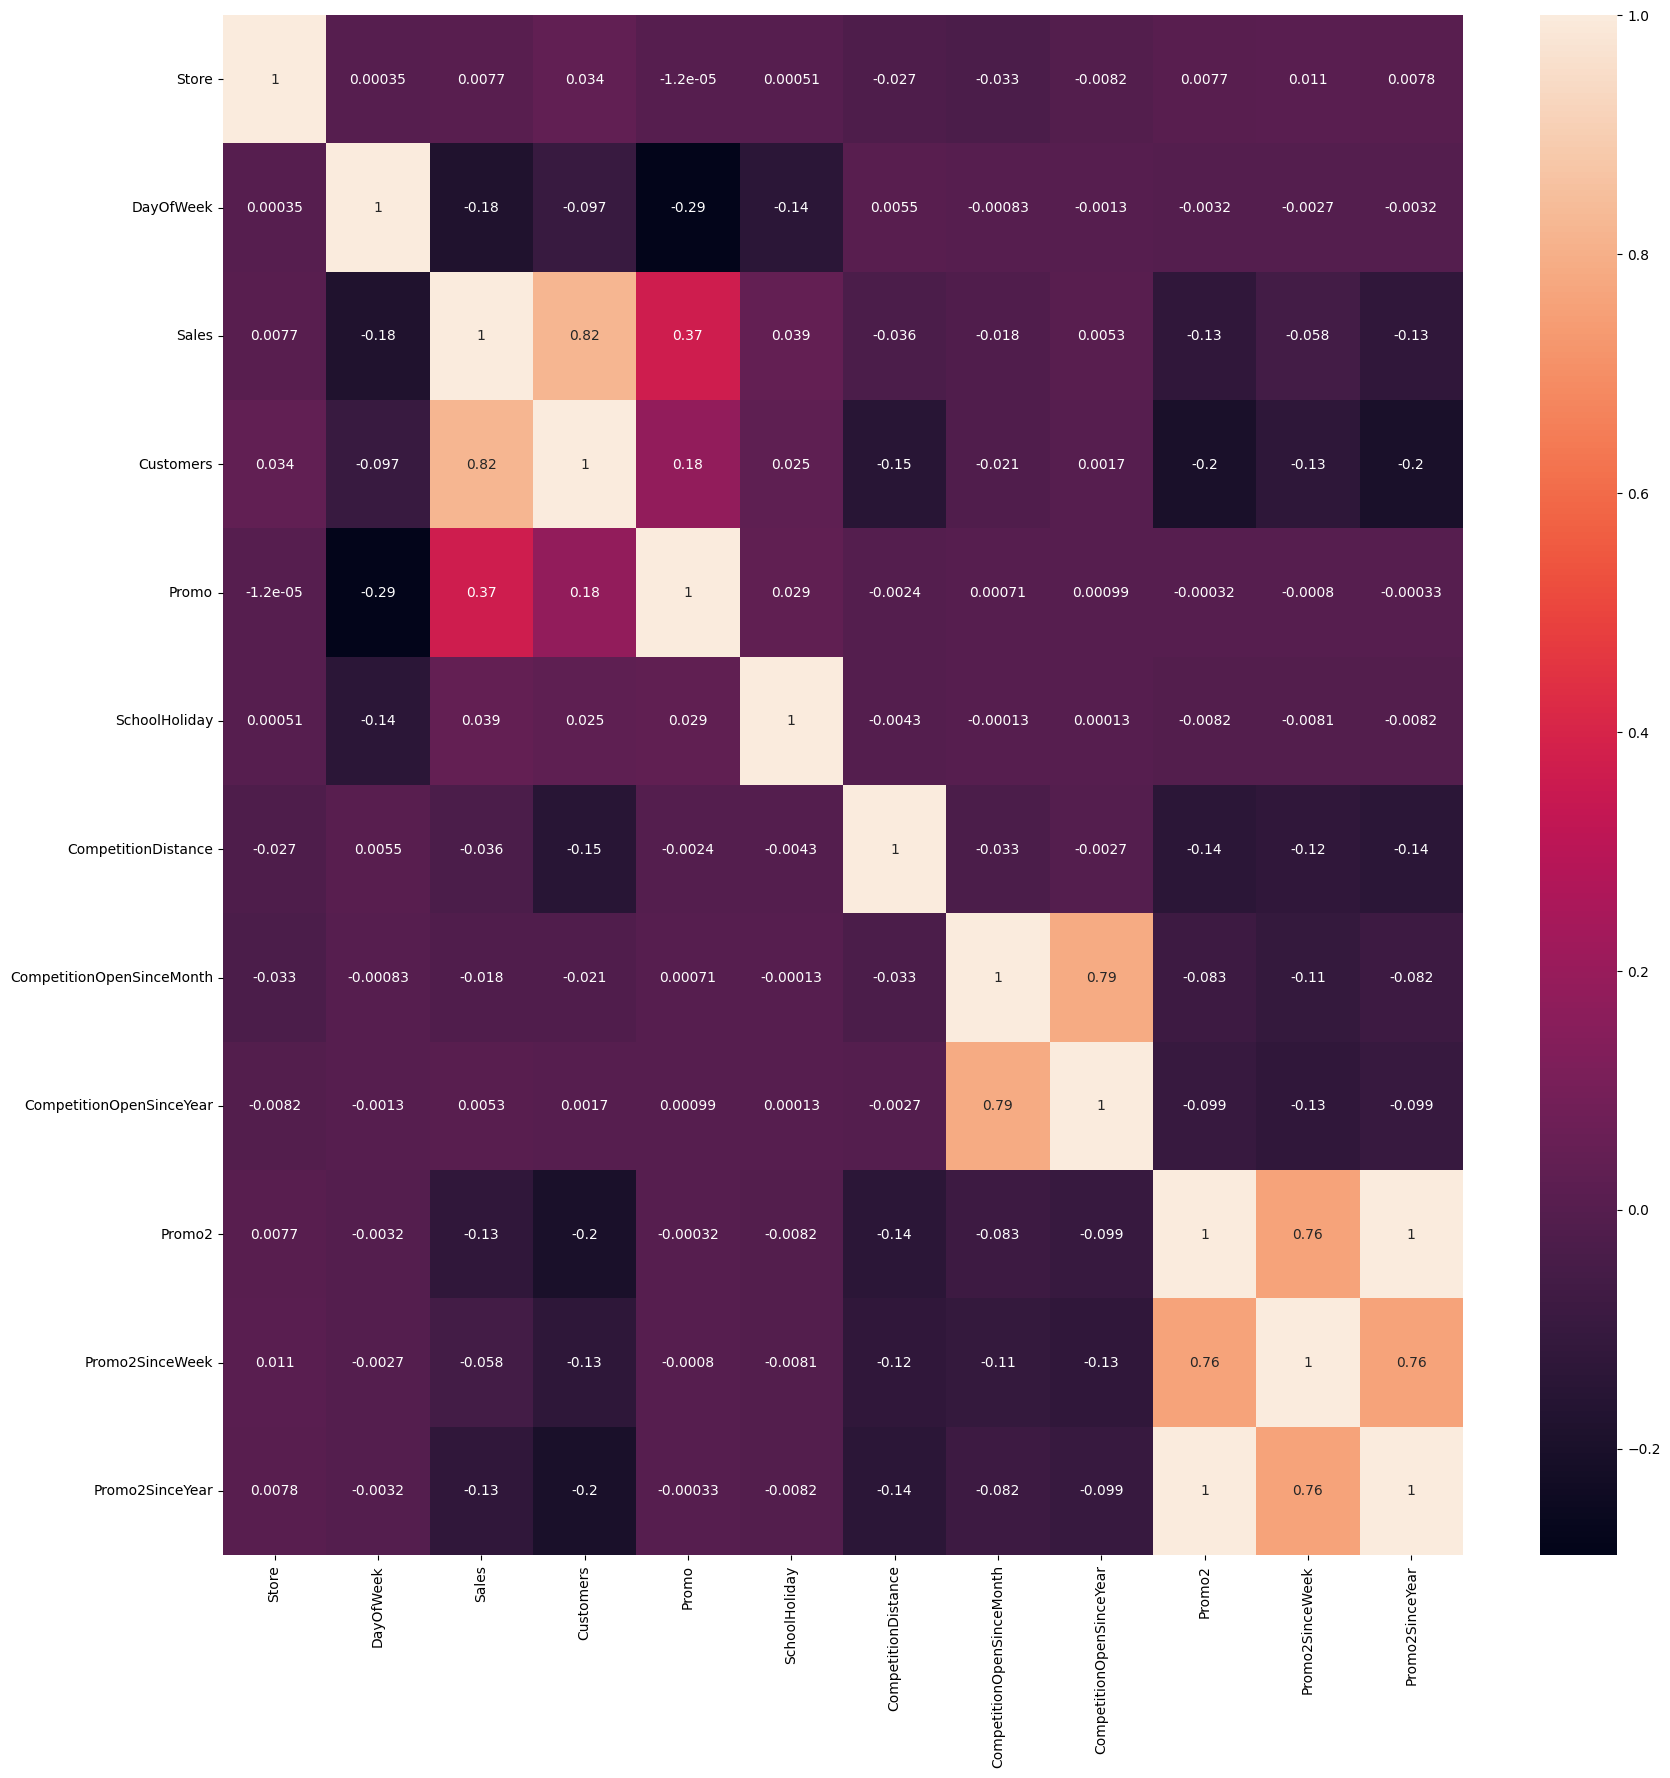

In [116]:
correlations = numeric_df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

# Strong positive correlations:
# Sales and Customers (0.823): More customers typically lead to higher sales.
# CompetitionOpenSinceMonth and CompetitionOpenSinceYear (0.785): These variables, related to competition timing, are highly correlated.
# Promo2 and Promo2SinceYear (0.999): Promo2 is closely tied to the year it started.
# Weak correlations:
# Most other pairs, such as Store with any other variable, exhibit weak or negligible correlations (near 0), suggesting limited direct relationships.
# Negative correlations:
# Sales and DayOfWeek (-0.178): Sales may decrease on certain days.
# Customers and Promo2 (-0.202): Promotions may not directly result in more customers.

In [117]:
# Let's separate the year, month, and day and place them in a different column.

sales_department_df['Year'] = pd.DatetimeIndex(sales_department_df['Date']).year
sales_department_df['Month'] = pd.DatetimeIndex(sales_department_df['Date']).month
sales_department_df['Day'] = pd.DatetimeIndex(sales_department_df['Date']).day
sales_department_df.head()

Store  DayOfWeek        Date  Sales  Customers  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555      1            0   
1      1          4  2015-07-30   5020        546      1            0   
2      1          3  2015-07-29   4782        523      1            0   
3      1          2  2015-07-28   5011        560      1            0   
4      1          1  2015-07-27   6102        612      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         c          a               1270.0   
2              1         c          a               1270.0   
3              1         c          a               1270.0   
4              1         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2                        9.0                    2008.0       0   
3                        9.0                    2008.0       0   
4                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  Year  Month  Day  
0              0.0              0.0             0  2015      7   31  
1              0.0              0.0             0  2015      7   30  
2              0.0              0.0             0  2015      7   29  
3              0.0              0.0             0  2015      7   28  
4              0.0              0.0             0  2015      7   27

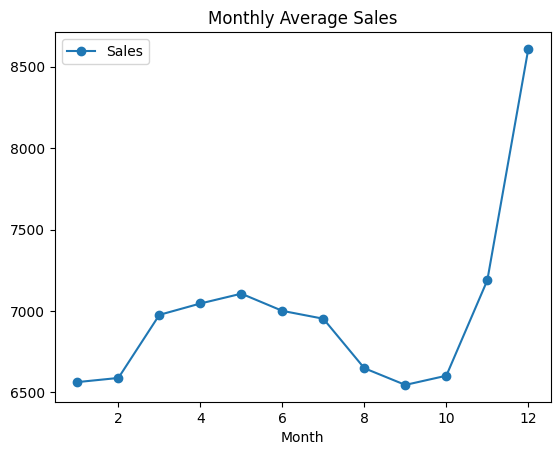

In [118]:
axis = sales_department_df.groupby('Month')[['Sales']].mean().plot(marker = 'o')
axis.set_title('Monthly Average Sales');

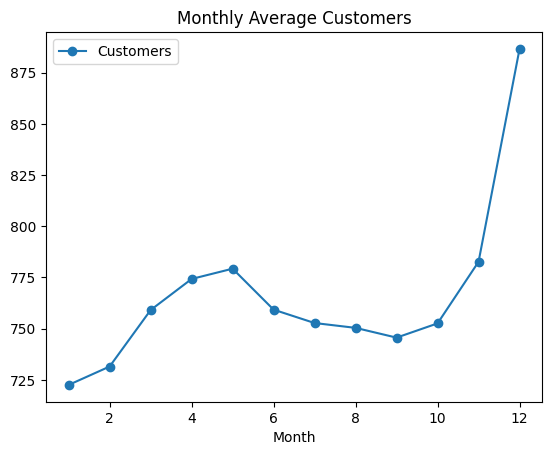

In [119]:
axis = sales_department_df.groupby('Month')[['Customers']].mean().plot(marker = 'o')
axis.set_title('Monthly Average Customers');

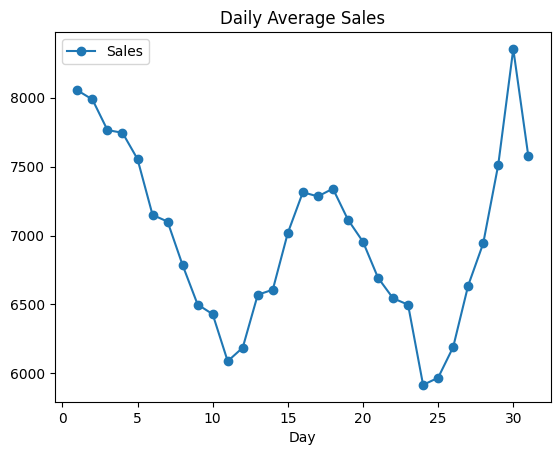

In [120]:
axis = sales_department_df.groupby('Day')[['Sales']].mean().plot(marker = 'o')
axis.set_title('Daily Average Sales');

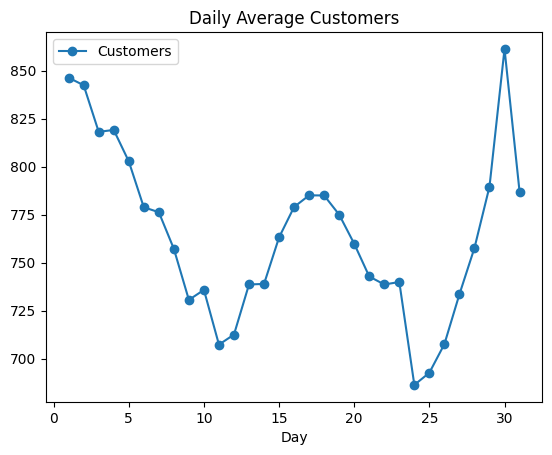

In [121]:
axis = sales_department_df.groupby('Day')[['Customers']].mean().plot(marker = 'o')
axis.set_title('Daily Average Customers');

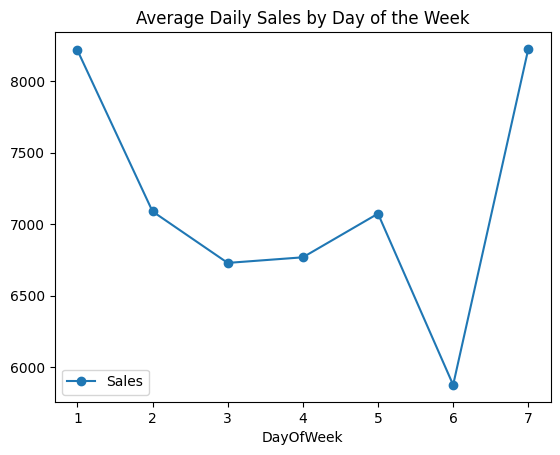

In [122]:
axis = sales_department_df.groupby('DayOfWeek')[['Sales']].mean().plot(marker = 'o')
axis.set_title('Average Daily Sales by Day of the Week');

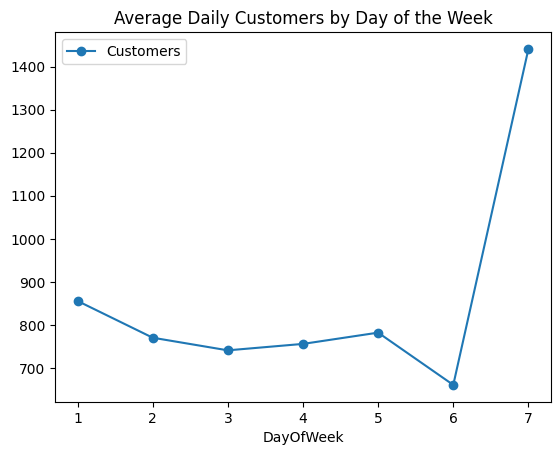

In [123]:
axis = sales_department_df.groupby('DayOfWeek')[['Customers']].mean().plot(marker = 'o')
axis.set_title('Average Daily Customers by Day of the Week');

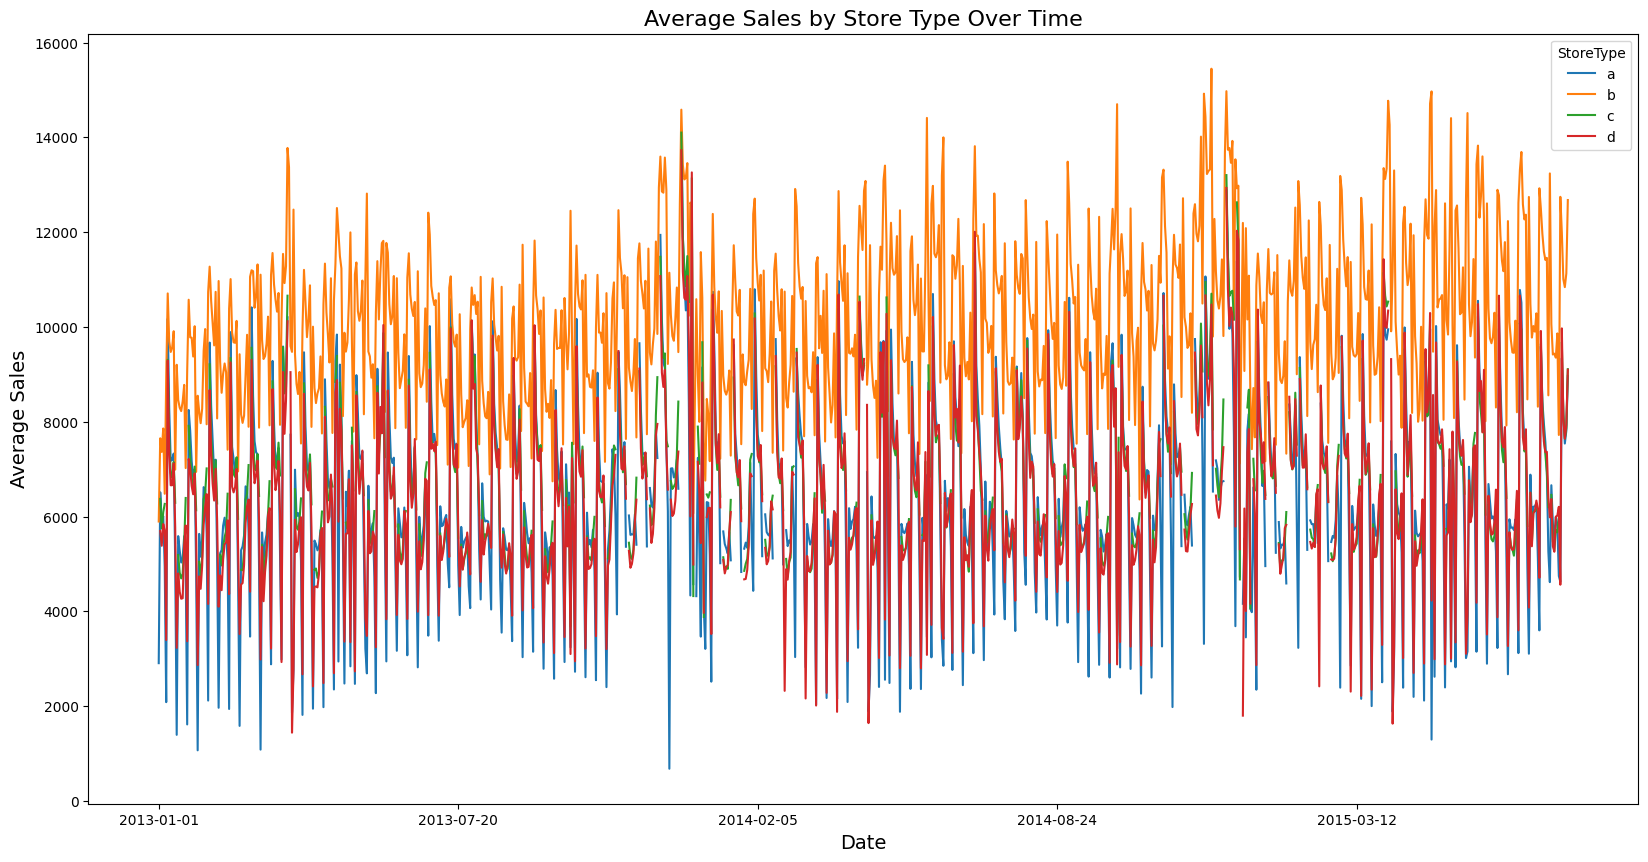

In [124]:
df_unstacked = sales_department_df.groupby(['Date', 'StoreType'])[['Sales']].mean().unstack()
df_unstacked.columns = df_unstacked.columns.droplevel(0)
ax = df_unstacked.plot(figsize=(20, 10), legend=True)
ax.set_title('Average Sales by Store Type Over Time', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Average Sales', fontsize=14);

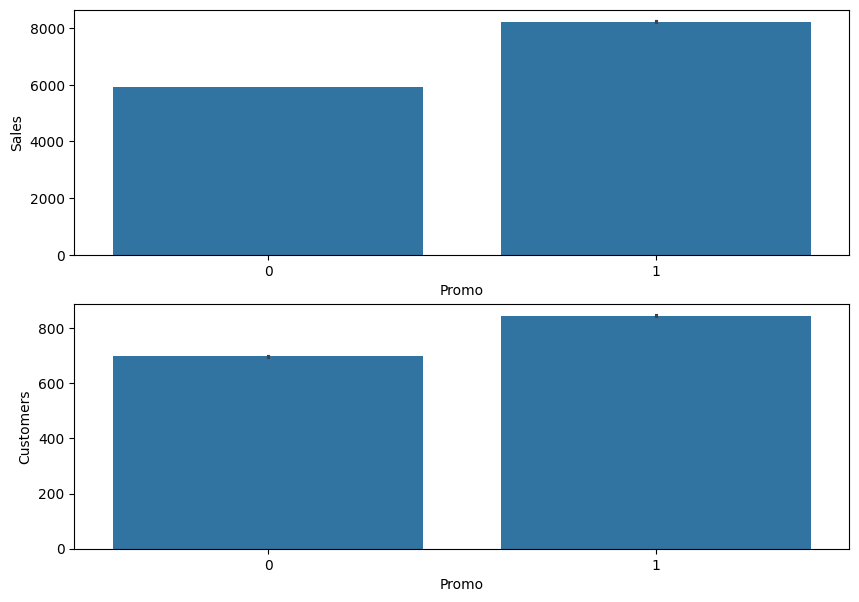

In [125]:
plt.figure(figsize=(10,7))
plt.subplot(211)
sns.barplot(x='Promo', y='Sales', data=sales_department_df) # how average sales change during promotions
plt.subplot(212)
sns.barplot(x='Promo', y='Customers', data=sales_department_df); # how the average number of customers changes during promotions

# Promotions have a positive effect on both sales and the number of customers,
# with noticeable increases in both metrics during promotional periods.

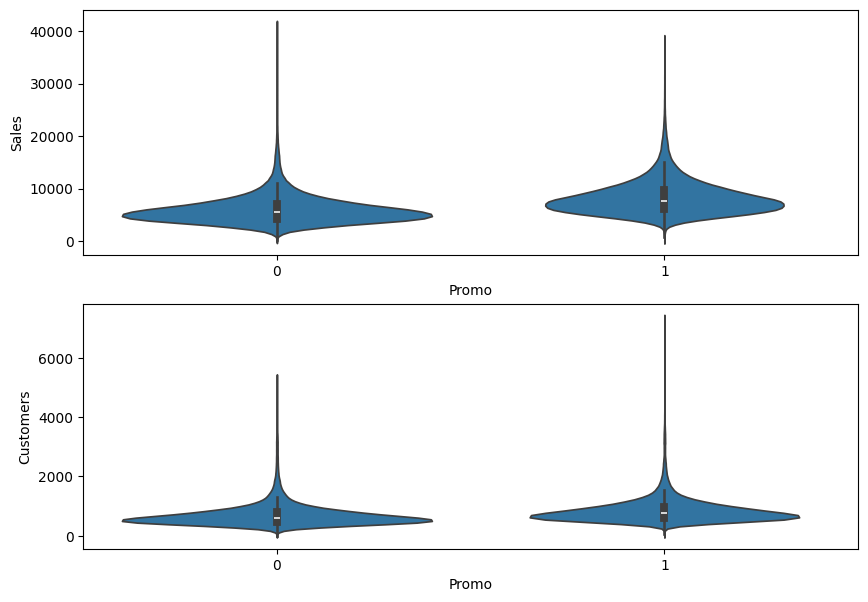

In [126]:
plt.figure(figsize=(10,7)) # to visualize the distribution of Sales and Customers based on the Promo variable
plt.subplot(211)
sns.violinplot(x='Promo', y='Sales', data=sales_department_df)
plt.subplot(212)
sns.violinplot(x='Promo', y='Customers', data=sales_department_df);

# The Promo variable doesn't seem to cause substantial differences in the distributions of Sales or Customers,
# suggesting that promotional activities may not drastically alter these metrics.

## Time Series Forecasting: Model Training with Facebook Prophet

22:20:20 - cmdstanpy - INFO - Chain [1] start processing
22:20:21 - cmdstanpy - INFO - Chain [1] done processing


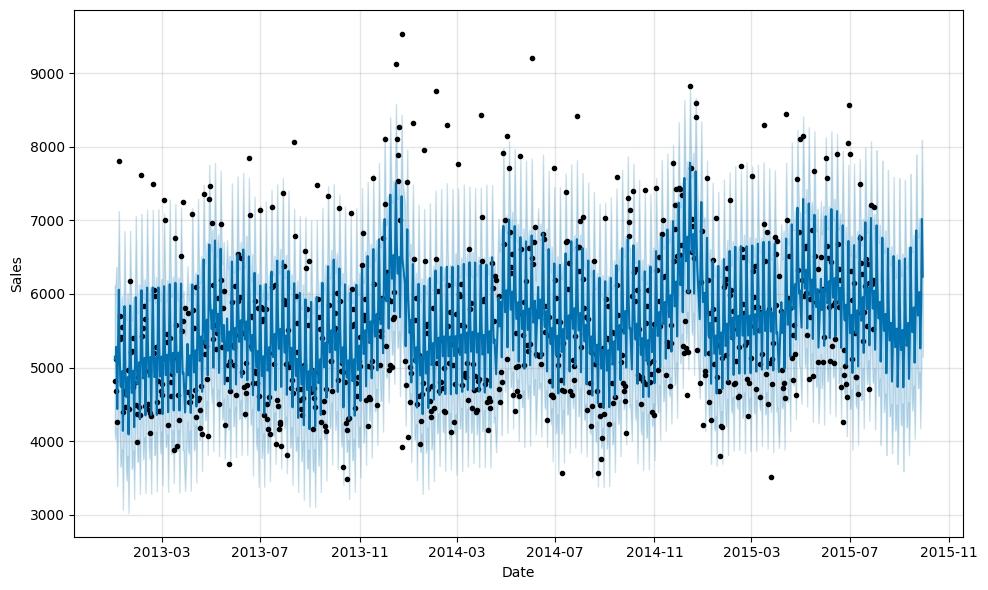

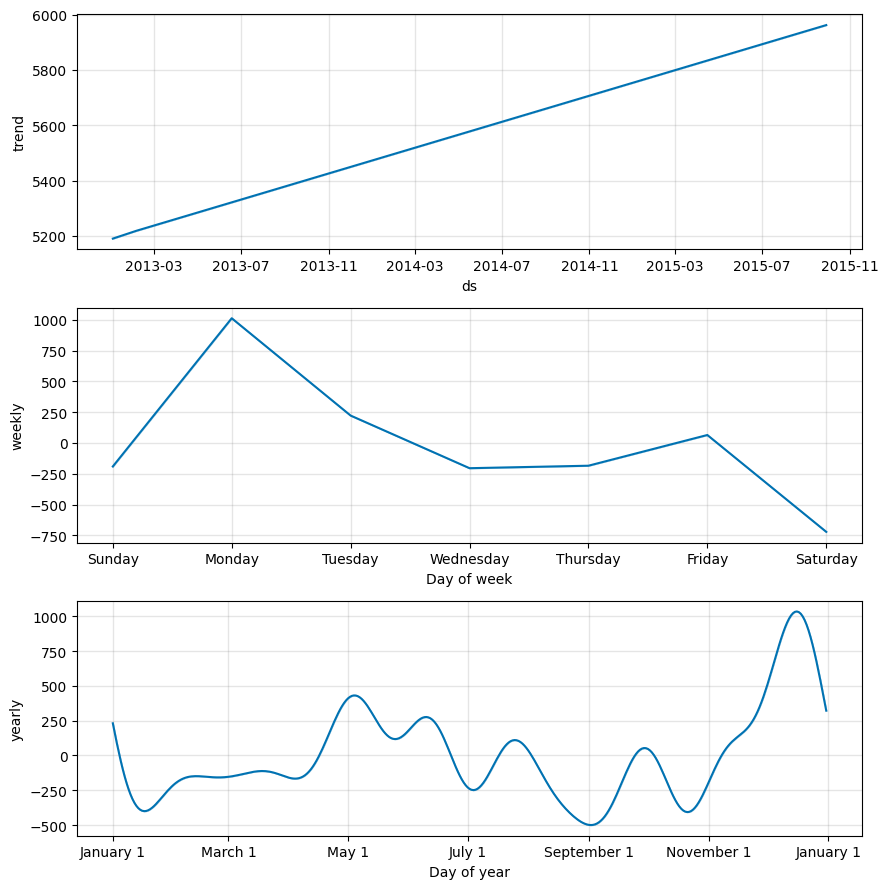

In [127]:
def sales_prediction(store_id, sales_df, periods): # part 1
    # to filter the DataFrame to include only rows for the given store_id
    sales_df = sales_df[sales_df['Store'] == store_id]
    # to select only the 'Date' and 'Sales' columns and rename them (Prophet requires
    # the date column to be named 'ds' and the target variable as 'y')
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date':'ds', 'Sales':'y'})
    # to ensure the data is sorted by the date column ('ds')
    sales_df = sales_df.sort_values('ds')
    # to initialize and fit the Prophet model
    model = Prophet()
    model.fit(sales_df)
    # to create a future DataFrame for predictions
    future = model.make_future_dataframe(periods=periods)
    # to generate forecasts
    forecast = model.predict(future)
    # to plot the forecast and its components
    figure_1 = model.plot(forecast, xlabel='Date', ylabel='Sales')
    figure_2 = model.plot_components(forecast)
sales_prediction(10, sales_department_df, 60) # 60 days

# Black Dots: These represent the actual observed sales data points.
# Blue Line: This is the predicted trend line for sales over time, as forecasted by the model.
# Shaded Blue Area: Represents the uncertainty intervals (confidence intervals) of the predictions,
# capturing the range of possible sales values based on the model's confidence.

In [128]:
def sales_prediction(store_id, sales_df, holidays, periods): # part 2
    sales_df = sales_df[sales_df['Store'] == store_id]
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date':'ds', 'Sales':'y'})
    sales_df = sales_df.sort_values('ds')
    model = Prophet(holidays=holidays)
    model.fit(sales_df)
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    figure_1 = model.plot(forecast, xlabel='Date', ylabel='Sales')
    figure_2 = model.plot_components(forecast)

In [129]:
school_holidays = sales_department_df[sales_department_df['SchoolHoliday'] == 1].loc[:, 'Date'].values
school_holidays[:10]

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-04-10', '2015-04-09', '2015-04-08',
       '2015-04-07', '2015-04-04'], dtype=object)

In [130]:
school_holidays.shape # 163457 days of school holidays

(163457,)

In [131]:
state_holidays = sales_department_df[
(sales_department_df['StateHoliday'] == 'a') |
(sales_department_df['StateHoliday'] == 'b') |
(sales_department_df['StateHoliday'] == 'c')].loc[:, 'Date'].values
state_holidays[:10]

array(['2014-10-03', '2013-10-03', '2015-06-04', '2014-06-19',
       '2013-05-30', '2015-06-04', '2014-06-19', '2013-05-30',
       '2014-10-03', '2013-10-03'], dtype=object)

In [132]:
state_holidays.shape # 910 days of state holidays

(910,)

In [133]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays), 'holiday': 'state_holiday'})
state_holidays.head()

ds        holiday
0 2014-10-03  state_holiday
1 2013-10-03  state_holiday
2 2015-06-04  state_holiday
3 2014-06-19  state_holiday
4 2013-05-30  state_holiday

In [134]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays), 'holiday': 'school_holiday'})
school_holidays.head()

ds         holiday
0 2015-07-31  school_holiday
1 2015-07-30  school_holiday
2 2015-07-29  school_holiday
3 2015-07-28  school_holiday
4 2015-07-27  school_holiday

In [135]:
school_state_holidays = pd.concat((state_holidays, school_holidays))
school_state_holidays.head()

ds        holiday
0 2014-10-03  state_holiday
1 2013-10-03  state_holiday
2 2015-06-04  state_holiday
3 2014-06-19  state_holiday
4 2013-05-30  state_holiday

In [136]:
school_state_holidays.tail()

ds         holiday
163452 2013-02-05  school_holiday
163453 2013-02-04  school_holiday
163454 2013-01-04  school_holiday
163455 2013-01-03  school_holiday
163456 2013-01-02  school_holiday

22:20:34 - cmdstanpy - INFO - Chain [1] start processing
22:20:34 - cmdstanpy - INFO - Chain [1] done processing


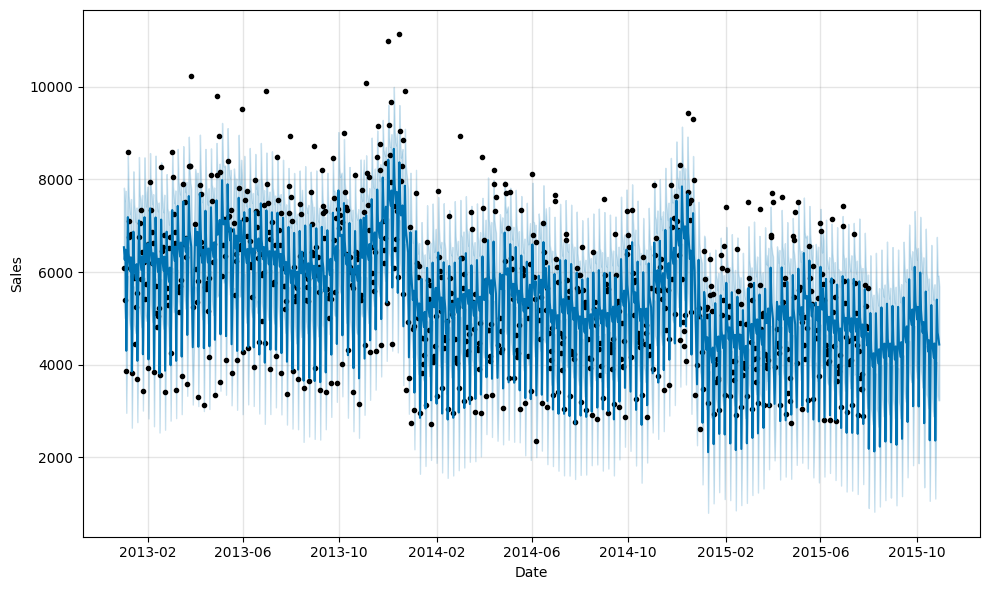

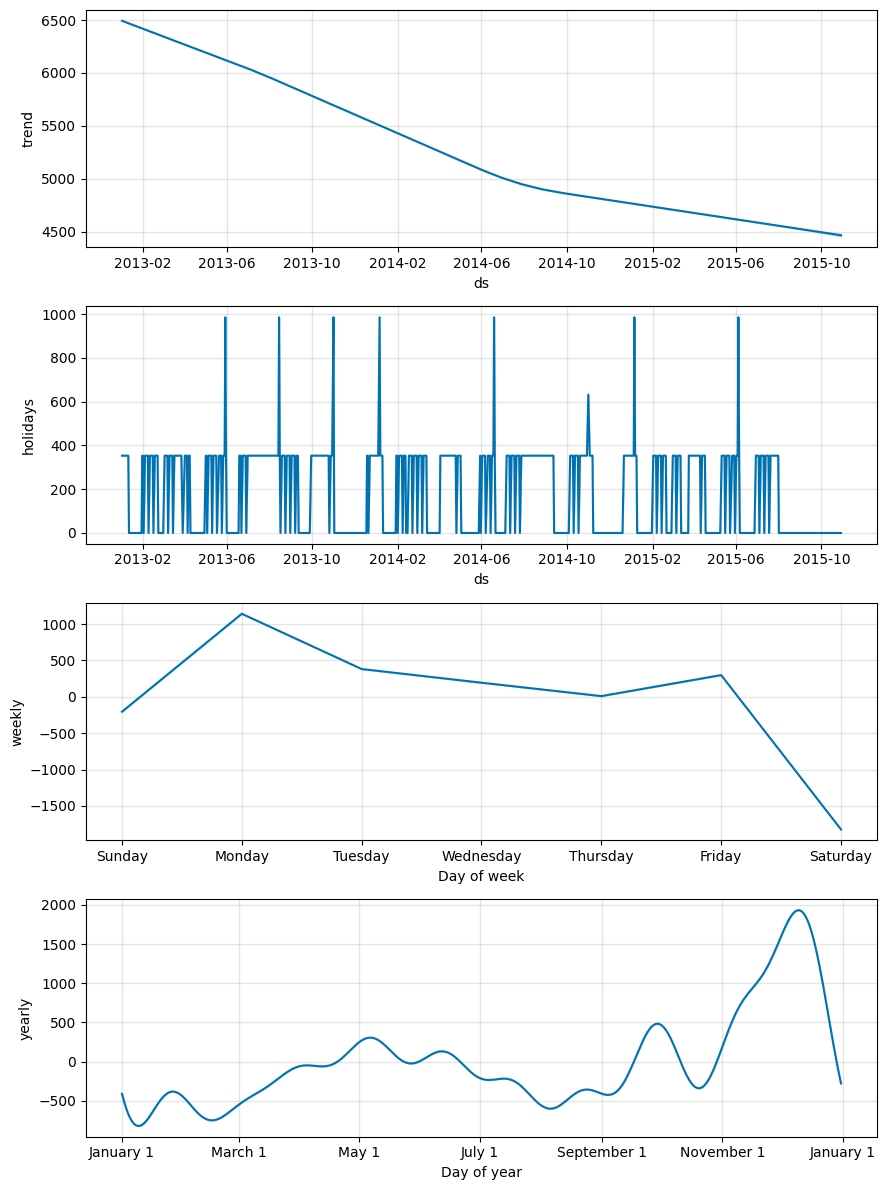

In [137]:
sales_prediction(6, sales_department_df, school_state_holidays, 90) # 90 days

# Operations Department: Chest Disease Detection and Classification

## Business Problem Overview

The operations team at a hospital has collected chest X-ray image data and aims to use predictive modelling to automate the detection and classification of chest diseases. This initiative seeks to reduce the cost and time of diagnosis, enabling detection within less than one minute.

## Data Loading and Preprocessing

In [138]:
x_ray_dir_train = '../data/raw/operations_department_train'

# Path to the .ipynb_checkpoints directory
checkpoints_dir = os.path.join(x_ray_dir_train, '.ipynb_checkpoints')

# Check if the directory exists and remove it
if os.path.exists(checkpoints_dir) and os.path.isdir(checkpoints_dir):
    shutil.rmtree(checkpoints_dir)
    print(f'Removed: {checkpoints_dir}')
else:
    print('No .ipynb_checkpoints directory found.')

No .ipynb_checkpoints directory found.


In [139]:
os.listdir(x_ray_dir_train)

['1', '2', '3', '0']

In [140]:
# Create an ImageDataGenerator to preprocess the image data:
# - Rescale pixel values to the range [0, 1] for normalization
# - Split the dataset into training (80%) and validation (20%) subsets
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# to generate batches of augmented image data for training (target_size: resize all images to 256x256 pixels)
train_generator = image_generator.flow_from_directory(batch_size=40,
                                                      directory=x_ray_dir_train,
                                                      shuffle=True,
                                                      target_size=(256,256),
                                                      class_mode='categorical',
                                                      subset='training')

Found 428 images belonging to 4 classes.


In [141]:
# to generate batches of augmented image data for validation
validation_generator = image_generator.flow_from_directory(batch_size=40,
                                                           directory=x_ray_dir_train,
                                                           shuffle=False,
                                                           target_size=(256, 256),
                                                           class_mode='categorical',
                                                           subset='validation')

Found 104 images belonging to 4 classes.


In [142]:
# to retrieve the next batch of 40 images and their corresponding labels from the training generator
train_images, train_labels = next(train_generator)
train_labels # [0., 0., 1., 0.] => class 2

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]],

In [143]:
train_labels.shape  # 40 images, each assigned to one of 4 classes (0, 1, 2, 3)

(40, 4)

In [144]:
train_images.shape # 40 images, each of size 256x256 pixels with 3 channels (RGB for color images)

(40, 256, 256, 3)

In [145]:
label_names = {0:'Covid-19', 1:'Normal', 2:'Viral Pneumonia', 3:'Bacterial Pneumonia'}

## Dataset Exploration and Visualization

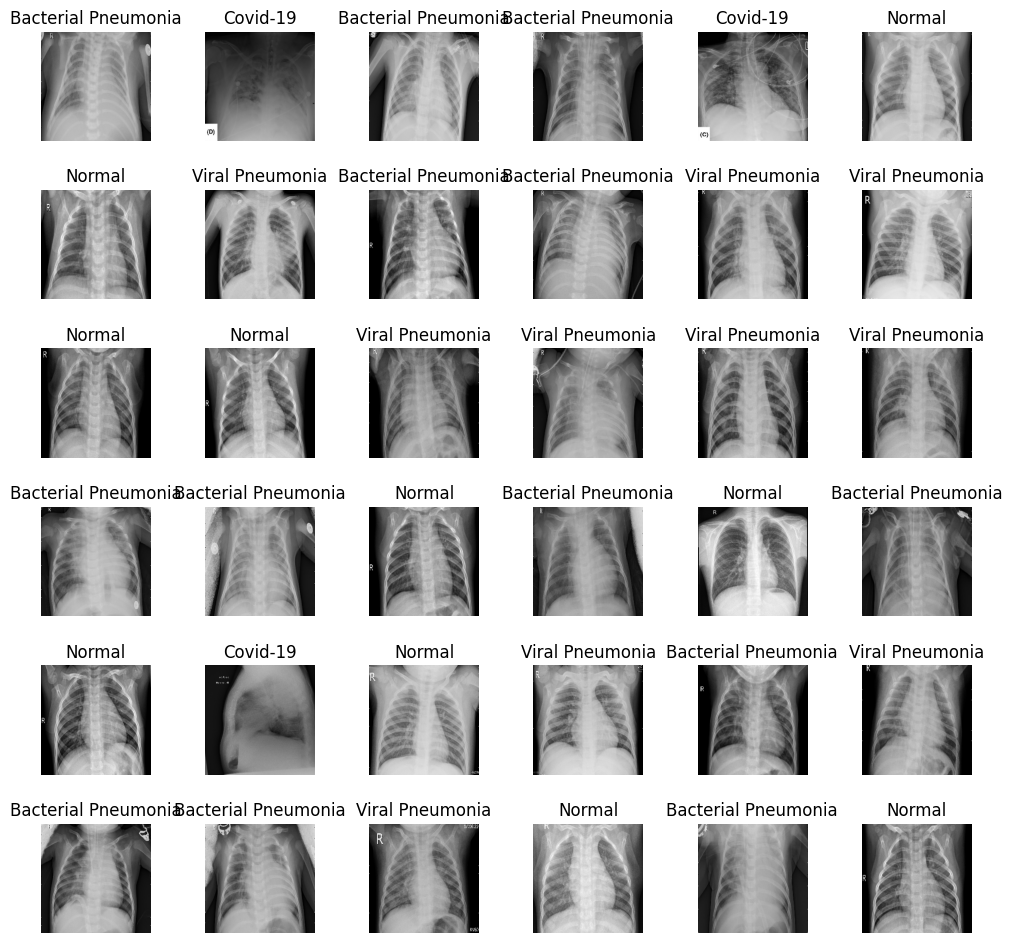

In [146]:
# to create a grid of 36 images along with their corresponding labels
L = 6
W = 6
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()
for i in np.arange(0, L*W):
    axes[i].imshow(train_images[i])
    axes[i].set_title(label_names[np.argmax(train_labels[i])])
    axes[i].axis('off')
plt.subplots_adjust(wspace = 0.5)

## Deep Learning: Model Training and Evaluation

In [147]:
# Load the ResNet50 model as the base model for transfer learning
# - weights='imagenet': Use pre-trained weights from the ImageNet dataset
# - include_top=False: Exclude the fully connected layers at the top of the network
# - input_tensor=Input(shape=(256,256,3)): Define the input shape as a 256x256 RGB image
basemodel = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(256,256,3)))
basemodel.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [148]:
# Freeze all layers in the base model except the last 10 layers; this ensures that the pre-trained weights
# for the earlier layers remain fixed during training, allowing the model to retain learned features from the ImageNet dataset.
# Only the last 10 layers will be trainable, enabling fine-tuning on the new dataset.
for layer in basemodel.layers[:-10]:
    layer.trainable = False

In [149]:
# Build the head of the model to be appended to the base model:
# 1. Get the output from the base model
headmodel = basemodel.output
# 2. Add an average pooling layer to reduce the spatial dimensions of the feature maps
headmodel = AveragePooling2D(pool_size=(4,4))(headmodel)
# 3. Flatten the pooled feature maps to create a 1D feature vector
headmodel = Flatten(name='flatten')(headmodel)
# 4. Add a fully connected (Dense) layer with 256 units and ReLU activation
headmodel = Dense(256, activation="relu")(headmodel)
# 5. Add a Dropout layer with a rate of 0.3 to reduce overfitting
headmodel = Dropout(0.3)(headmodel)
# 6. Add another fully connected layer with 128 units and ReLU activation
headmodel = Dense(128, activation="relu")(headmodel)
# 7. Add a Dropout layer with a rate of 0.2 to further reduce overfitting
headmodel = Dropout(0.2)(headmodel)
# 8. Add the final output layer with 4 units (for 4 classes) and softmax activation,
# the softmax activation outputs probabilities for multi-class classification
headmodel = Dense(4, activation='softmax')(headmodel)
# Combine the base model and the head model into a single model; the inputs come from the base model's input,
# the outputs are the predictions from the head model
model = Model(inputs=basemodel.input, outputs=headmodel)

In [150]:
lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-5,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True
)
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=lr_schedule, clipvalue=1.0),
    metrics=['accuracy']
)

In [151]:
# Using early stopping to exit training if validation loss does not improve for 20 consecutive epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# Save the best model with the lowest validation loss during training in the `.keras` format
checkpointer = ModelCheckpoint(filepath="weights.keras", verbose=1, save_best_only=True)

In [152]:
# Create a training data generator:
# - batch_size=4: Process 4 images per batch.
# - directory=x_ray_dir_train: Specify the directory containing the X-ray images.
# - shuffle=True: Shuffle the data for better training performance.
# - target_size=(256,256): Resize all images to 256x256 pixels.
# - class_mode='categorical': Use categorical labels for multi-class classification.
# - subset='training': Use the training subset of the data.
train_generator = image_generator.flow_from_directory(
    batch_size=4,
    directory=x_ray_dir_train,
    shuffle=True,
    target_size=(256, 256),
    class_mode='categorical',
    subset='training'
)

# Create a validation data generator:
# - Same configuration as the training generator but uses the validation subset.
val_generator = image_generator.flow_from_directory(
    batch_size=4,
    directory=x_ray_dir_train,
    shuffle=False,
    target_size=(256, 256),
    class_mode='categorical',
    subset='validation'
)

Found 428 images belonging to 4 classes.
Found 104 images belonging to 4 classes.


In [153]:
steps_per_epoch = math.ceil(train_generator.samples / train_generator.batch_size)
validation_steps = math.ceil(val_generator.samples / val_generator.batch_size)
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=val_generator,
    validation_steps=validation_steps,
    callbacks=[checkpointer, earlystopping]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 591ms/step - accuracy: 0.3280 - loss: 1.4334
Epoch 1: val_loss improved from inf to 1.41739, saving model to weights.keras
107/107 ━━━━━━━━━━━━━━━━━━━━ 85s 724ms/step - accuracy: 0.3284 - loss: 1.4326 - val_accuracy: 0.2500 - val_loss: 1.4174
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


2024-12-17 22:22:53.568853: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-12-17 22:22:53.598707: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early st

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 607ms/step - accuracy: 0.4895 - loss: 1.1966
Epoch 3: val_loss improved from 1.41739 to 1.26415, saving model to weights.keras
107/107 ━━━━━━━━━━━━━━━━━━━━ 82s 730ms/step - accuracy: 0.4896 - loss: 1.1963 - val_accuracy: 0.3846 - val_loss: 1.2642
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10


2024-12-17 22:24:15.848891: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 588ms/step - accuracy: 0.5017 - loss: 1.1012
Epoch 5: val_loss improved from 1.26415 to 1.20294, saving model to weights.keras
107/107 ━━━━━━━━━━━━━━━━━━━━ 80s 708ms/step - accuracy: 0.5019 - loss: 1.1008 - val_accuracy: 0.3750 - val_loss: 1.2029
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 594ms/step - accuracy: 0.6443 - loss: 0.8989
Epoch 7: val_loss improved from 1.20294 to 0.94718, saving model to weights.keras
107/107 ━━━━━━━━━━━━━━━━━━━━ 83s 714ms/step - accuracy: 0.6445 - loss: 0.8987 - val_accuracy: 0.5769 - val_loss: 0.9472
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10


2024-12-17 22:26:58.008570: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 602ms/step - accuracy: 0.5613 - loss: 0.9385
Epoch 9: val_loss improved from 0.94718 to 0.89585, saving model to weights.keras
107/107 ━━━━━━━━━━━━━━━━━━━━ 83s 722ms/step - accuracy: 0.5619 - loss: 0.9379 - val_accuracy: 0.5769 - val_loss: 0.8959
Epoch 10/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [154]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

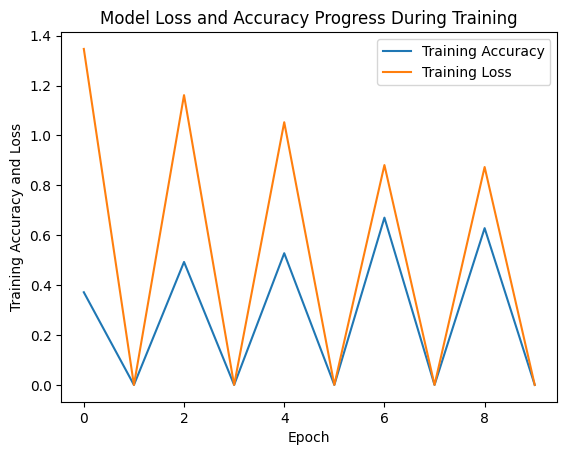

In [155]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Loss and Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy and Loss')
plt.legend(['Training Accuracy', 'Training Loss']);

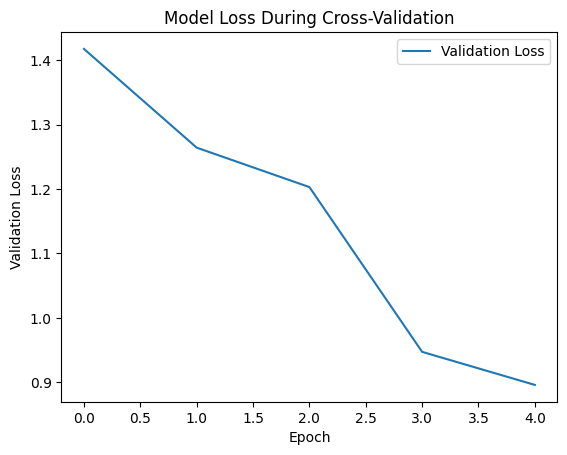

In [156]:
plt.plot(history.history['val_loss'])
plt.title('Model Loss During Cross-Validation')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend(['Validation Loss']);

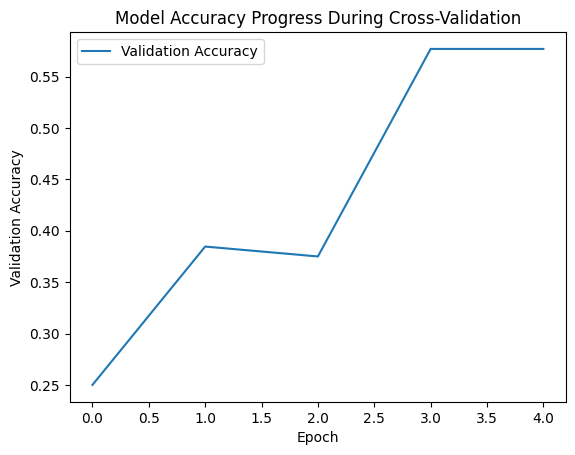

In [157]:
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Progress During Cross-Validation')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(['Validation Accuracy']);

In [158]:
x_ray_dir_test = '../data/raw/operations_department_test'

checkpoints_dir = os.path.join(x_ray_dir_test, '.ipynb_checkpoints')
if os.path.exists(checkpoints_dir) and os.path.isdir(checkpoints_dir):
    shutil.rmtree(checkpoints_dir)
    print(f'Removed: {checkpoints_dir}')
else:
    print('No .ipynb_checkpoints directory found.')

No .ipynb_checkpoints directory found.


In [159]:
os.listdir(x_ray_dir_test)

['1', '2', '3', '0']

In [160]:
image_generator = ImageDataGenerator(rescale=1./255)
test_generator = image_generator.flow_from_directory(
    batch_size=40,
    directory=x_ray_dir_test,
    shuffle=False,
    target_size=(256, 256),
    class_mode='categorical'
)
evaluate = model.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size,
    verbose=1
)
print('Test Accuracy: {:.2f}%'.format(evaluate[1] * 100))

Found 40 images belonging to 4 classes.


2024-12-17 22:28:23.775371: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 167772160 exceeds 10% of free system memory.
2024-12-17 22:28:24.044414: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 173056000 exceeds 10% of free system memory.
2024-12-17 22:28:24.182297: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 167772160 exceeds 10% of free system memory.
2024-12-17 22:28:24.475861: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 167772160 exceeds 10% of free system memory.
2024-12-17 22:28:24.865793: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 167772160 exceeds 10% of free system memory.


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5250 - loss: 1.0095
Test Accuracy: 52.50%


In [161]:
prediction = []
original = []
image = []
for i in range(len(os.listdir(x_ray_dir_test))):
    for item in os.listdir(os.path.join(x_ray_dir_test, str(i))):
        img = cv2.imread(os.path.join(x_ray_dir_test, str(i), item))
        img = cv2.resize(img, (256, 256))
        image.append(img)
        img = img / 255
        img = img.reshape(-1, 256, 256, 3)
        predict = model.predict(img)
        predict = np.argmax(predict)
        prediction.append(predict)
        original.append(i)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [162]:
len(original)

40

In [163]:
score = accuracy_score(original, prediction)
print('Test Accuracy: {}'.format(score))

Test Accuracy: 0.525


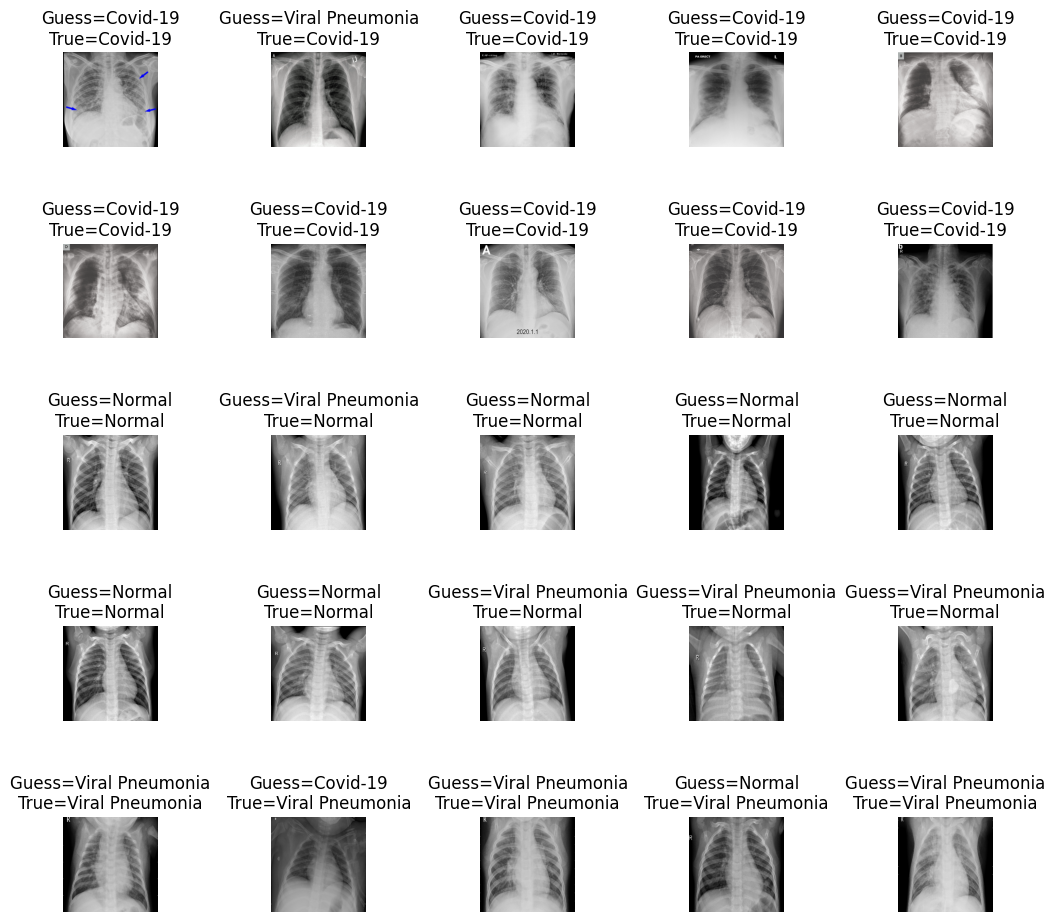

In [164]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()
for i in np.arange(0, L*W):
    axes[i].imshow(image[i])
    axes[i].set_title('Guess={}\nTrue={}'.format(str(label_names[prediction[i]]),
                                                 str(label_names[original[i]])))
    axes[i].axis('off')
plt.subplots_adjust(wspace=1.2)

In [165]:
print(classification_report(np.asarray(original), np.asarray(prediction)))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.55      0.60      0.57        10
           2       0.40      0.60      0.48        10
           3       0.00      0.00      0.00        10

    accuracy                           0.53        40
   macro avg       0.41      0.53      0.46        40
weighted avg       0.41      0.53      0.46        40



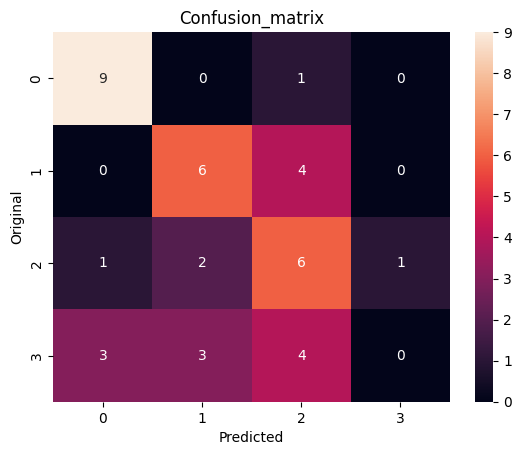

In [166]:
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix');

# Public Relations Department: Customer Satisfaction Prediction

## Business Problem Overview

The public relations department has collected extensive data on customer reviews in text format. The goal is to leverage predictive modelling to determine whether customers are satisfied with the product based on their reviews.

## Data Loading and Preprocessing

In [167]:
reviews_df = pd.read_csv('../data/raw/public-relations-department.tsv', sep='\t')
reviews_df.head()

rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1

In [168]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [169]:
reviews_df[reviews_df['verified_reviews'].isnull()]

rating       date variation verified_reviews  feedback
473       2  29-Jun-18     White              NaN         0

In [170]:
reviews_df['verified_reviews'] = reviews_df['verified_reviews'].fillna('No review')
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [171]:
reviews_df.describe()

rating     feedback
count  3150.000000  3150.000000
mean      4.463175     0.918413
std       1.068506     0.273778
min       1.000000     0.000000
25%       4.000000     1.000000
50%       5.000000     1.000000
75%       5.000000     1.000000
max       5.000000     1.000000

In [172]:
reviews_df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

## Dataset Exploration and Visualization

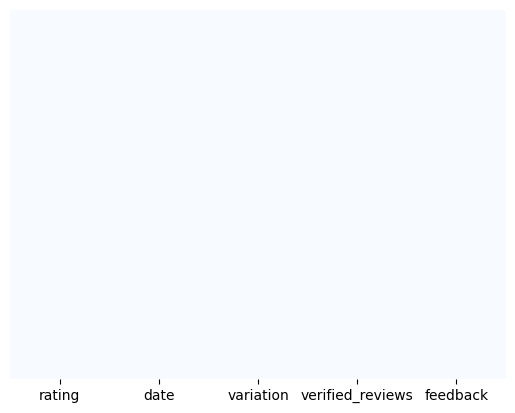

In [173]:
sns.heatmap(reviews_df.isnull(), yticklabels=False, cbar=False, cmap='Blues');

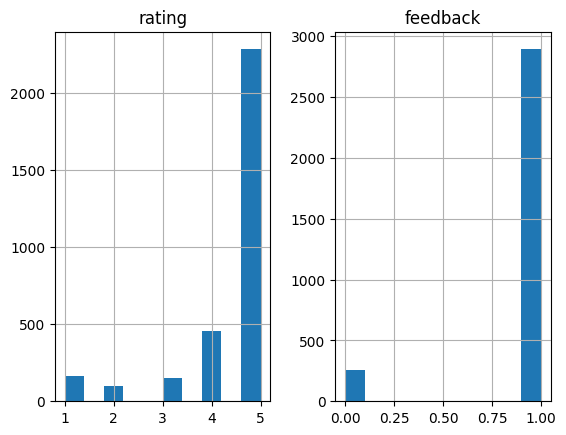

In [174]:
reviews_df.hist();

In [175]:
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)
reviews_df.head()

rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  length  
0                                      Love my Echo!         1      13  
1                                          Loved it!         1       9  
2  Sometimes while playing a game, you can answer...         1     195  
3  I have had a lot of fun with this thing. My 4 ...         1     172  
4                                              Music         1       5

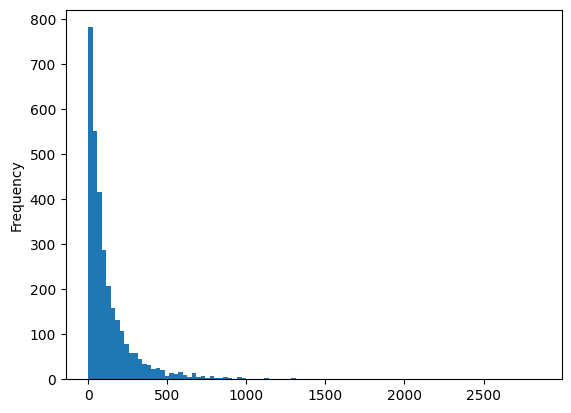

In [176]:
reviews_df['length'].plot(bins=100, kind='hist');

In [177]:
reviews_df['length'].describe()

count    3150.000000
mean      132.051111
std       182.098857
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [178]:
reviews_df.loc[reviews_df['length'] == 2851, 'verified_reviews'].values

array(["Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a f

In [179]:
reviews_df.loc[reviews_df['length'] == 1, 'verified_reviews'].values

array(['😍', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '😍', ' ', ' ', ' ', ' ',
       ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
       ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
       ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
       ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
       ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
       ' ', ' ', ' '], dtype=object)

In [180]:
reviews_df.loc[reviews_df['length'] == 132, 'verified_reviews'].values

array(['Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.',
       'awesome product! I am in the process of having every room in my house set up with automation and The Show is now my favorite device!',
       'If you belong to amazon prime, I would think that you could watch any video on it that was in the library.  You can with prime music',
       'I expected to have access to more current movie instead of having to pay. The easy setup was helpful and I love the speedy delivery.',
       'Works good for the most part. You ask it some questions and she says she doesn’t know. I thought she was supposed to know everything',
       'Works good for the most part. You ask it some questions and she says she doesn’t know. I thought she was supposed to know everything'],
      dtype=object)

In [181]:
positive_df = reviews_df[reviews_df['feedback']==1]
positive_df

rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  length  
0                                         Love my Echo!         1      13  
1                                             Loved it!         1       9  
2     Sometimes while playing a game, you can answer...         1     195  
3     I have had a lot of fun with this thing. My 4 ...         1     172  
4                                                 Music         1       5  
...                                                 ...       ...     ...  
3145  Perfect for kids, adults and everyone in betwe...         1      50  
3146  Listening to music, searching locations, check...         1     135  
3147  I do love these things, i have them running my...         1     441  
3148  Only complaint I have is that the sound qualit...         1     380  
3149                                               Good         1       4  

[2893 rows x 6 columns]

In [182]:
negative_df = reviews_df[reviews_df['feedback']==0]
negative_df

rating       date             variation  \
46         2  30-Jul-18      Charcoal Fabric    
111        2  30-Jul-18      Charcoal Fabric    
141        1  30-Jul-18      Charcoal Fabric    
162        1  30-Jul-18     Sandstone Fabric    
176        2  30-Jul-18  Heather Gray Fabric    
...      ...        ...                   ...   
3047       1  30-Jul-18            Black  Dot   
3048       1  30-Jul-18            White  Dot   
3067       2  30-Jul-18            Black  Dot   
3091       1  30-Jul-18            Black  Dot   
3096       1  30-Jul-18            White  Dot   

                                       verified_reviews  feedback  length  
46    It's like Siri, in fact, Siri answers more acc...         0     163  
111   Sound is terrible if u want good music too get...         0      53  
141                                  Not much features.         0      18  
162   Stopped working after 2 weeks ,didn't follow c...         0      87  
176                                Sad joke. Worthless.         0      20  
...                                                 ...       ...     ...  
3047  Echo Dot responds to us when we aren't even ta...         0     120  
3048              NOT CONNECTED TO MY PHONE PLAYLIST :(         0      37  
3067  The only negative we have on this product is t...         0     240  
3091                                  I didn’t order it         0      17  
3096  The product sounded the same as the emoji spea...         0     210  

[257 rows x 6 columns]

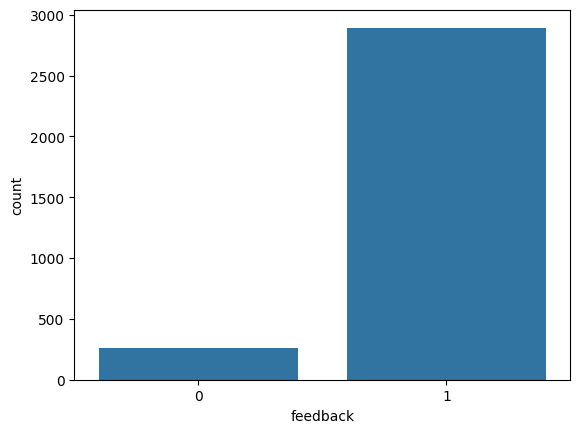

In [183]:
sns.countplot(x='feedback', data=reviews_df);

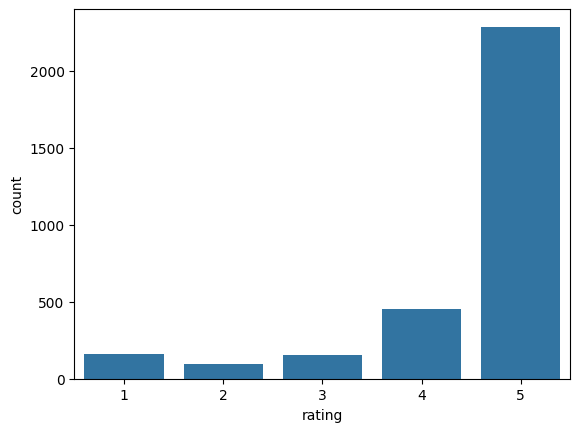

In [184]:
sns.countplot(x='rating', data=reviews_df);

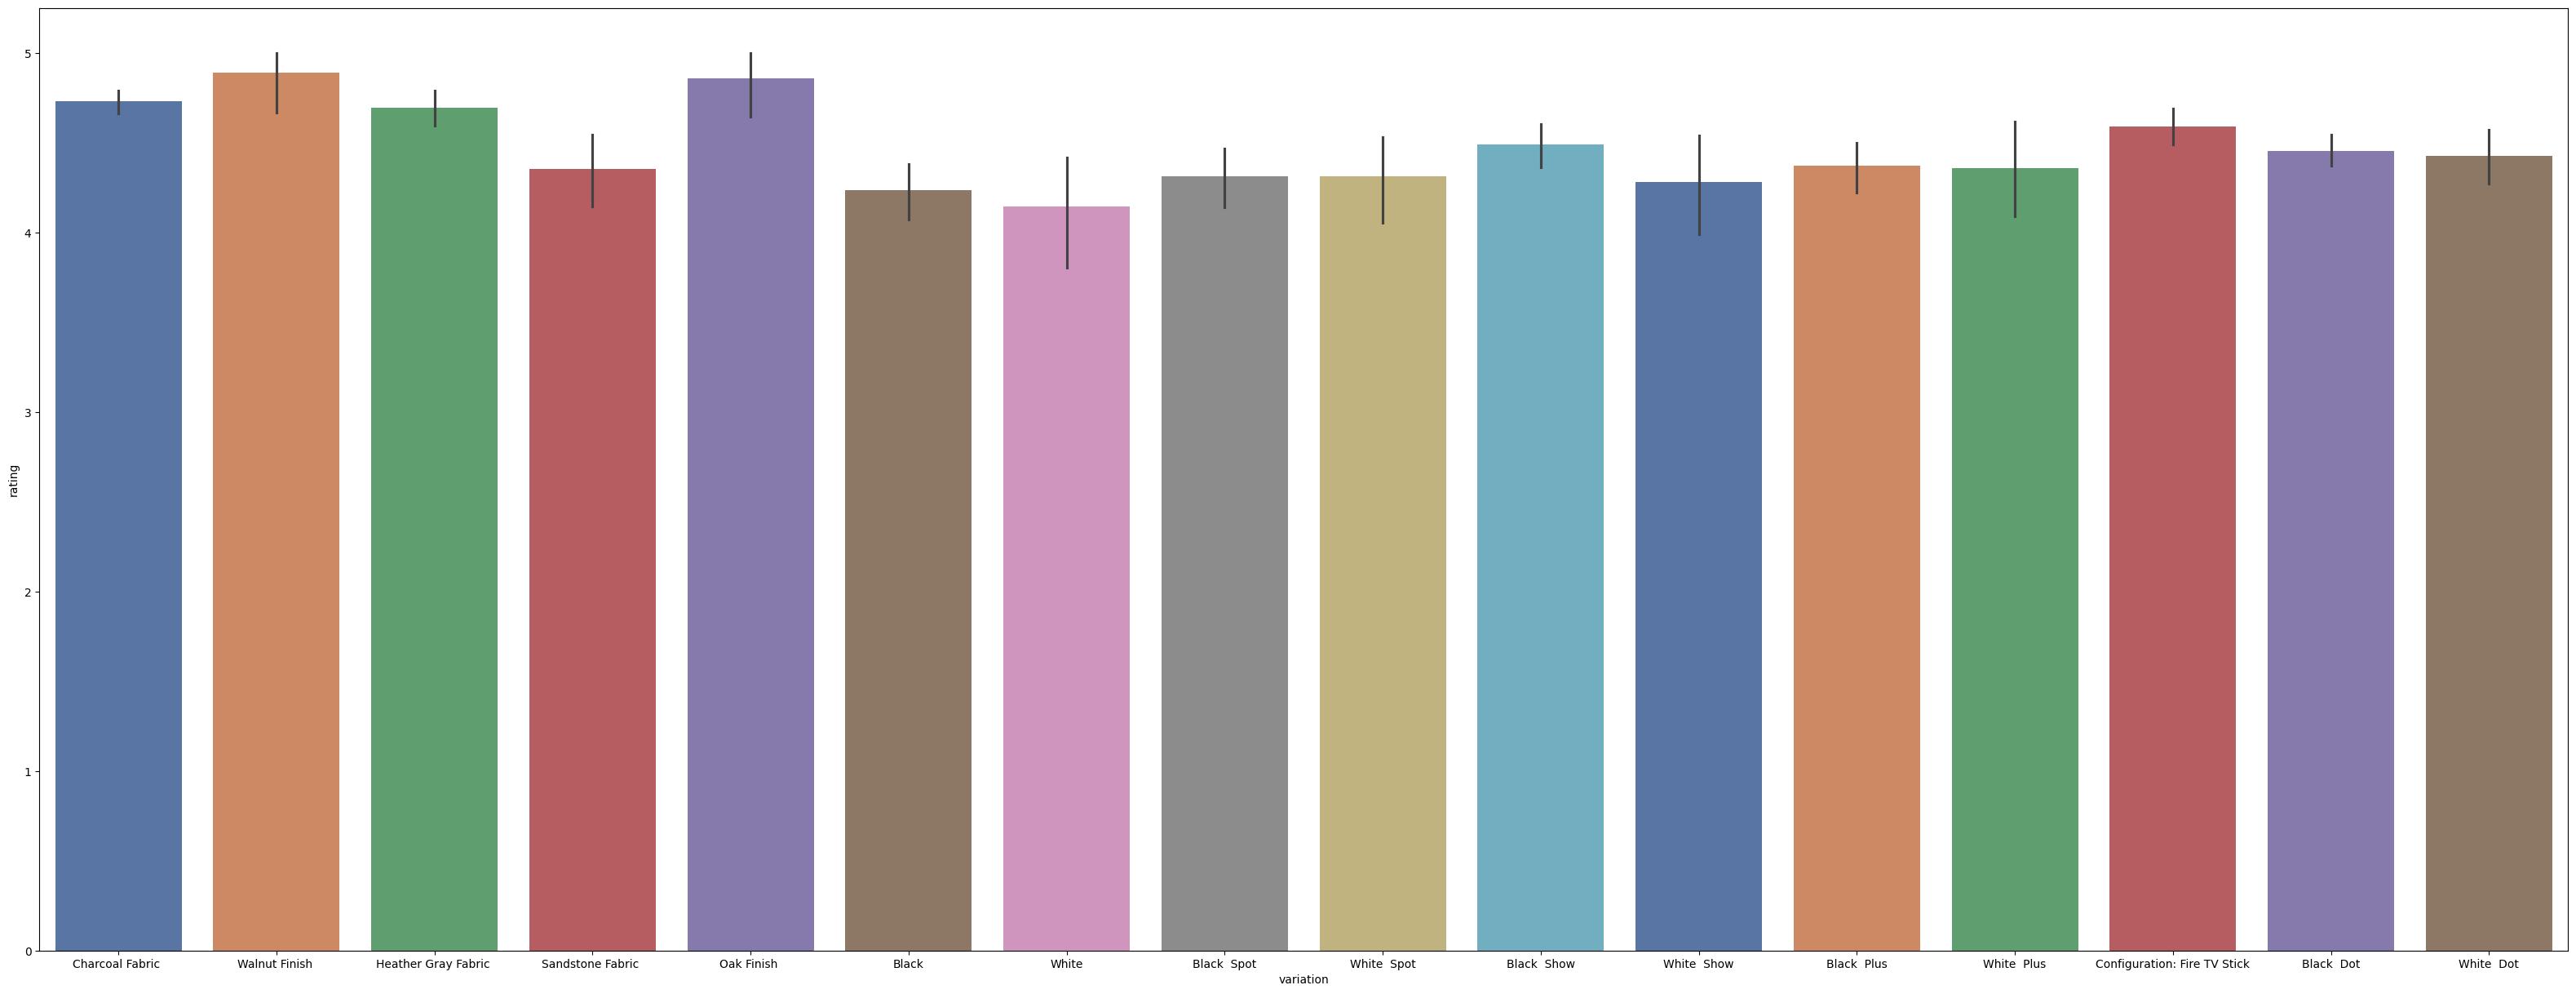

In [185]:
plt.figure(figsize=(40,15))
sns.barplot(x='variation', y='rating', data=reviews_df, palette='deep');

In [186]:
sentences = reviews_df['verified_reviews'].tolist()
len(sentences)

3150

In [187]:
sentences

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [188]:
sentences_as_one_string = ' '.join(sentences)
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

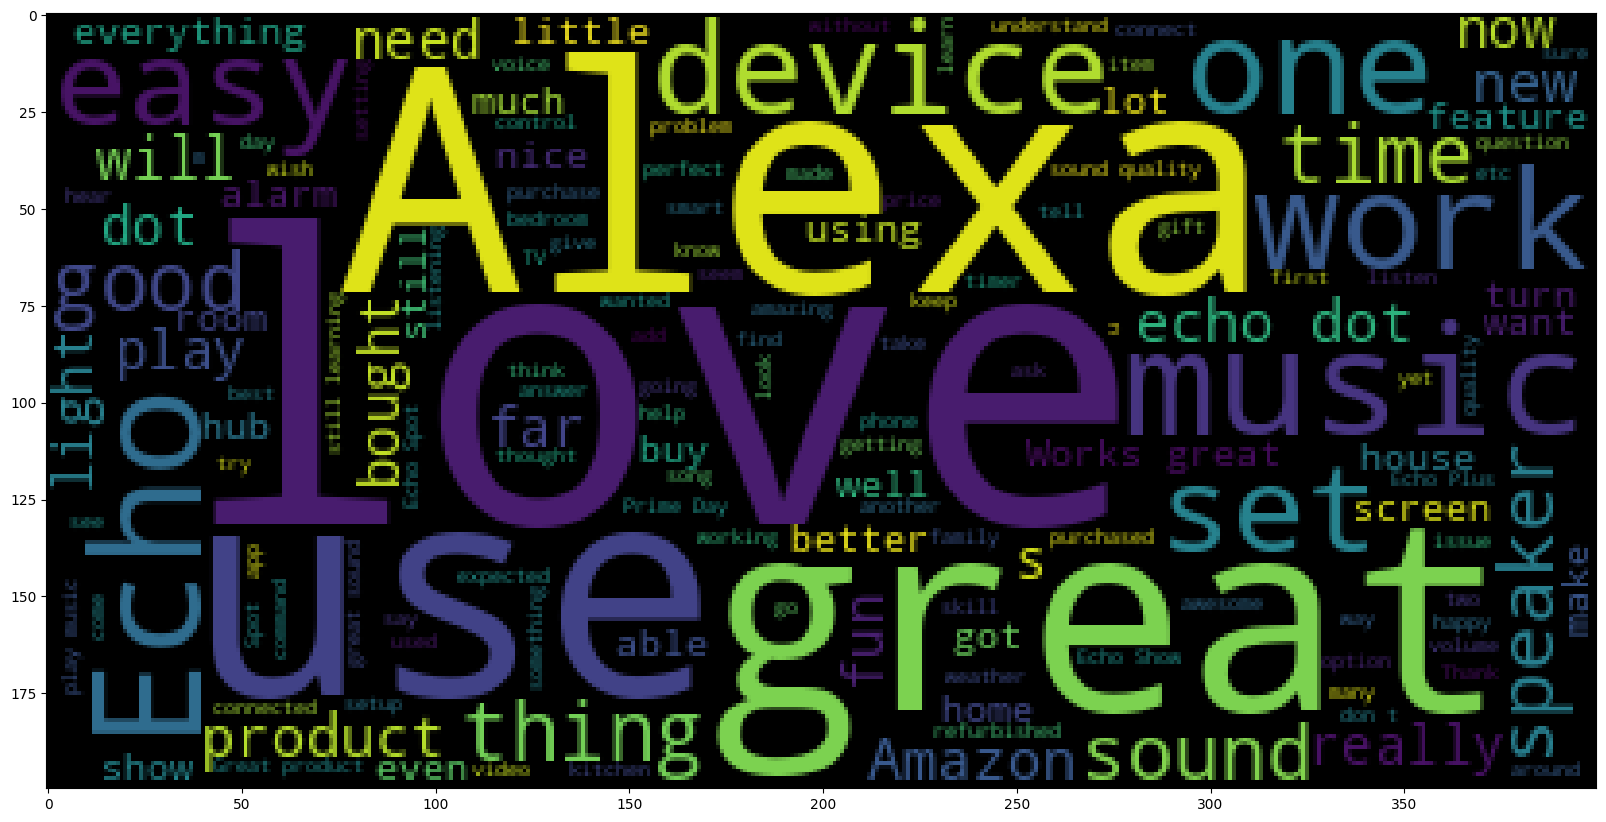

In [189]:
plt.figure(figsize=(20, 20))
plt.imshow(WordCloud().generate(sentences_as_one_string));

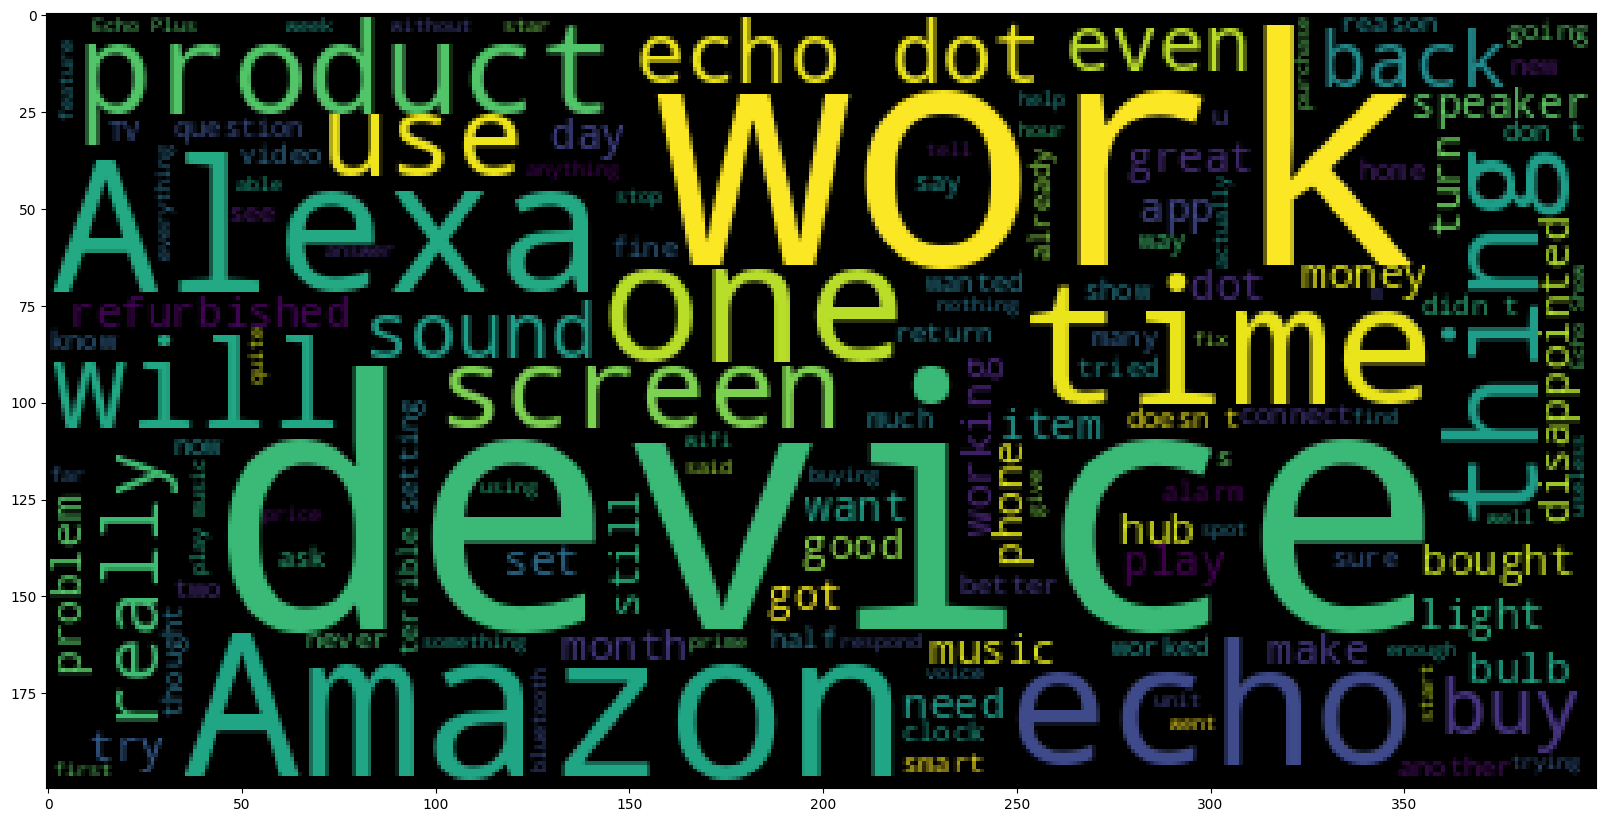

In [190]:
negative_list = negative_df['verified_reviews'].tolist()
negative_sentences_as_one_string = ' '.join(negative_list)
plt.figure(figsize=(20, 20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string));

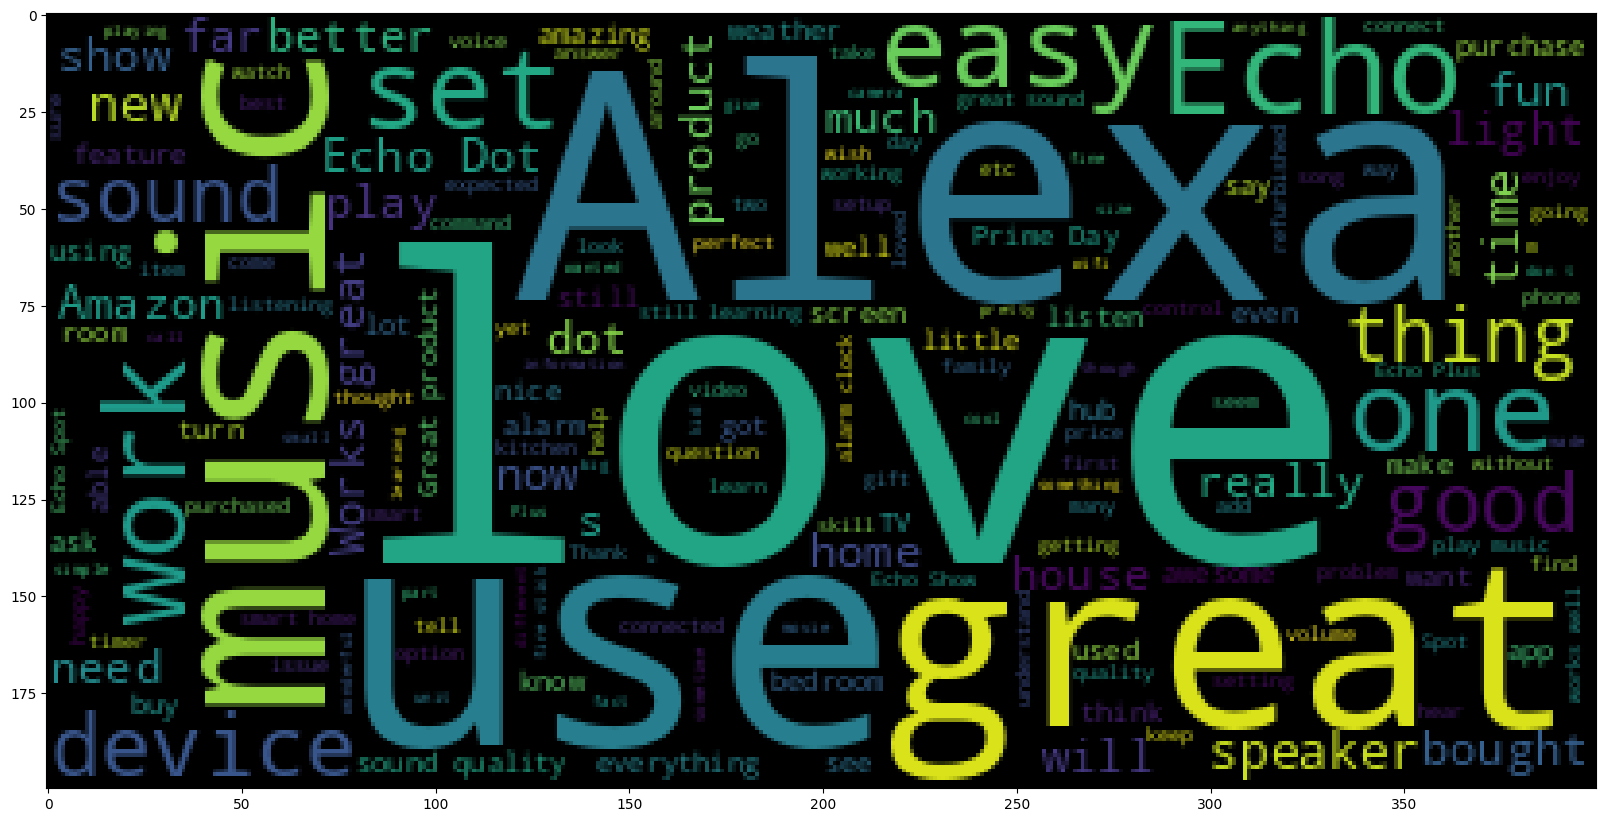

In [191]:
positive_list = positive_df['verified_reviews'].tolist()
positive_sentences_as_one_string = ' '.join(positive_list)
plt.figure(figsize=(20, 20))
plt.imshow(WordCloud().generate(positive_sentences_as_one_string));

## Data Cleaning

In [192]:
reviews_df = reviews_df.drop(['date', 'rating', 'length'], axis=1)
reviews_df.head()

variation                                   verified_reviews  \
0  Charcoal Fabric                                       Love my Echo!   
1  Charcoal Fabric                                           Loved it!   
2    Walnut Finish   Sometimes while playing a game, you can answer...   
3  Charcoal Fabric   I have had a lot of fun with this thing. My 4 ...   
4  Charcoal Fabric                                               Music   

   feedback  
0         1  
1         1  
2         1  
3         1  
4         1

In [193]:
variation_dummies = pd.get_dummies(reviews_df['variation'], drop_first=True)
variation_dummies

Black  Dot  Black  Plus  Black  Show  Black  Spot  Charcoal Fabric   \
0          False        False        False        False              True   
1          False        False        False        False              True   
2          False        False        False        False             False   
3          False        False        False        False              True   
4          False        False        False        False              True   
...          ...          ...          ...          ...               ...   
3145        True        False        False        False             False   
3146        True        False        False        False             False   
3147        True        False        False        False             False   
3148       False        False        False        False             False   
3149        True        False        False        False             False   

      Configuration: Fire TV Stick  Heather Gray Fabric   Oak Finish   \
0                            False                 False        False   
1                            False                 False        False   
2                            False                 False        False   
3                            False                 False        False   
4                            False                 False        False   
...                            ...                   ...          ...   
3145                         False                 False        False   
3146                         False                 False        False   
3147                         False                 False        False   
3148                         False                 False        False   
3149                         False                 False        False   

      Sandstone Fabric   Walnut Finish   White  White  Dot  White  Plus  \
0                 False           False  False       False        False   
1                 False           False  False       False        False   
2                 False            True  False       False        False   
3                 False           False  False       False        False   
4                 False           False  False       False        False   
...                 ...             ...    ...         ...          ...   
3145              False           False  False       False        False   
3146              False           False  False       False        False   
3147              False           False  False       False        False   
3148              False           False  False        True        False   
3149              False           False  False       False        False   

      White  Show  White  Spot  
0           False        False  
1           False        False  
2           False        False  
3           False        False  
4           False        False  
...           ...          ...  
3145        False        False  
3146        False        False  
3147        False        False  
3148        False        False  
3149        False        False  

[3150 rows x 15 columns]

In [194]:
reviews_df.drop(['variation'], axis=1, inplace=True)
reviews_df.head()

verified_reviews  feedback
0                                      Love my Echo!         1
1                                          Loved it!         1
2  Sometimes while playing a game, you can answer...         1
3  I have had a lot of fun with this thing. My 4 ...         1
4                                              Music         1

In [195]:
reviews_df = pd.concat([reviews_df, variation_dummies], axis=1)
reviews_df.head()

verified_reviews  feedback  Black  Dot  \
0                                      Love my Echo!         1       False   
1                                          Loved it!         1       False   
2  Sometimes while playing a game, you can answer...         1       False   
3  I have had a lot of fun with this thing. My 4 ...         1       False   
4                                              Music         1       False   

   Black  Plus  Black  Show  Black  Spot  Charcoal Fabric   \
0        False        False        False              True   
1        False        False        False              True   
2        False        False        False             False   
3        False        False        False              True   
4        False        False        False              True   

   Configuration: Fire TV Stick  Heather Gray Fabric   Oak Finish   \
0                         False                 False        False   
1                         False                 False        False   
2                         False                 False        False   
3                         False                 False        False   
4                         False                 False        False   

   Sandstone Fabric   Walnut Finish   White  White  Dot  White  Plus  \
0              False           False  False       False        False   
1              False           False  False       False        False   
2              False            True  False       False        False   
3              False           False  False       False        False   
4              False           False  False       False        False   

   White  Show  White  Spot  
0        False        False  
1        False        False  
2        False        False  
3        False        False  
4        False        False

In [196]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [197]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [198]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [199]:
def message_cleaning(message):
    # to remove punctuation
    message_punc_removed = [char for char in message if char not in string.punctuation]
    # to join the characters back into a string
    message_punc_removed_join = ''.join(message_punc_removed)
    # to remove stopwords and split into words
    message_punc_removed_join_clean = [
        word for word in message_punc_removed_join.split()
        if word.lower() not in stopwords.words('english')
    ]
    # to return the list of tokens
    return message_punc_removed_join_clean

In [200]:
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [201]:
reviews_df_clean.head(10)

0                                         [Love, Echo]
1                                              [Loved]
2    [Sometimes, playing, game, answer, question, c...
3    [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                              [Music]
5    [received, echo, gift, needed, another, Blueto...
6    [Without, cellphone, cannot, use, many, featur...
7    [think, 5th, one, Ive, purchased, Im, working,...
8                                       [looks, great]
9    [Love, I’ve, listened, songs, haven’t, heard, ...
Name: verified_reviews, dtype: object

In [202]:
reviews_df['verified_reviews'].head(10)

0                                        Love my Echo!
1                                            Loved it!
2    Sometimes while playing a game, you can answer...
3    I have had a lot of fun with this thing. My 4 ...
4                                                Music
5    I received the echo as a gift. I needed anothe...
6    Without having a cellphone, I cannot use many ...
7    I think this is the 5th one I've purchased. I'...
8                                          looks great
9    Love it! I’ve listened to songs I haven’t hear...
Name: verified_reviews, dtype: object

In [203]:
vectorizer = CountVectorizer(analyzer=message_cleaning) # to initialize CountVectorizer with custom analyzer
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews']) # to fit and transform the reviews

In [204]:
print(vectorizer.get_feature_names_out()[200:225])

['Alexa’s' 'Alexi' 'Alexia' 'Alexis' 'Allows' 'Almost' 'Along' 'Alread'
 'Already' 'Also' 'Although' 'Always' 'Amazing' 'Amazingly' 'Amazon'
 'AmazonAlexa' 'AmazonZigbee' 'Amazonia' 'Amazonmark' 'Amazons'
 'Amazons\u200b' 'Amazont' 'American' 'Americans' 'Android']


In [205]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [206]:
reviews_countvectorizer.shape

(3150, 5211)

In [207]:
reviews_df

verified_reviews  feedback  Black  Dot  \
0                                         Love my Echo!         1       False   
1                                             Loved it!         1       False   
2     Sometimes while playing a game, you can answer...         1       False   
3     I have had a lot of fun with this thing. My 4 ...         1       False   
4                                                 Music         1       False   
...                                                 ...       ...         ...   
3145  Perfect for kids, adults and everyone in betwe...         1        True   
3146  Listening to music, searching locations, check...         1        True   
3147  I do love these things, i have them running my...         1        True   
3148  Only complaint I have is that the sound qualit...         1       False   
3149                                               Good         1        True   

      Black  Plus  Black  Show  Black  Spot  Charcoal Fabric   \
0           False        False        False              True   
1           False        False        False              True   
2           False        False        False             False   
3           False        False        False              True   
4           False        False        False              True   
...           ...          ...          ...               ...   
3145        False        False        False             False   
3146        False        False        False             False   
3147        False        False        False             False   
3148        False        False        False             False   
3149        False        False        False             False   

      Configuration: Fire TV Stick  Heather Gray Fabric   Oak Finish   \
0                            False                 False        False   
1                            False                 False        False   
2                            False                 False        False   
3                            False                 False        False   
4                            False                 False        False   
...                            ...                   ...          ...   
3145                         False                 False        False   
3146                         False                 False        False   
3147                         False                 False        False   
3148                         False                 False        False   
3149                         False                 False        False   

      Sandstone Fabric   Walnut Finish   White  White  Dot  White  Plus  \
0                 False           False  False       False        False   
1                 False           False  False       False        False   
2                 False            True  False       False        False   
3                 False           False  False       False        False   
4                 False           False  False       False        False   
...                 ...             ...    ...         ...          ...   
3145              False           False  False       False        False   
3146              False           False  False       False        False   
3147              False           False  False       False        False   
3148              False           False  False        True        False   
3149              False           False  False       False        False   

      White  Show  White  Spot  
0           False        False  
1           False        False  
2           False        False  
3           False        False  
4           False        False  
...           ...          ...  
3145        False        False  
3146        False        False  
3147        False        False  
3148        False        False  
3149        False        False  

[3150 rows x 17 columns]

In [208]:
reviews_df.drop(['verified_reviews'], axis=1, inplace=True)
reviews_df.head()

feedback  Black  Dot  Black  Plus  Black  Show  Black  Spot  \
0         1       False        False        False        False   
1         1       False        False        False        False   
2         1       False        False        False        False   
3         1       False        False        False        False   
4         1       False        False        False        False   

   Charcoal Fabric   Configuration: Fire TV Stick  Heather Gray Fabric   \
0              True                         False                 False   
1              True                         False                 False   
2             False                         False                 False   
3              True                         False                 False   
4              True                         False                 False   

   Oak Finish   Sandstone Fabric   Walnut Finish   White  White  Dot  \
0        False              False           False  False       False   
1        False              False           False  False       False   
2        False              False            True  False       False   
3        False              False           False  False       False   
4        False              False           False  False       False   

   White  Plus  White  Show  White  Spot  
0        False        False        False  
1        False        False        False  
2        False        False        False  
3        False        False        False  
4        False        False        False

In [209]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())
reviews_df = pd.concat([reviews_df, reviews], axis=1)
reviews_df.head()

feedback  Black  Dot  Black  Plus  Black  Show  Black  Spot  \
0         1       False        False        False        False   
1         1       False        False        False        False   
2         1       False        False        False        False   
3         1       False        False        False        False   
4         1       False        False        False        False   

   Charcoal Fabric   Configuration: Fire TV Stick  Heather Gray Fabric   \
0              True                         False                 False   
1              True                         False                 False   
2             False                         False                 False   
3              True                         False                 False   
4              True                         False                 False   

   Oak Finish   Sandstone Fabric   ...  5201  5202  5203  5204  5205  5206  \
0        False              False  ...     0     0     0     0     0     0   
1        False              False  ...     0     0     0     0     0     0   
2        False              False  ...     0     0     0     0     0     0   
3        False              False  ...     0     0     0     0     0     0   
4        False              False  ...     0     0     0     0     0     0   

   5207  5208  5209  5210  
0     0     0     0     0  
1     0     0     0     0  
2     0     0     0     0  
3     0     0     0     0  
4     0     0     0     0  

[5 rows x 5227 columns]

In [210]:
X = reviews_df.drop(['feedback'], axis=1)
y = reviews_df['feedback']

## Naive Bayes: Model Training and Evaluation

In [211]:
X.columns = X.columns.astype(str)
X.shape

(3150, 5226)

In [212]:
y.shape

(3150,)

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [214]:
# MultinomialNB is a Naive Bayes classifier for multinomially distributed data.
# It is particularly well-suited for document classification problems (e.g., spam detection,
# sentiment analysis) where the features represent word counts or term frequencies.

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [215]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train

array([1, 1, 1, ..., 0, 1, 1])

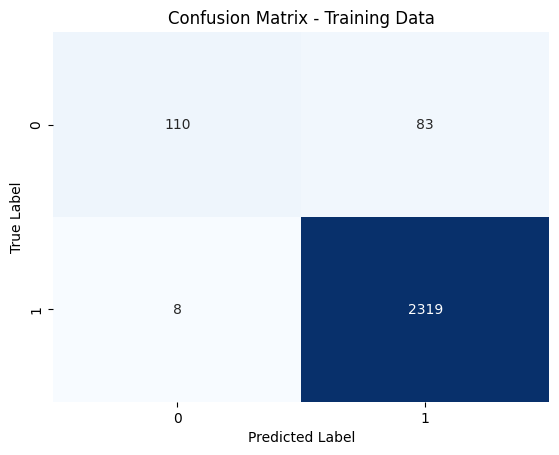

In [216]:
# By comparing the training performance (confusion matrix) and test performance, you can detect overfitting.
# Even on the training set, the confusion matrix can help you analyze which classes the model struggles with.

cm_train = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label');

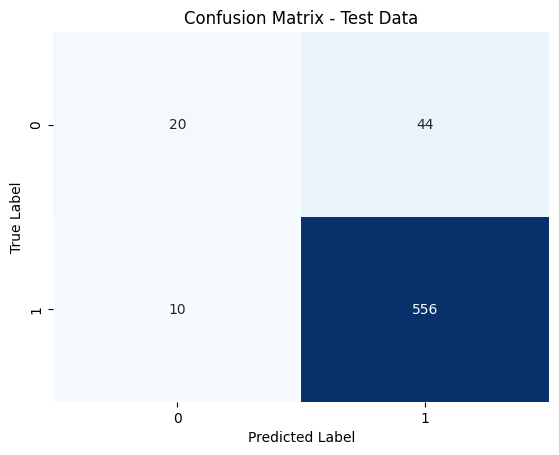

In [217]:
y_predict_test = NB_classifier.predict(X_test)
cm_test = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label');

In [218]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.67      0.31      0.43        64
           1       0.93      0.98      0.95       566

    accuracy                           0.91       630
   macro avg       0.80      0.65      0.69       630
weighted avg       0.90      0.91      0.90       630



## Logistic Regression: Model Training and Evaluation

In [219]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [220]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

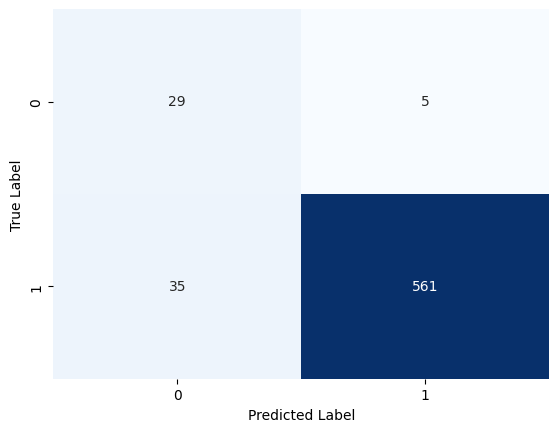

In [221]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label');

In [223]:
print(classification_report(y_test, y_pred))

# For class 0, the model achieved a precision of 85%, recall of 45%, and an F1-score of 59%,
# indicating difficulty in correctly identifying instances of this minority class, as it only had 64 samples.
# In contrast, the model performed exceptionally well for class 1, with a precision of 94%,
# recall of 99%, and an F1-score of 97%, benefiting from a much larger support of 566 samples.
# Overall, the model achieved an accuracy of 94%. The macro average scores (precision: 90%, recall: 72%,
# F1-score: 78%) highlight performance disparity between classes,
# while the weighted averages (precision: 93%, recall: 94%, F1-score: 93%)
# reflect the model's strong performance weighted by class distribution.
# Improvements could focus on enhancing recall for the minority class to address this imbalance.

              precision    recall  f1-score   support

           0       0.85      0.45      0.59        64
           1       0.94      0.99      0.97       566

    accuracy                           0.94       630
   macro avg       0.90      0.72      0.78       630
weighted avg       0.93      0.94      0.93       630

